# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

#### Problem Definition
The negative impact of booking cancellation is huge on the bottom line for INN Hotels Group 
We will build a Classification Model using Logistic Regression & Decision Tree Classifier to predict the cancellation that will help the business to be a bit mor proactive.
The following will be the steps:
* Data Inspection - Observations & Sanity checks
* Exploratory Data Analysis (EDA) - this might be iterative 
* Data Preprocessing (if required)
* Checking Multicollinearity
* Model Building & Performance Assessment & Hyperparameter  tuning (if needed)
* Model Comparison and Selection
* Conclusions and Recommendations

## Importing necessary libraries and data

In [80]:
# # Installing the libraries with the specified version.
# !pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

In [126]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder


# To get diferent metric scores
from sklearn.metrics import (
  confusion_matrix,
  classification_report,
  roc_auc_score,
  # plot_confusion_matrix,
  precision_recall_curve,
  roc_curve,
  make_scorer)

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

In [82]:
dataset_orginal = pd.read_csv("INNHotelsGroup.csv")

## Data Overview

- Observations
- Sanity checks

In [83]:
dataset_orginal.shape

(36275, 19)

In [84]:
dataset_orginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [85]:
# let's check duplicates
(dataset_orginal
.duplicated()
.sum()
)

0

In [86]:
# let's check for missing values
(dataset_orginal
.isnull()
.sum()
)

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [87]:
# let's check the summary stats fr the numerica variables using the pd.describe() method
(dataset_orginal
.describe()
.T # transposing to reshape the data
)

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

In [88]:
# let's check the summary stats for the non-numerical variables using the pd.describe() method

(dataset_orginal
 # excluding Booking_ID
 .drop('Booking_ID', axis=1) 
 .select_dtypes('object') # objects are the non-numerical
 .describe()
 .T # transposing to reshape the data
)

count unique           top   freq
type_of_meal_plan    36275      4   Meal Plan 1  27835
room_type_reserved   36275      7   Room_Type 1  28130
market_segment_type  36275      5        Online  23214
booking_status       36275      2  Not_Canceled  24390

#### Observations from Data Overview
- There are two unique values in the booking_status which is our Label.
- Generally, the data looks clean
- There are no duplicates
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [89]:
# make a copy of the original dataset 

data = dataset_orginal.copy()

# drop the "Booking_ID" column and change object type features to category to save some memory space

data =(data
      .drop('Booking_ID', axis=1)
      
      # Label Encoding: Cancelled = 0 & Not_Cancelled = 1
      # .assign(booking_status= data.booking_status.apply(lambda x: 1 if x == "Not_Canceled" else 0)) 
      
      # change object type features to category to save some memory space
      .astype({
        "type_of_meal_plan":"category",
        "room_type_reserved":"category",
        "market_segment_type":"category",
        "booking_status":"category"
      })
      )

#  check for the categorical variables


(data 
 .select_dtypes('category') # objects are the non-numerical
 .describe()
 .T # transposing to reshape the datadescribe()
 )

count unique           top   freq
type_of_meal_plan    36275      4   Meal Plan 1  27835
room_type_reserved   36275      7   Room_Type 1  28130
market_segment_type  36275      5        Online  23214
booking_status       36275      2  Not_Canceled  24390

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate

In [90]:
# make a copy of the transformed data to perform EDA on
eda_data= (data
          .copy()
          .drop(['arrival_year','arrival_date'], axis=1)
         )

In [91]:
# selecting oonly numerical columns first

columns_to_plot = (eda_data
                   .select_dtypes(include=np.number)
                   .columns
                   )
                   
columns_to_plot

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_month', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests'],
      dtype='object')

In [92]:
# define a custom function that takes a dataframe
# selects the numerical columns
# loops through the numerical columns and plots the distribution using histplot and the boxplot of the numerical variables

def dist_plot(data, col):
    # Define the size of the plot
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6, 5), gridspec_kw={'height_ratios': [4, 1]})

    # First plot (histogram)
    sns.histplot(data=data, x=col, color="lightblue", ax=ax[0])
    ax[0].axvline(data[col].median(), color='red', linestyle='--')
    ax[0].set_title(f"Distribution plot of {col}")

    # Second plot (boxplot)
    sns.boxplot(data=data, x=col, color="lightblue", ax=ax[1])
    ax[1].set_title(f"Boxplot of {col}")

    # Ensure proper fit for plots
    plt.tight_layout()

    # Show plot
    plt.show()

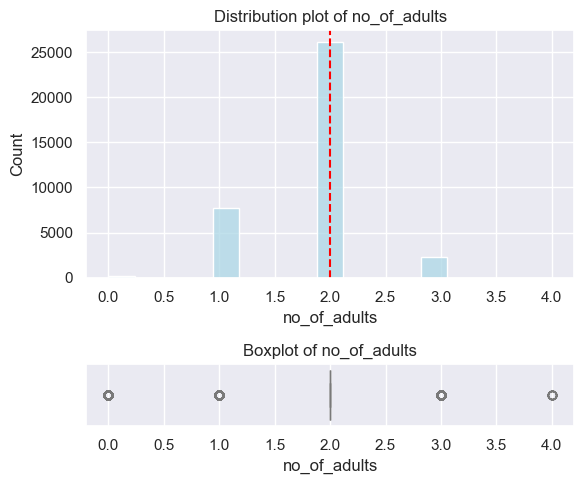

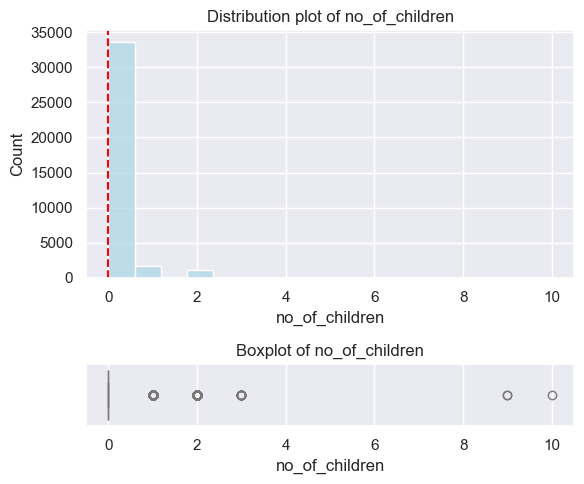

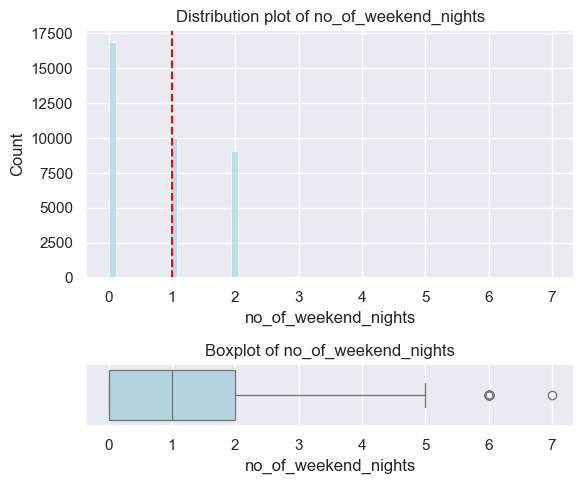

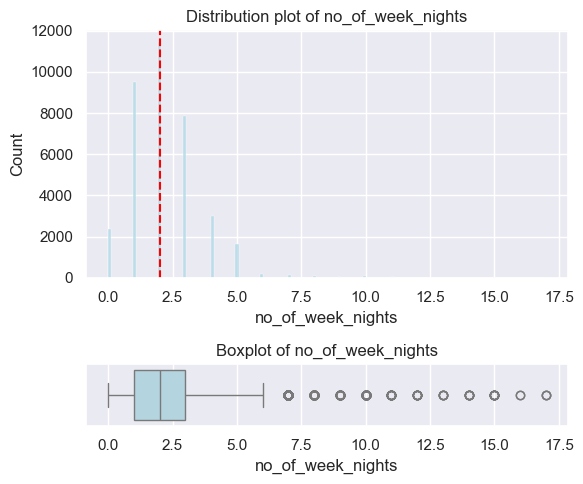

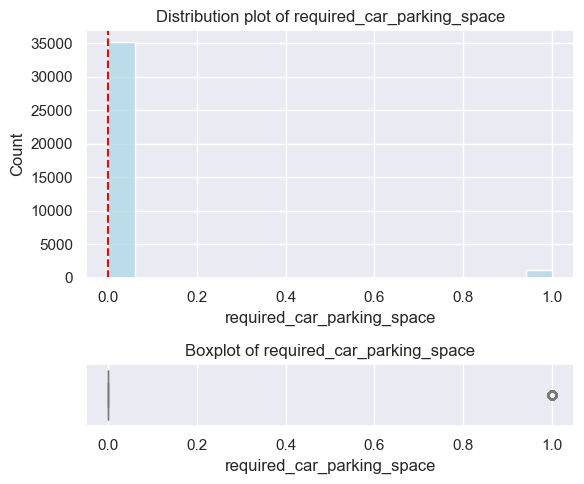

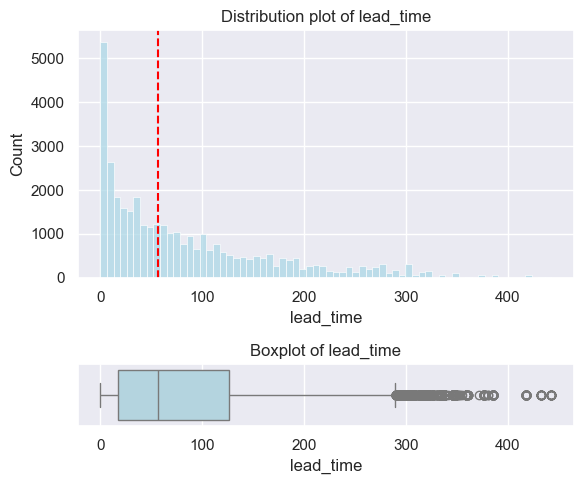

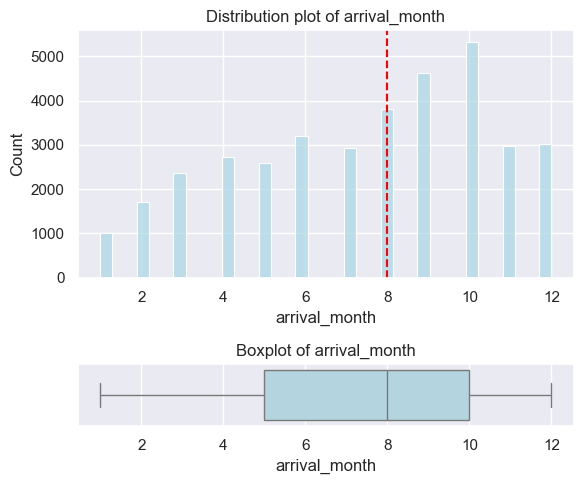

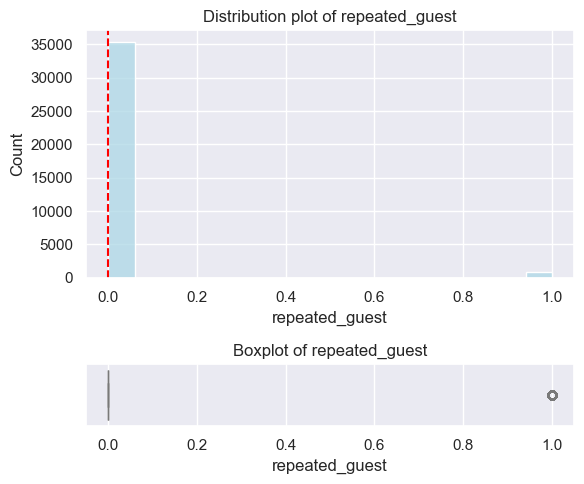

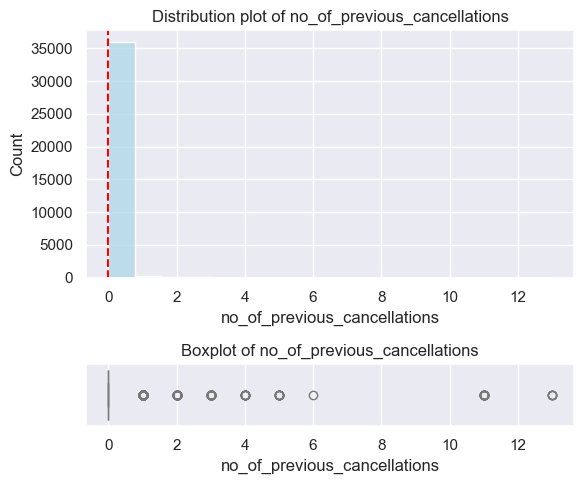

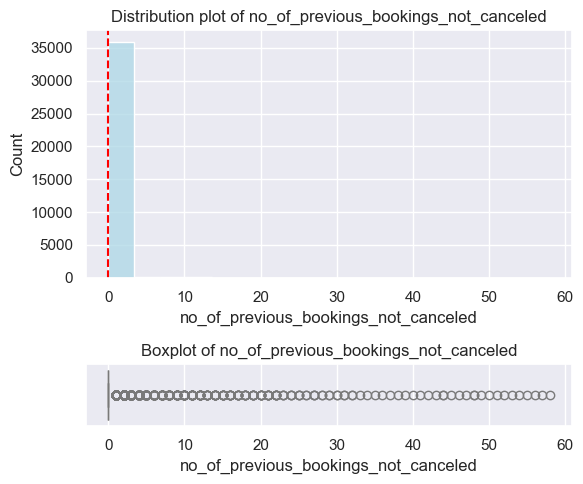

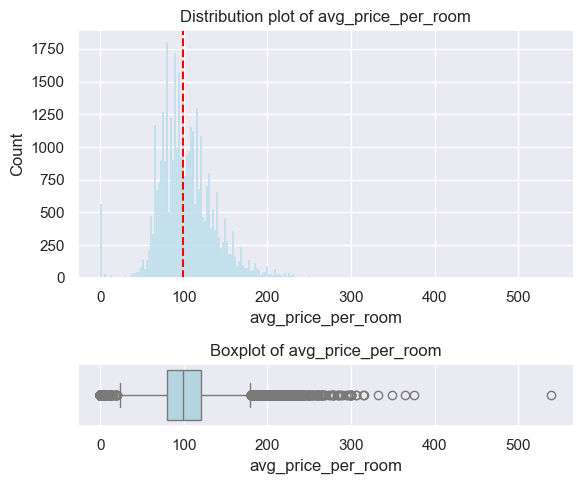

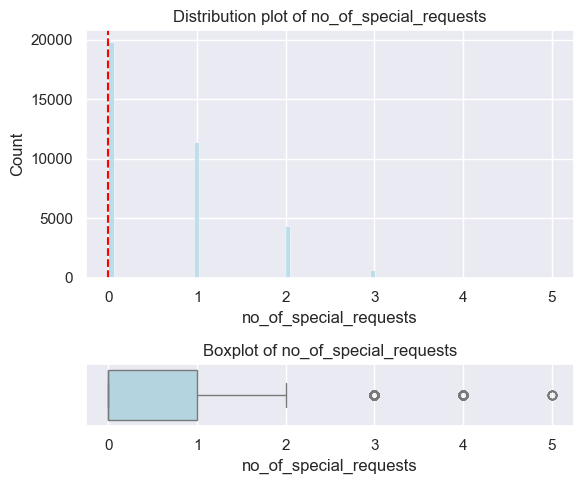

In [93]:
for column in columns_to_plot:
    dist_plot(eda_data, column)

In [94]:
# define a custom function univariate EDA of categorical columns

def pie_bar_plot(df,col):
  # Define the figure and the subplots with specified width ratios
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), gridspec_kw={'width_ratios': [3, 2]})
  # col_index = df.columns
  feature_counts = df[col].value_counts()
  # column_name = df_columns[]

  # First plot (bar chart) with colors and vertical brand names
  colors = plt.cm.Paired(range(len(col)))  # Use a colormap for colors
  axes[0].bar(feature_counts.index, feature_counts.values, color=colors)
  axes[0].set_xlabel(col)
  axes[0].set_ylabel('Counts')
  axes[0].set_title(f'Bar Chart of {col}')
  # axes[0].axhline(feature_counts.median(), color='red', linestyle='--')
  axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels to vertical

  # Second plot (pie chart)
  axes[1].pie(feature_counts, labels=feature_counts.index, autopct='%1.1f%%')
  axes[1].set_title(f'Distribution of {col}')

  # Ensure proper layout
  plt.tight_layout()

  # Show the plots
  plt.show()

In [95]:
#get non_numerical columns
non_num_cols = (eda_data
                .select_dtypes('category')
                .columns
                )
non_num_cols


Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')

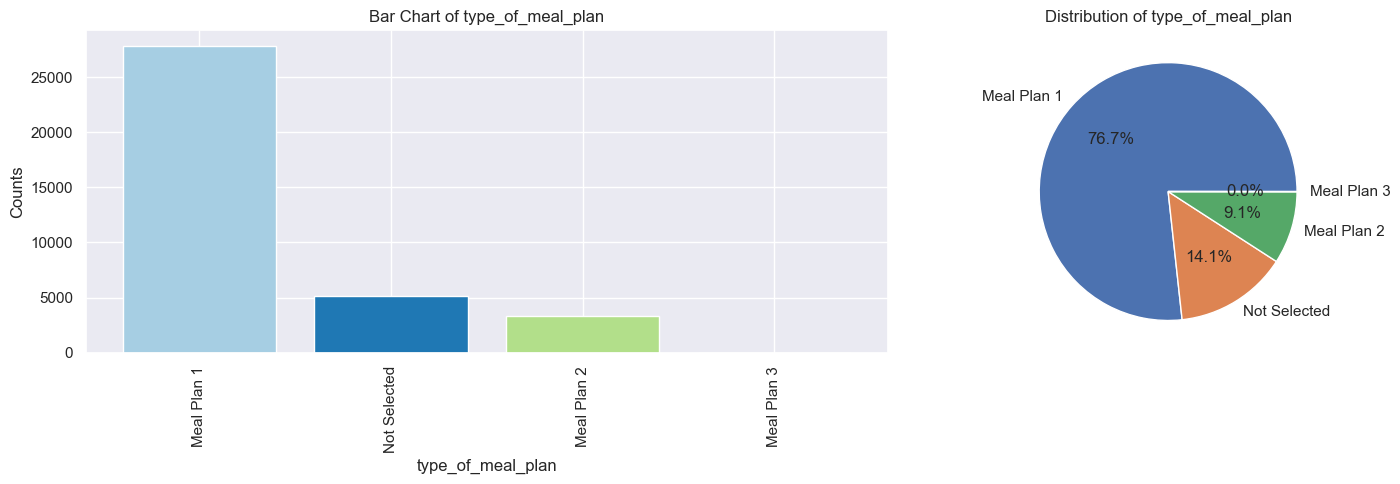

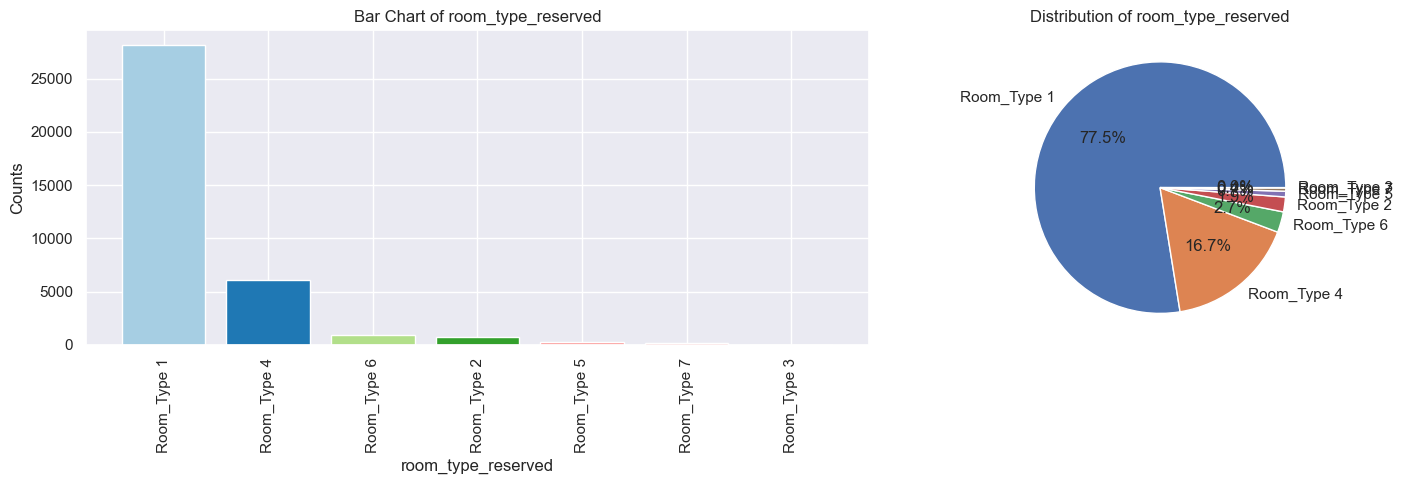

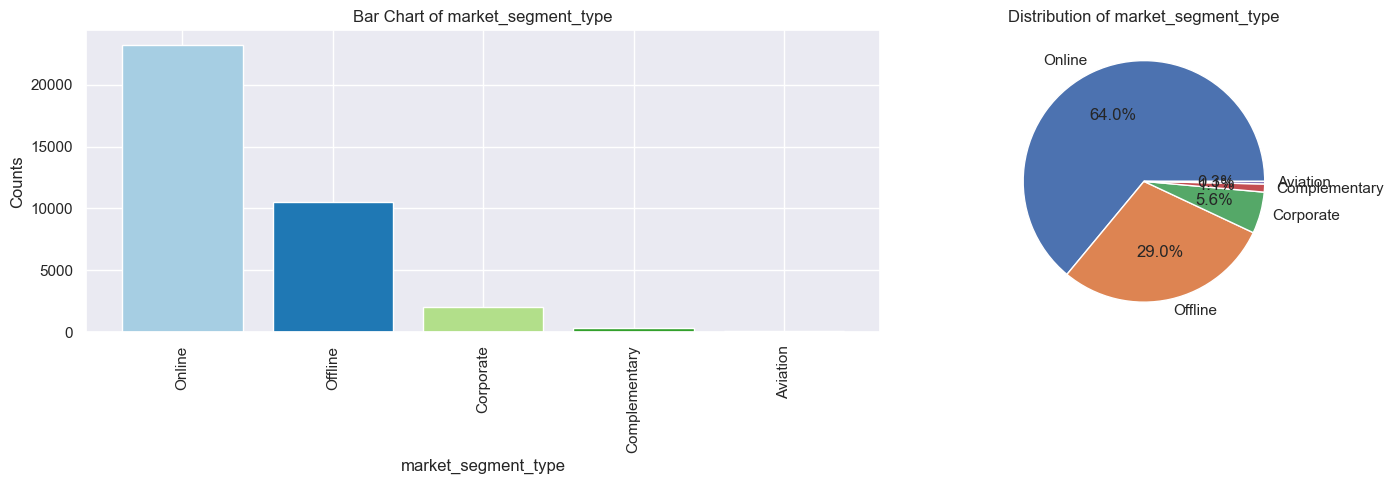

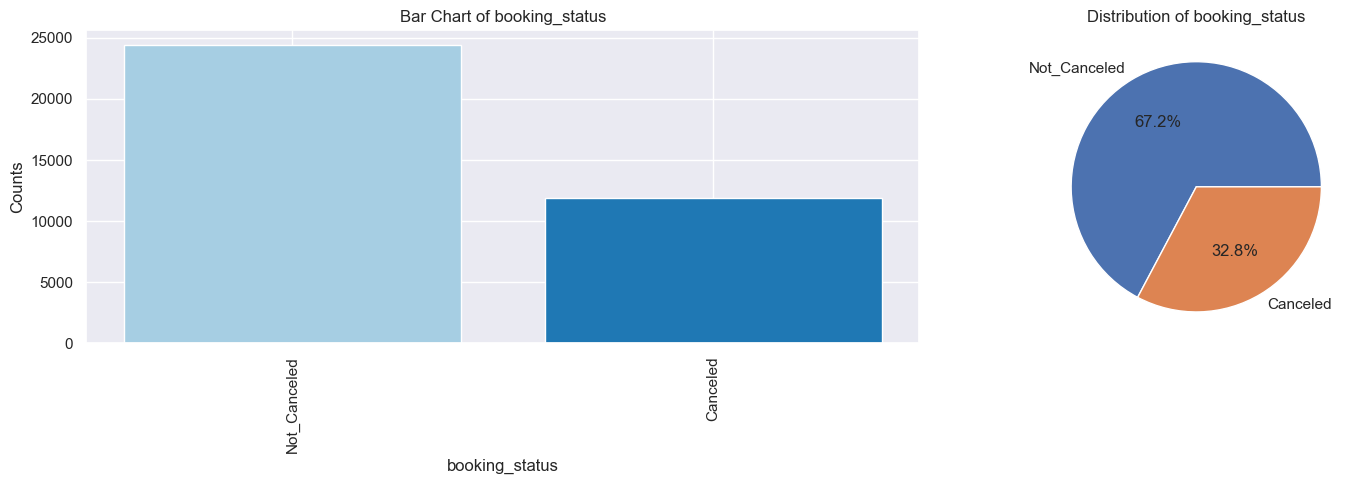

In [96]:
# plot the univariate EDA charts for the non numerica columns

for nn_col in non_num_cols:
  pie_bar_plot(eda_data, nn_col )

## Biviriate Analaysis


<Axes: xlabel='market_segment_type'>

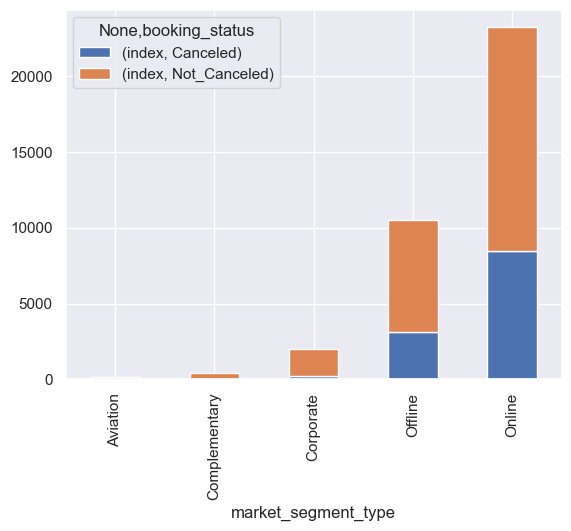

In [97]:
#booking status across Room Type
#Booking status across Market Segment

(eda_data
 [['booking_status','market_segment_type']]
 .reset_index()
#  .groupby(['market_segment_type'])
#  ['booking_status']
#  .count()
 .pivot_table(index='market_segment_type', columns='booking_status',  aggfunc=  'count')
 .plot.bar(stacked= True)
 
)

In [98]:
# define a custom function for the bivariate between one categorical and continuous variable
def cat_cont_bivar(df, cat_var, cont_var):
  plt.figure(figsize=(15, 6))  # Set the figure size
  # x = cat_var being categorical variable
  # y = cont_var being continuos variable
  sns.boxplot( data = df,x=cat_var, y=cont_var)
  plt.show()

In [99]:
all_cat_cols = (eda_data
            .select_dtypes('category')
            )

all_num_columns = (eda_data
                   .select_dtypes(include= np.number)
                   )

all_num_columns.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_month', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests'],
      dtype='object')

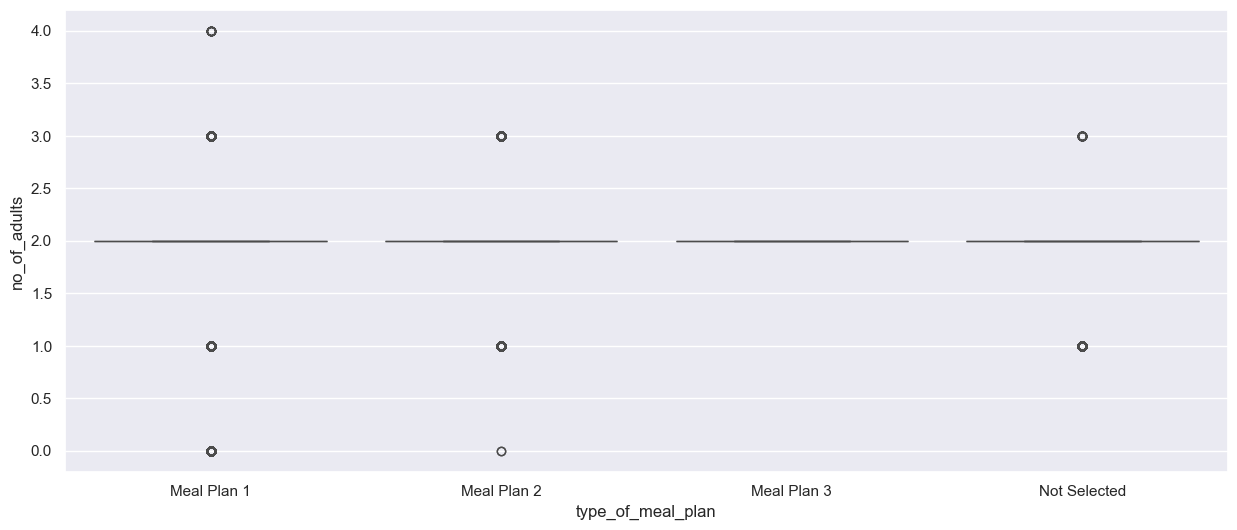

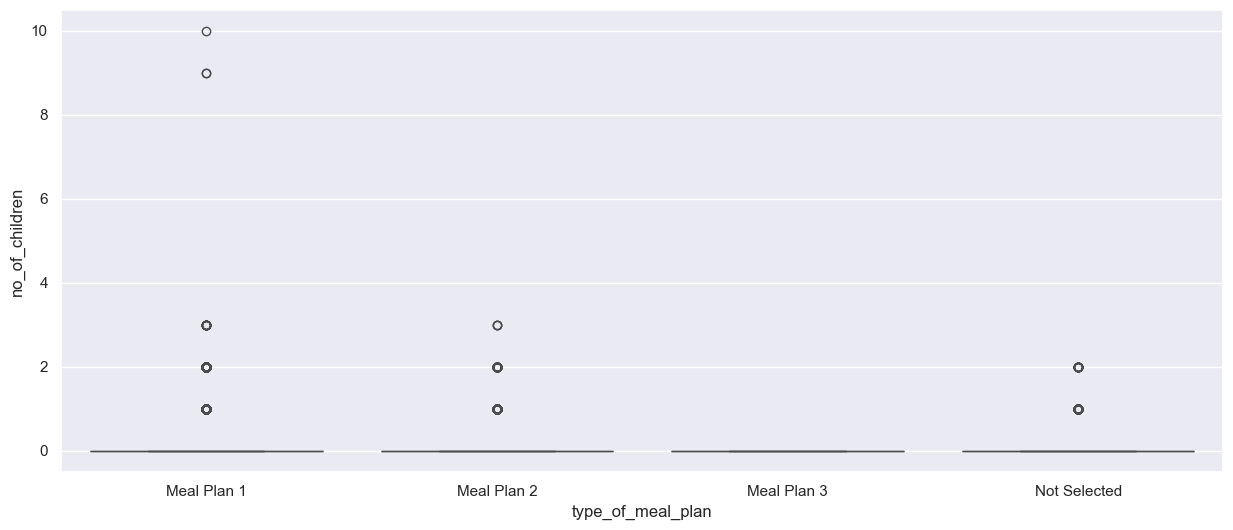

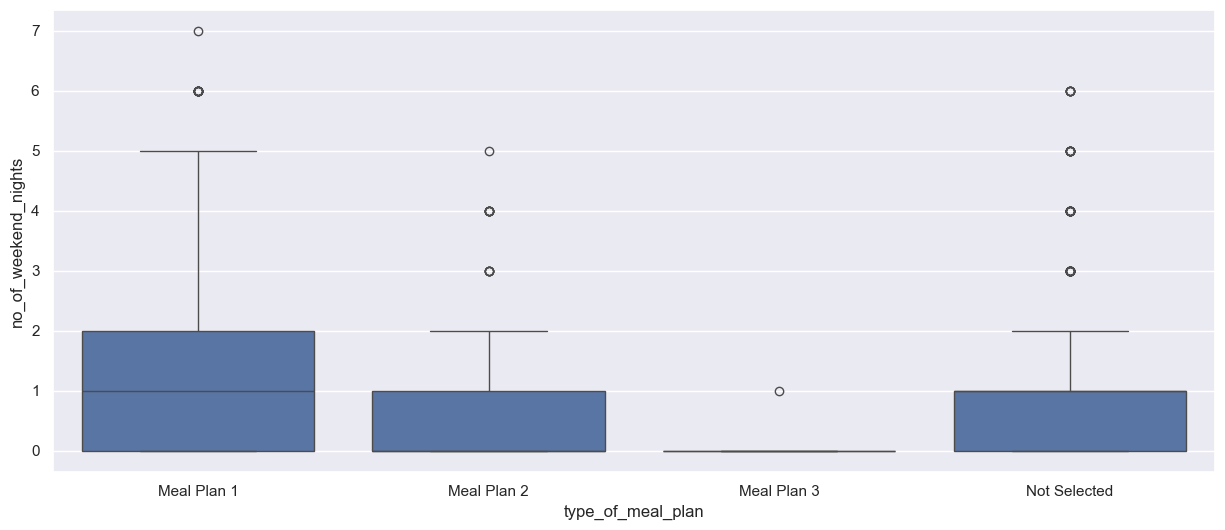

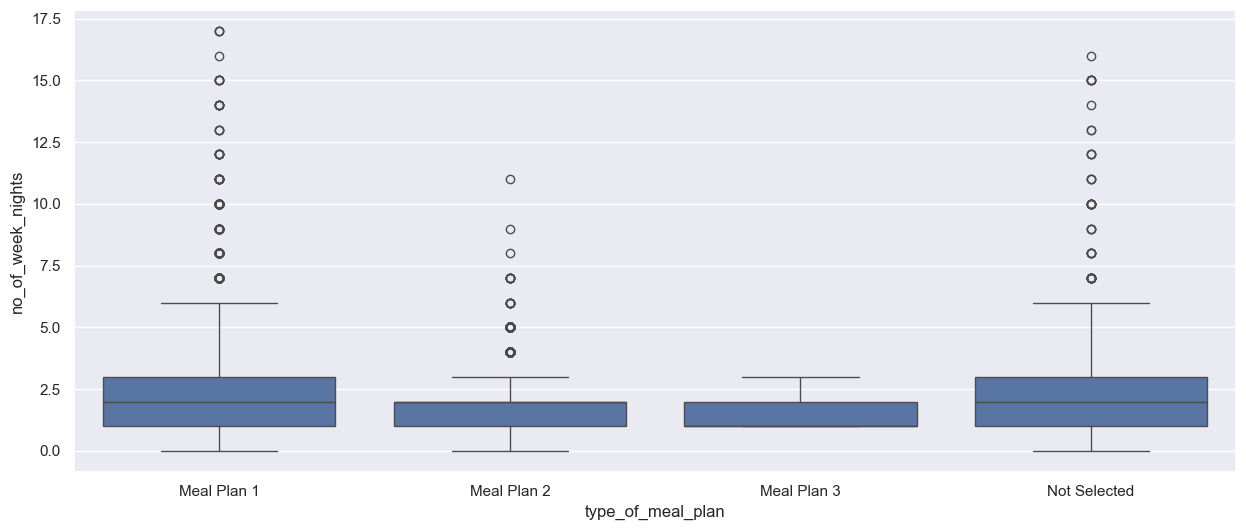

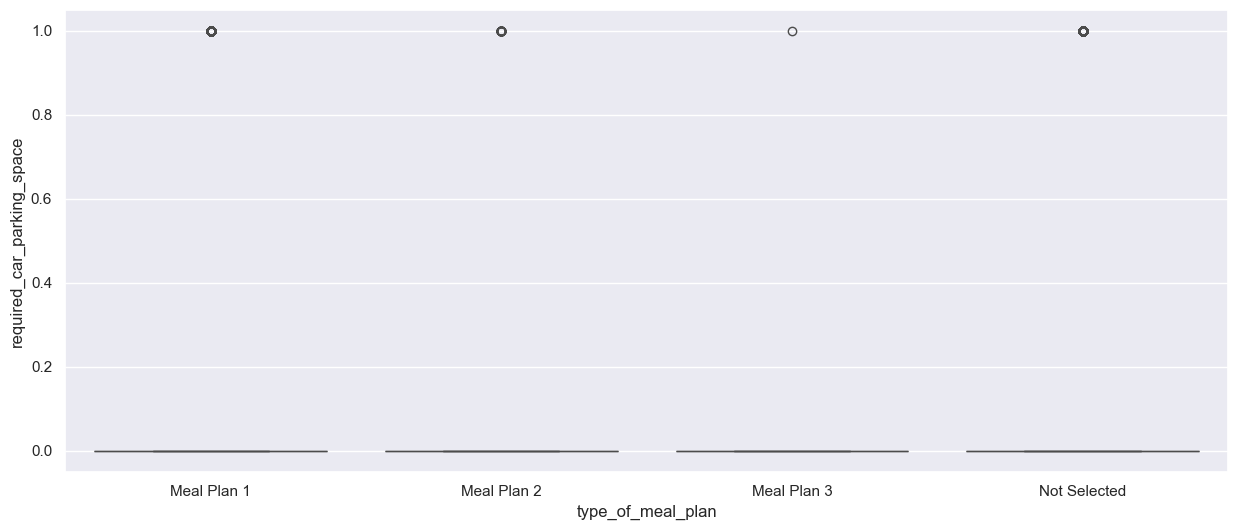

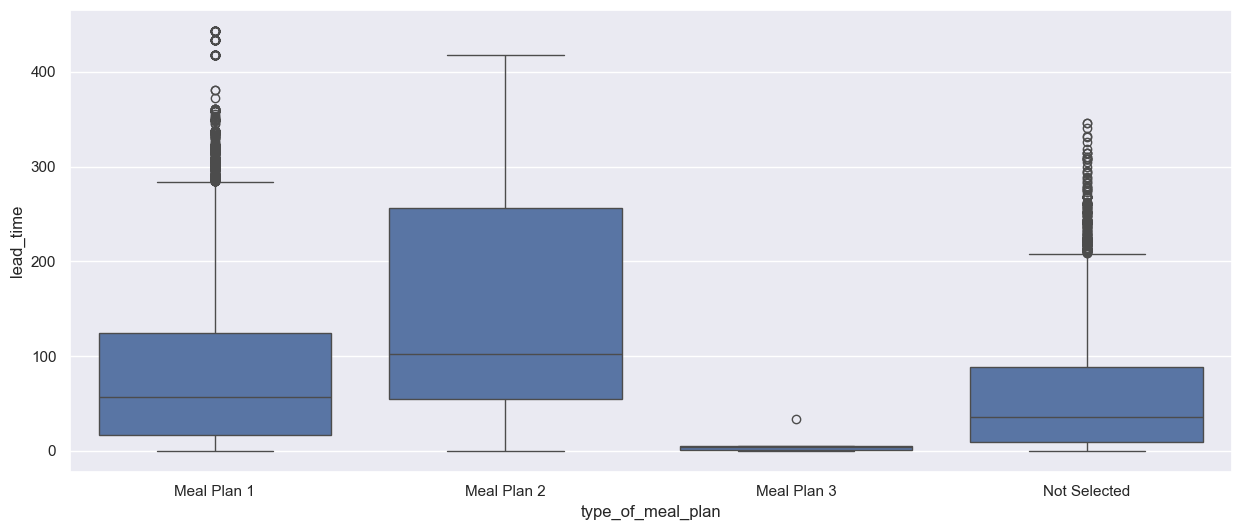

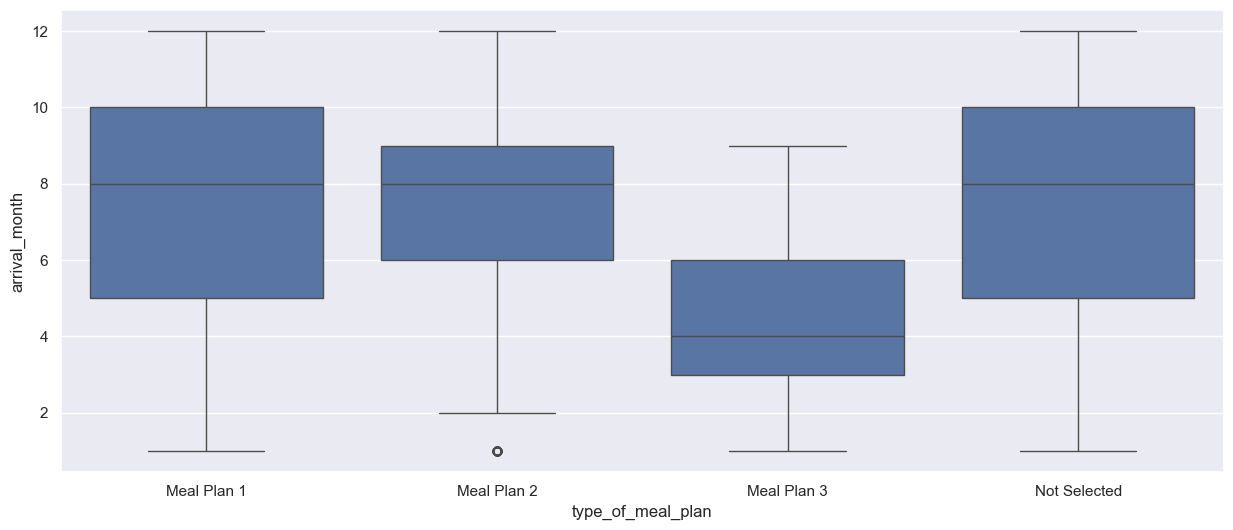

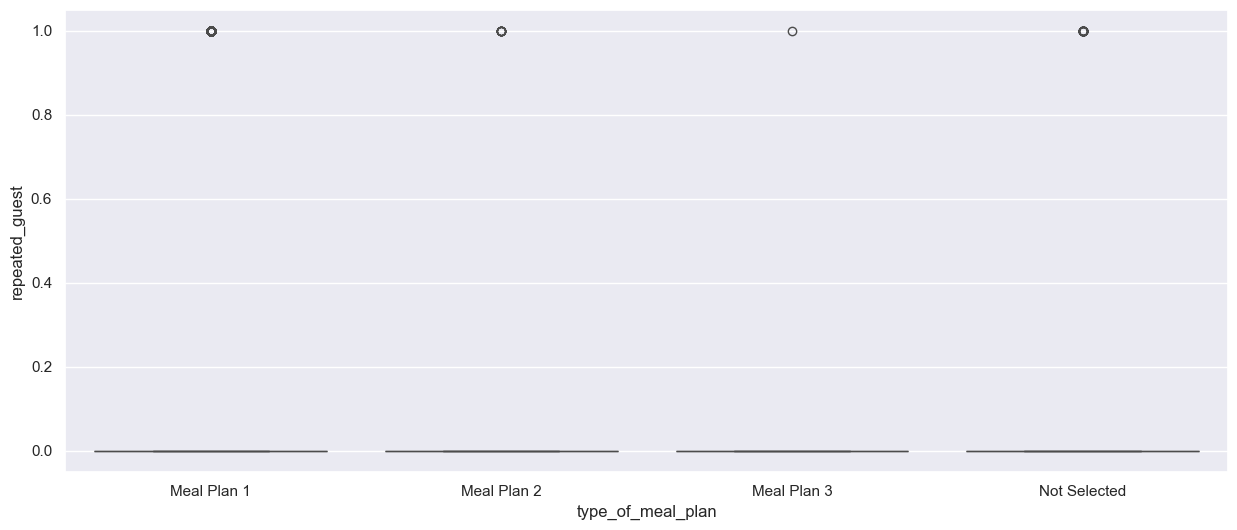

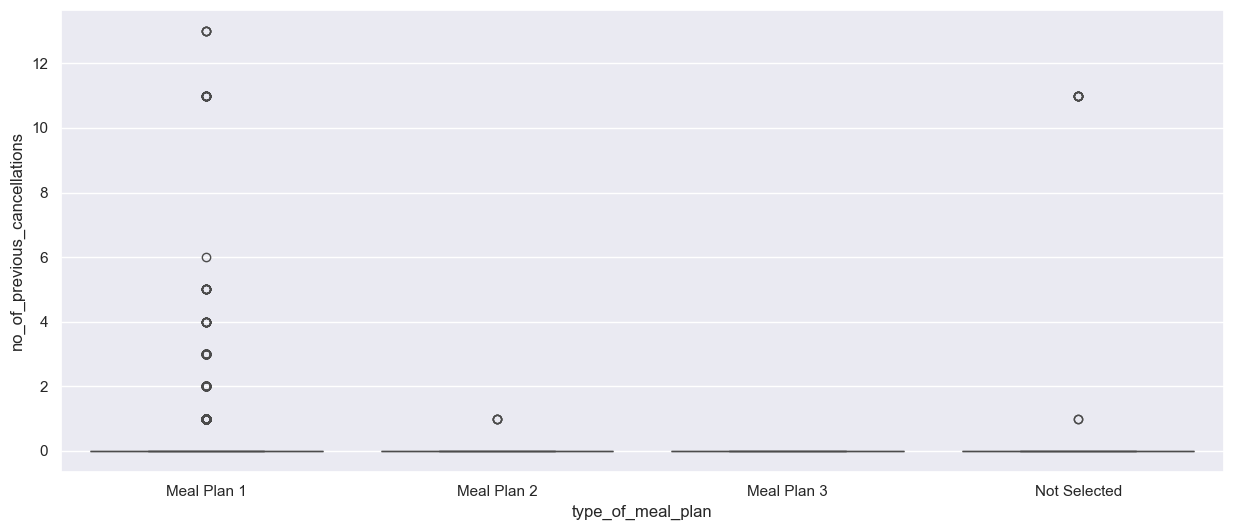

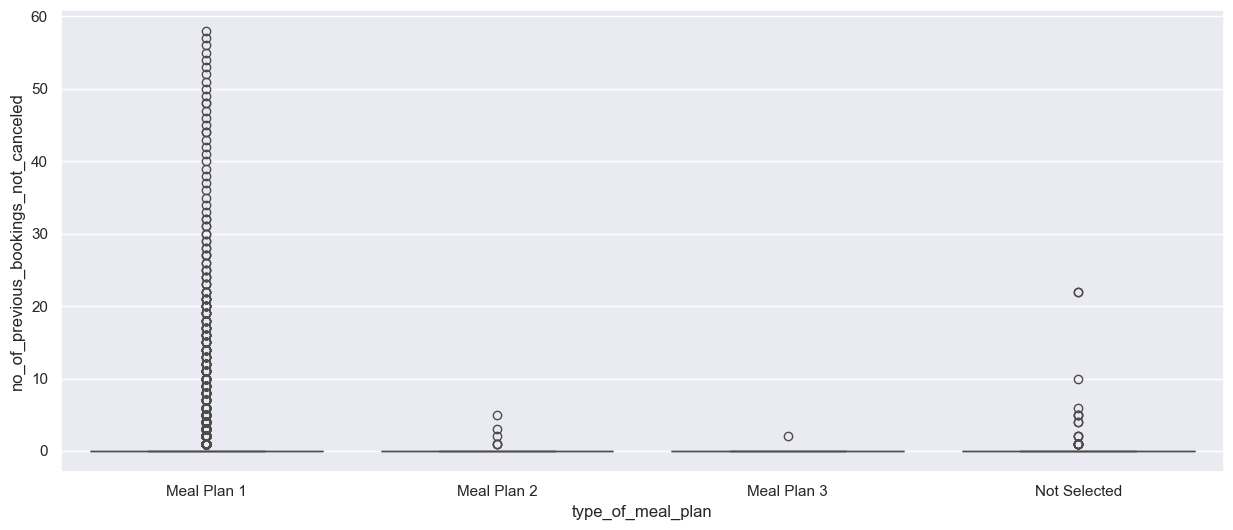

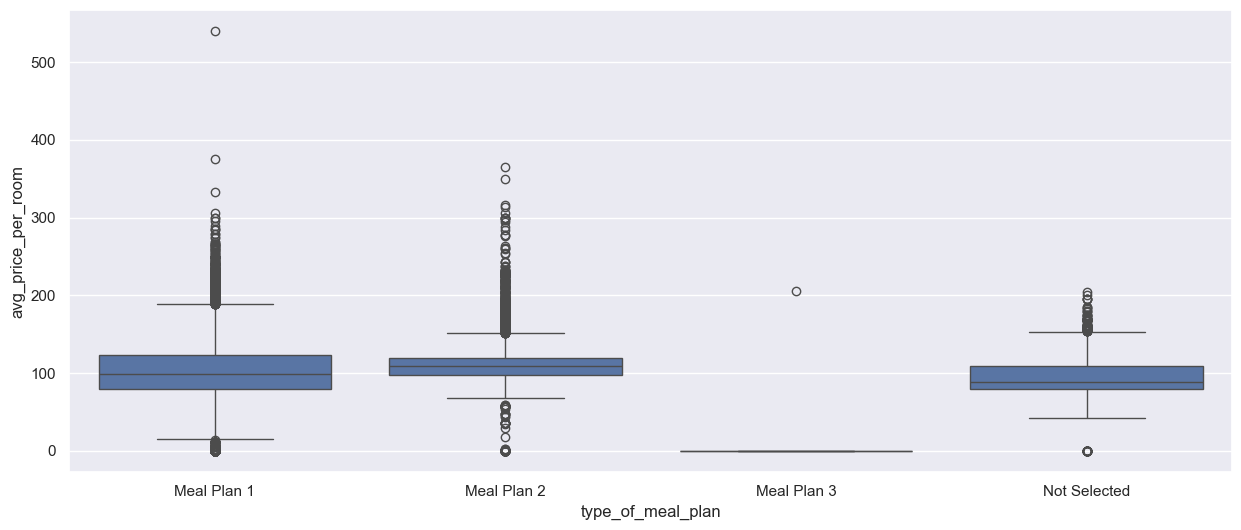

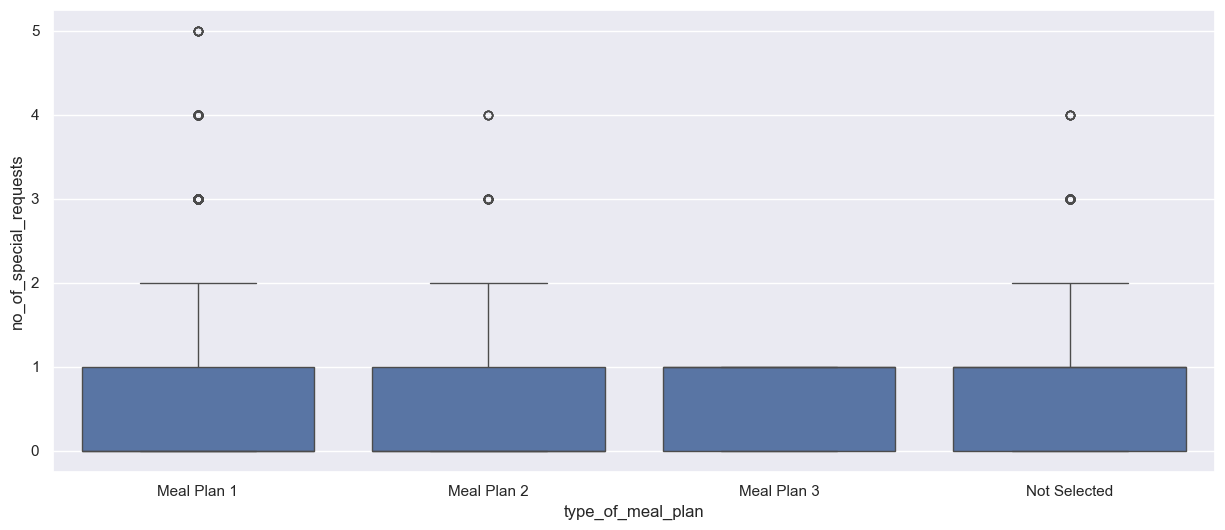

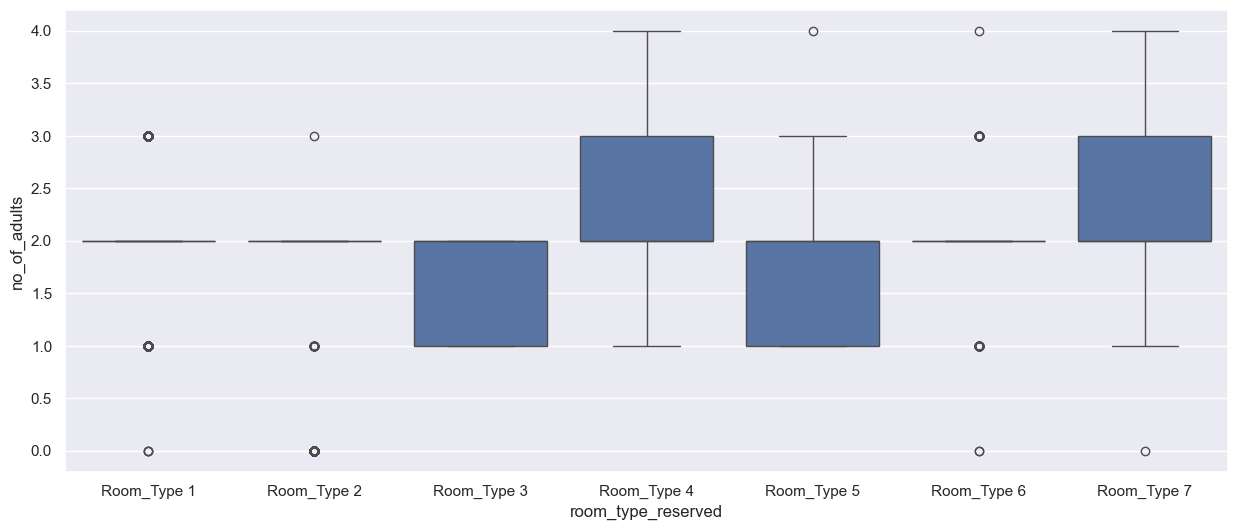

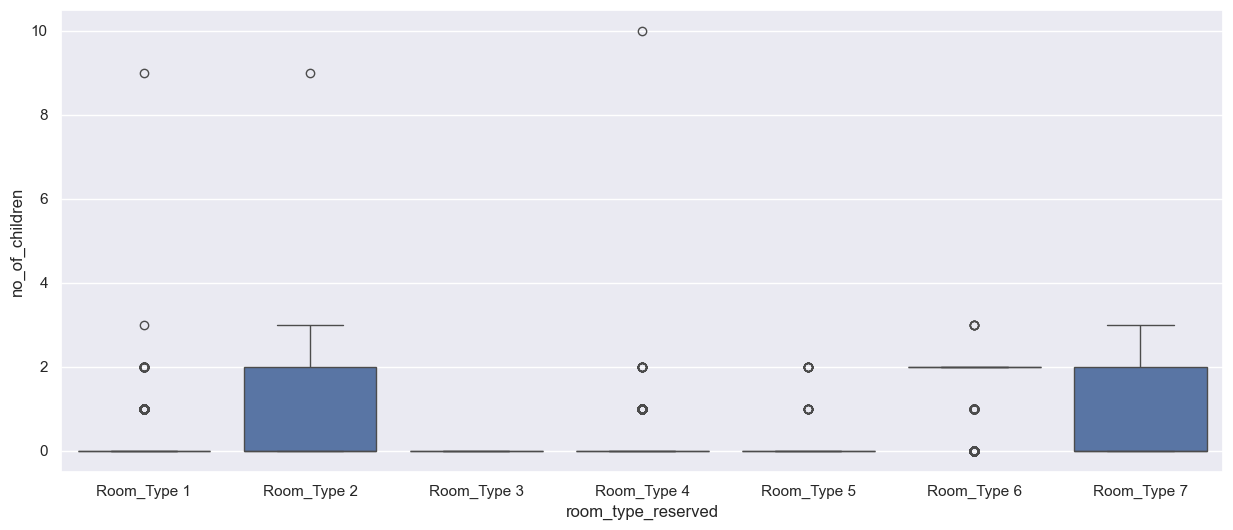

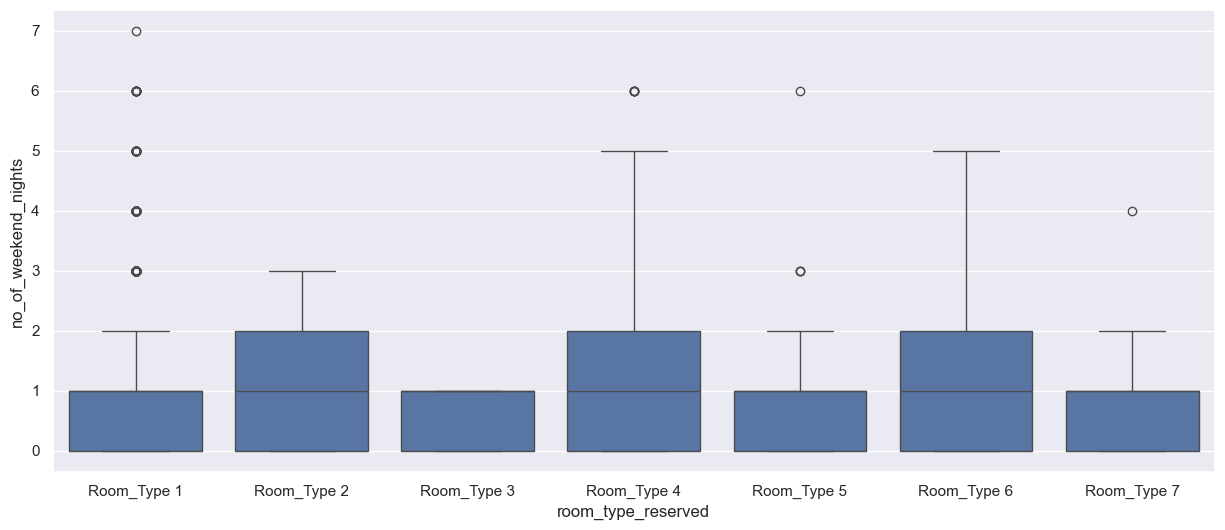

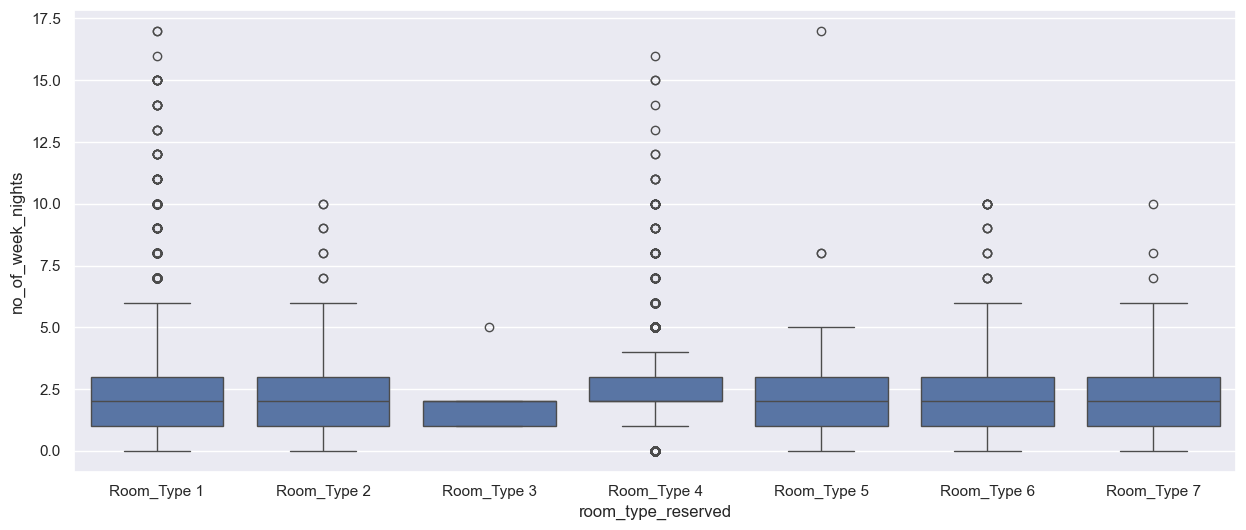

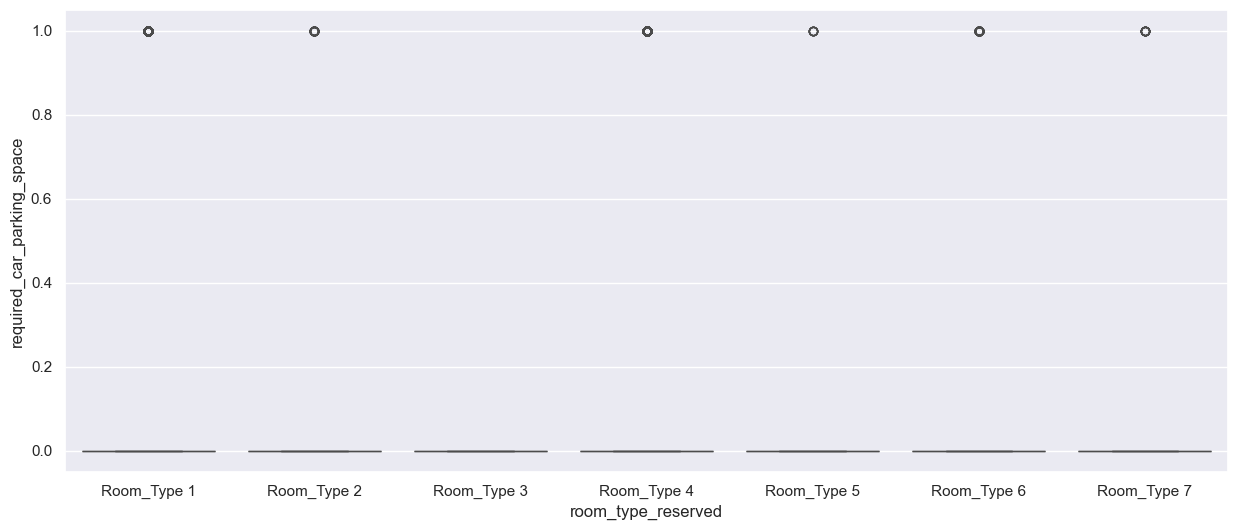

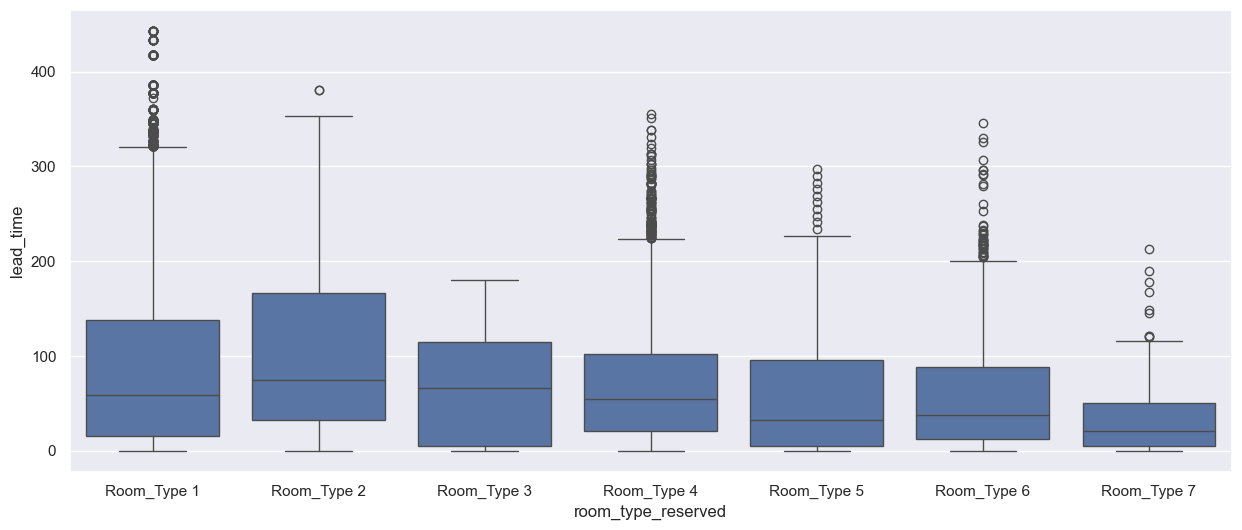

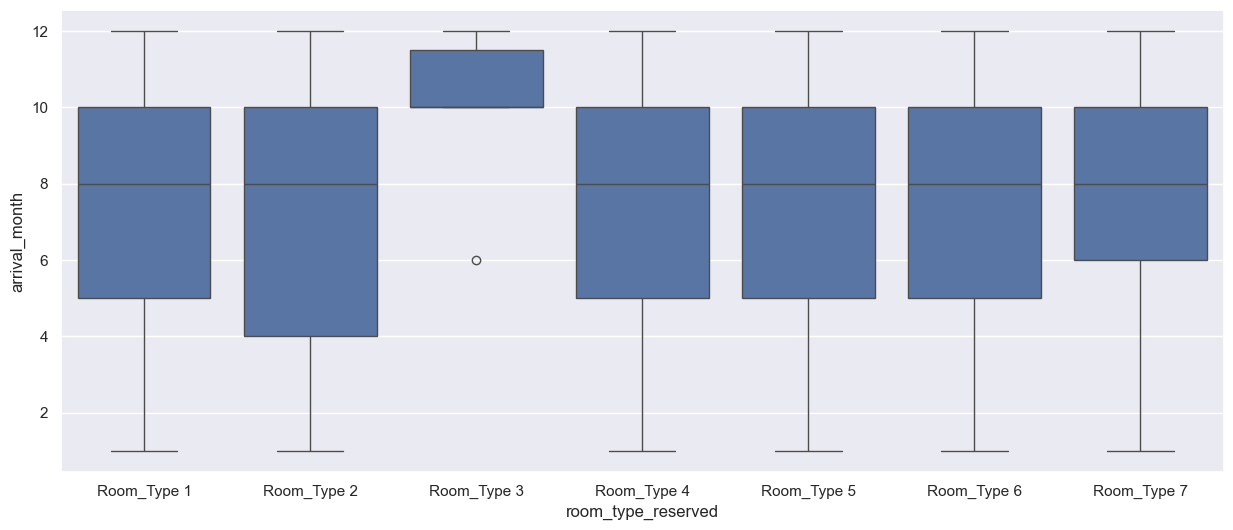

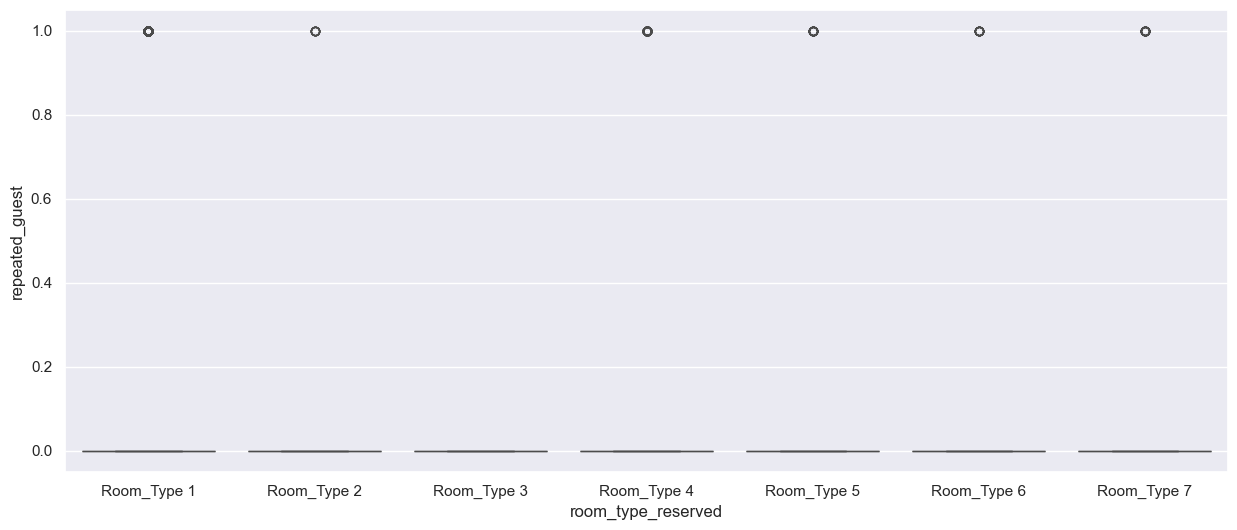

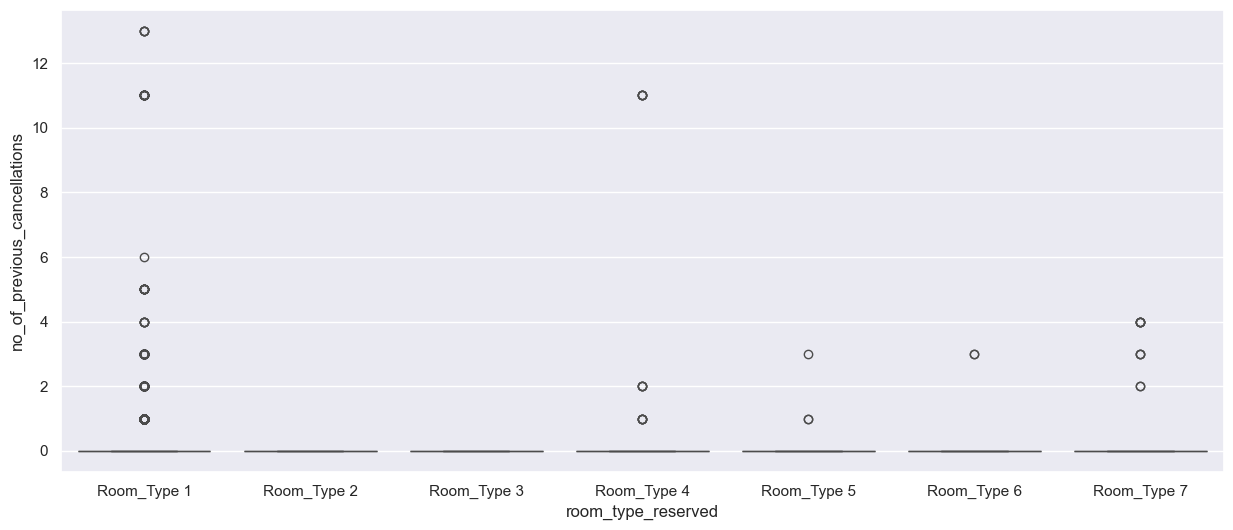

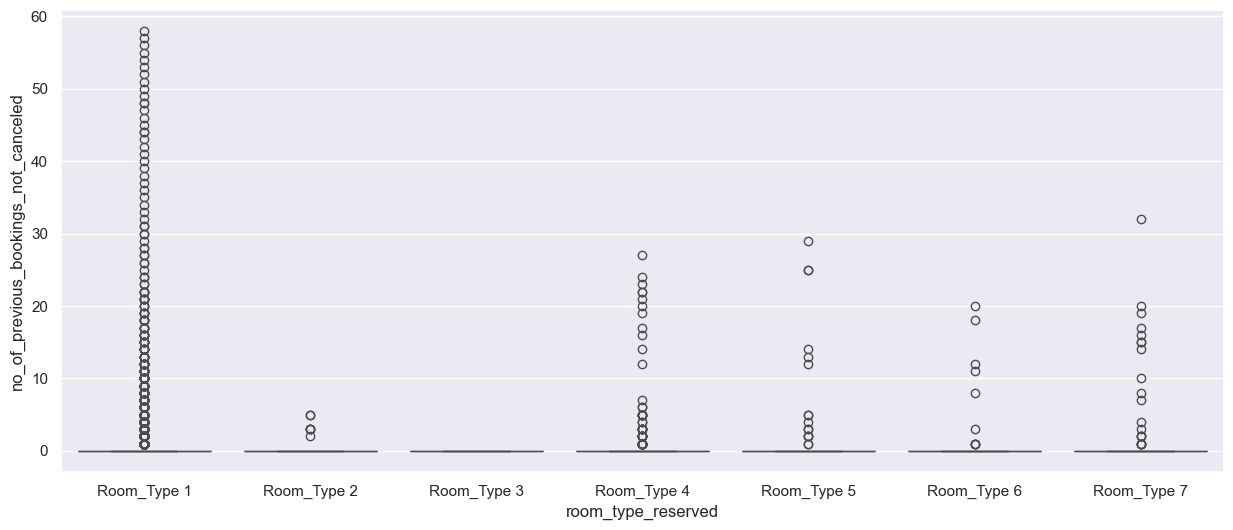

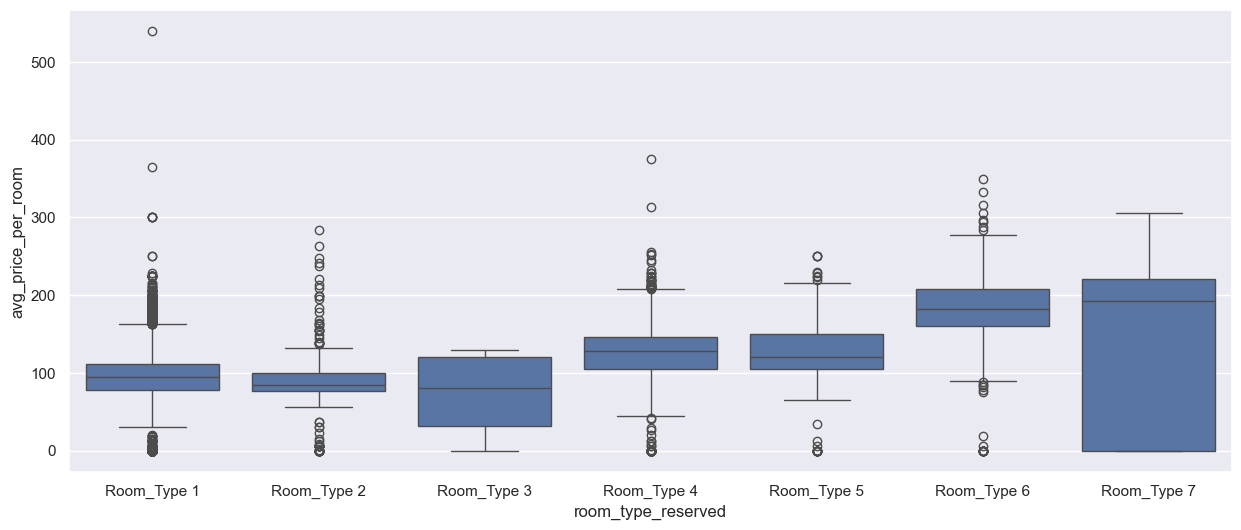

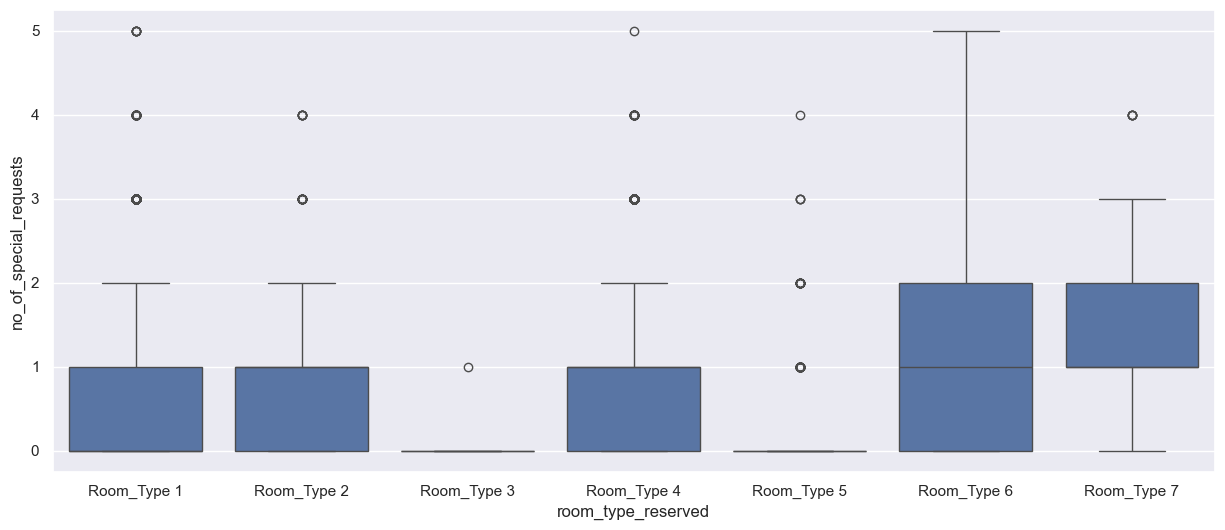

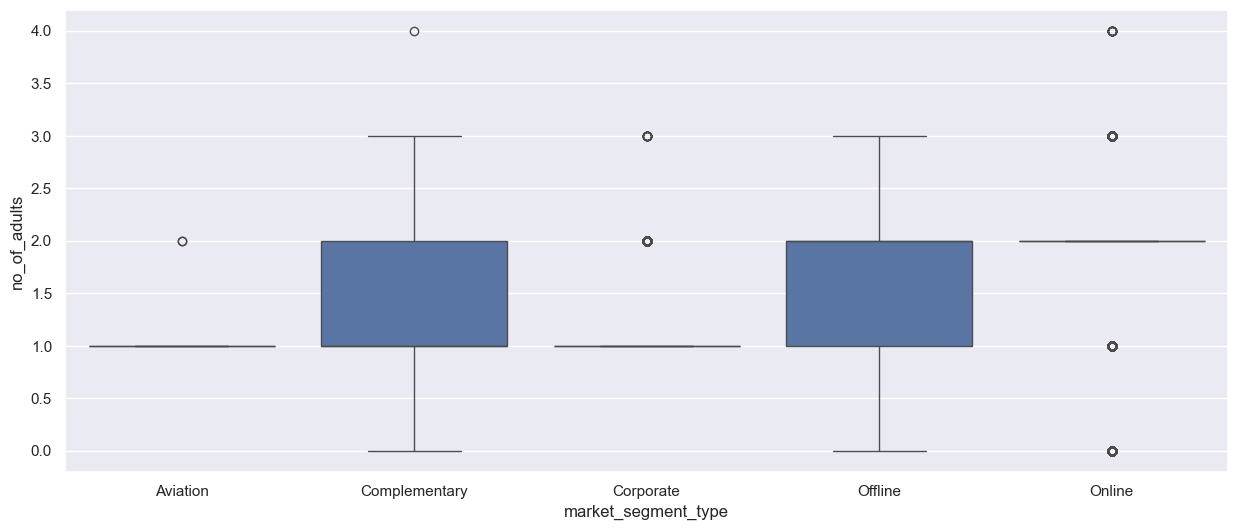

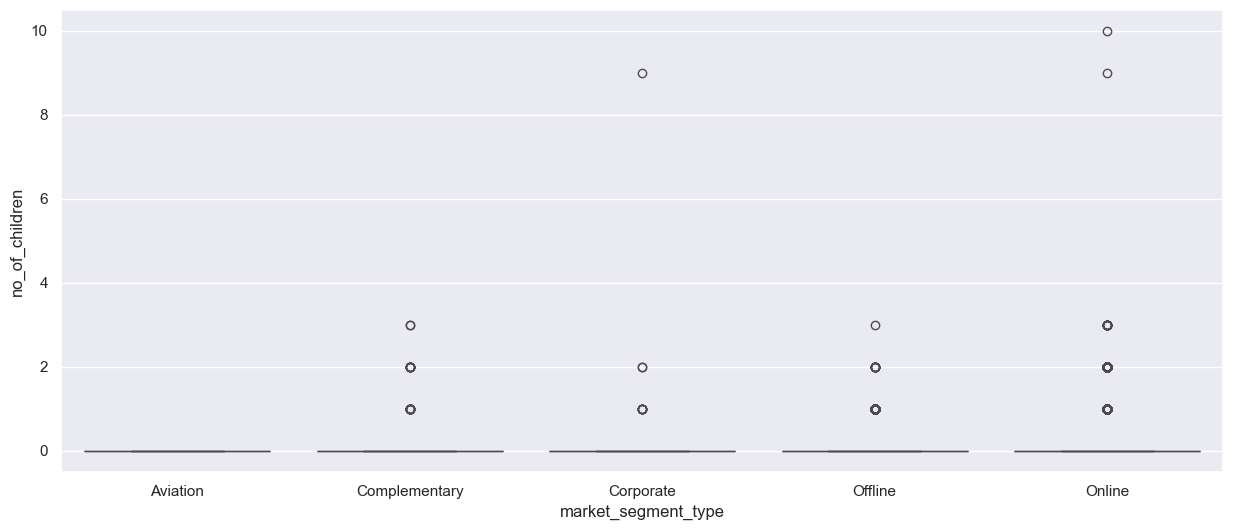

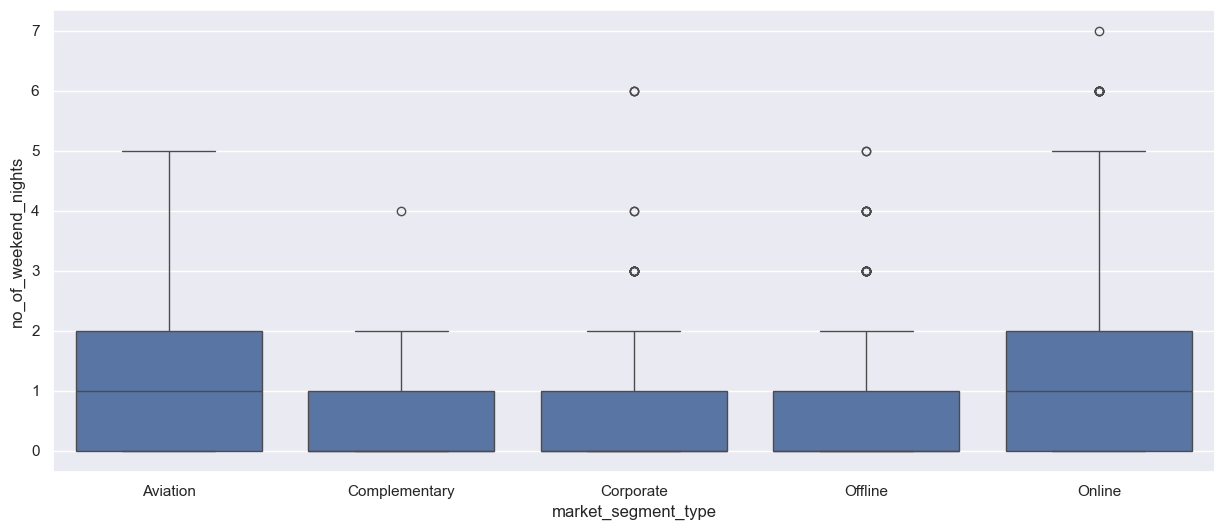

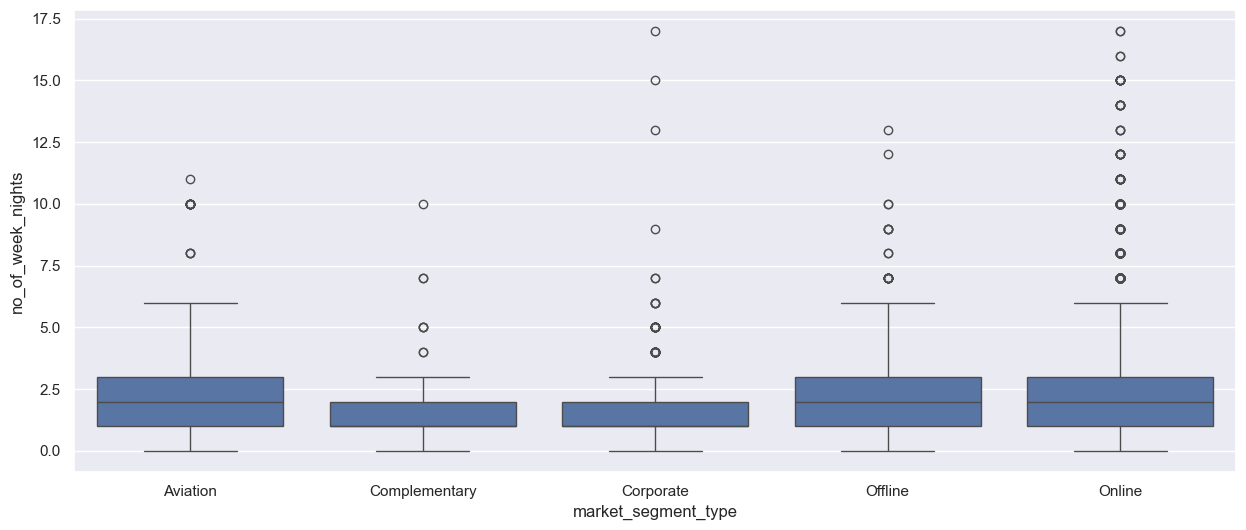

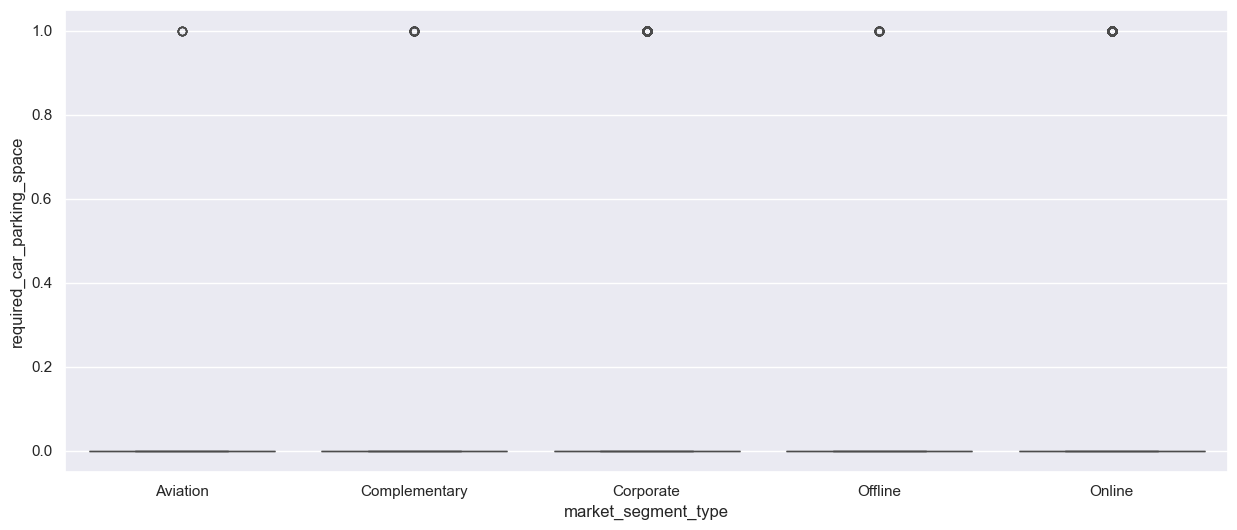

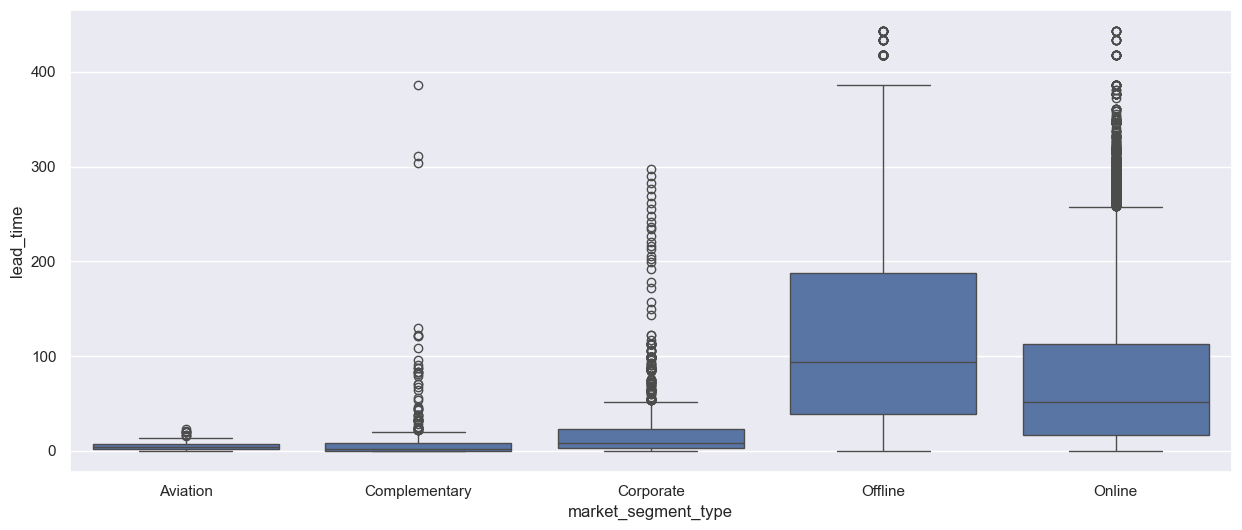

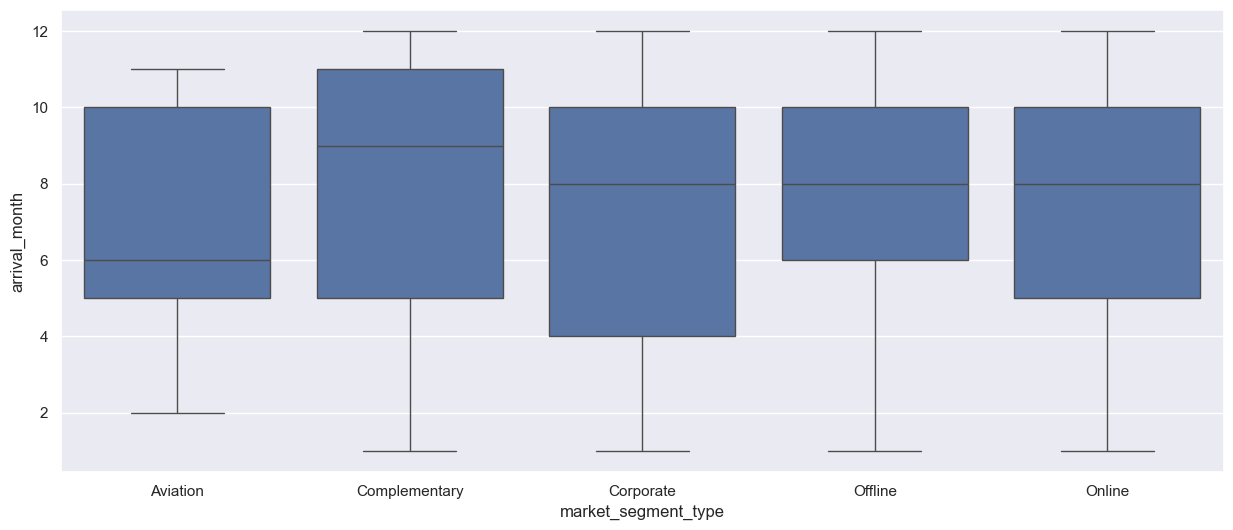

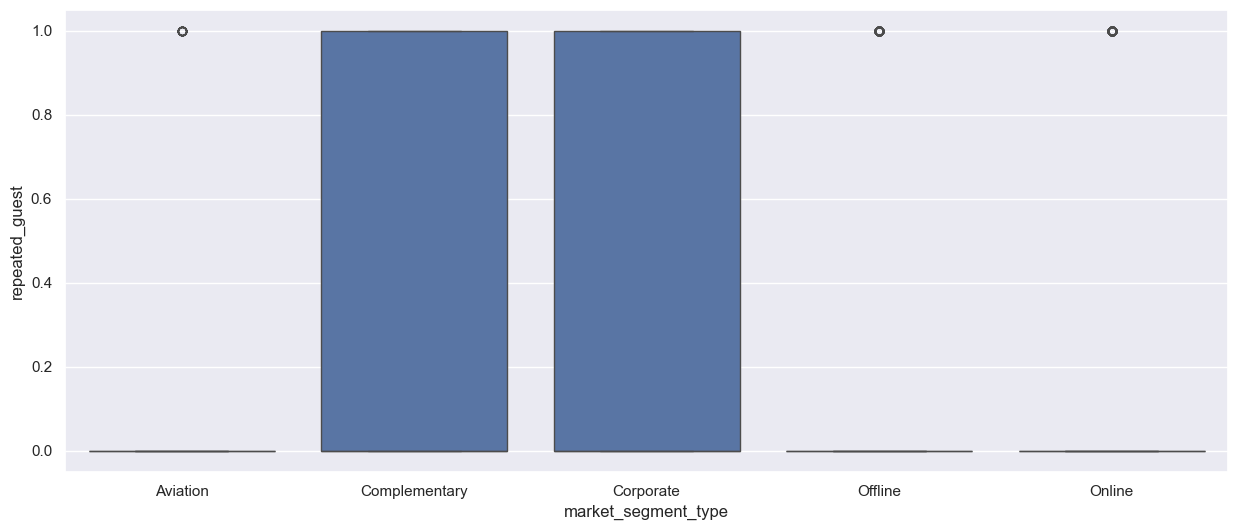

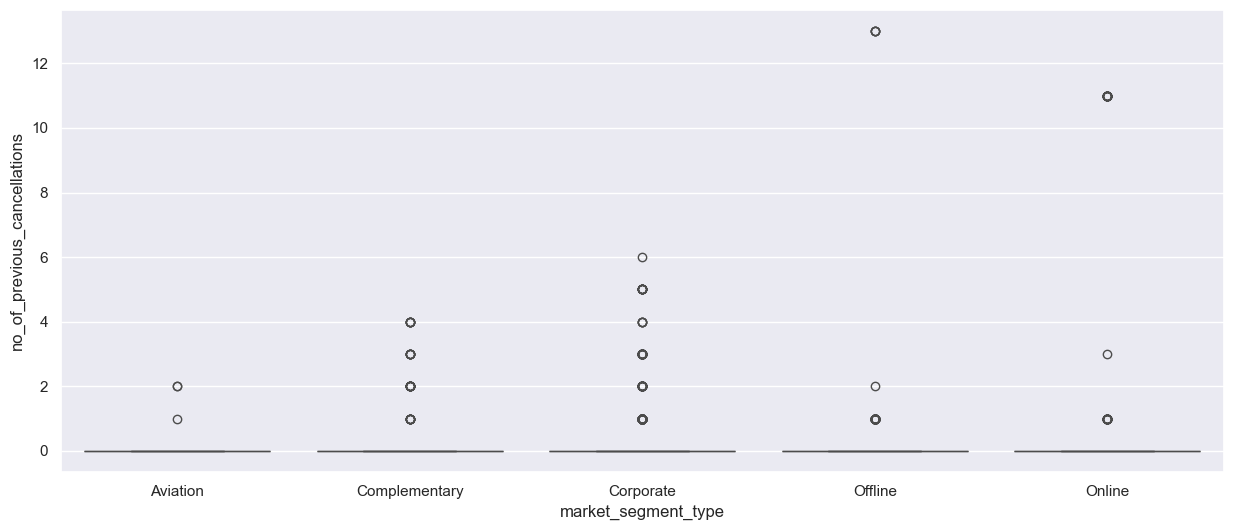

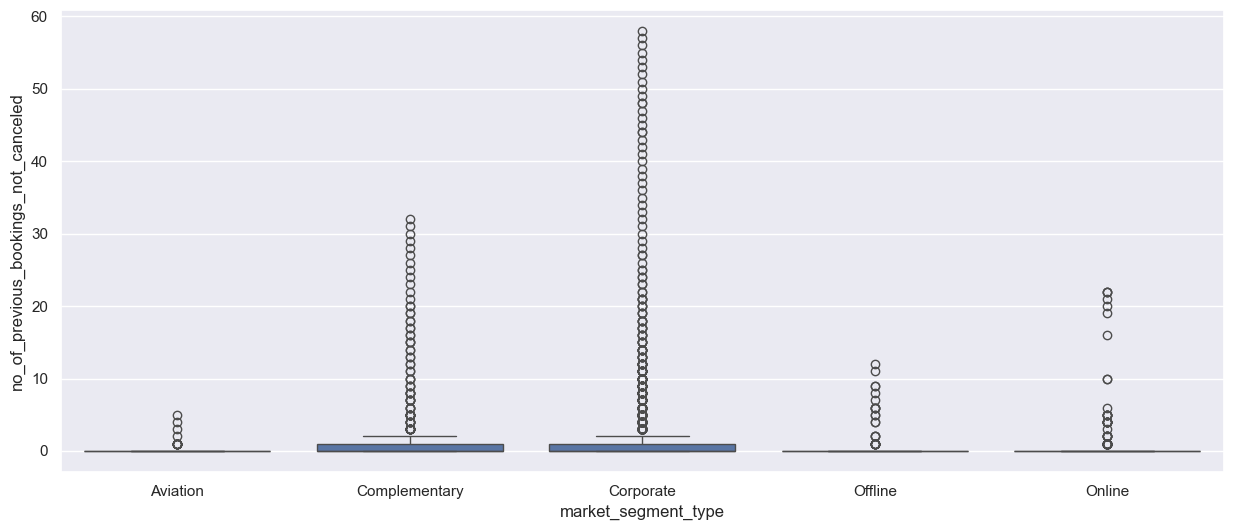

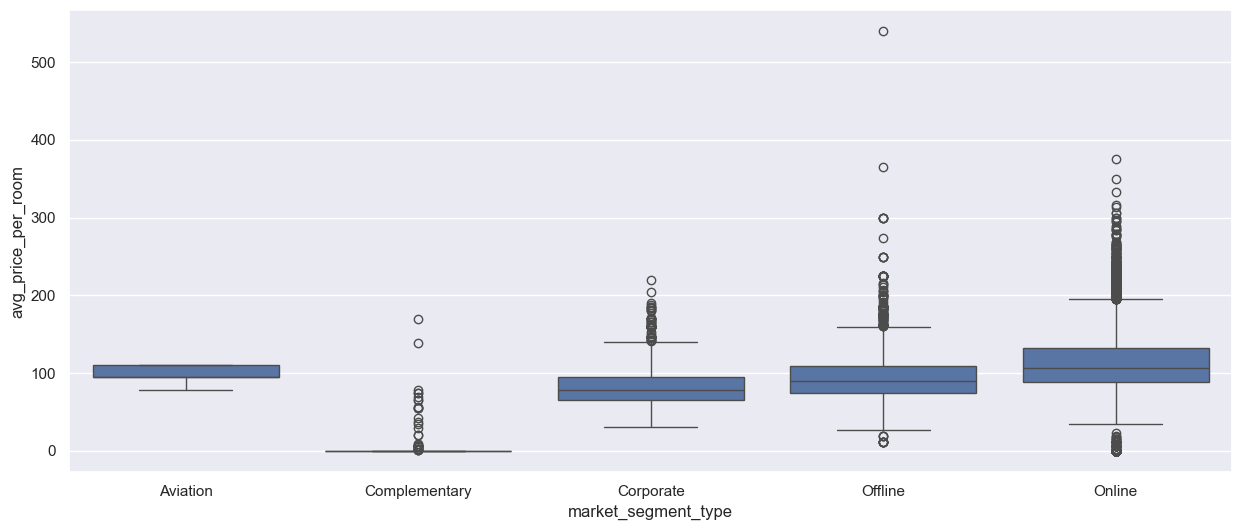

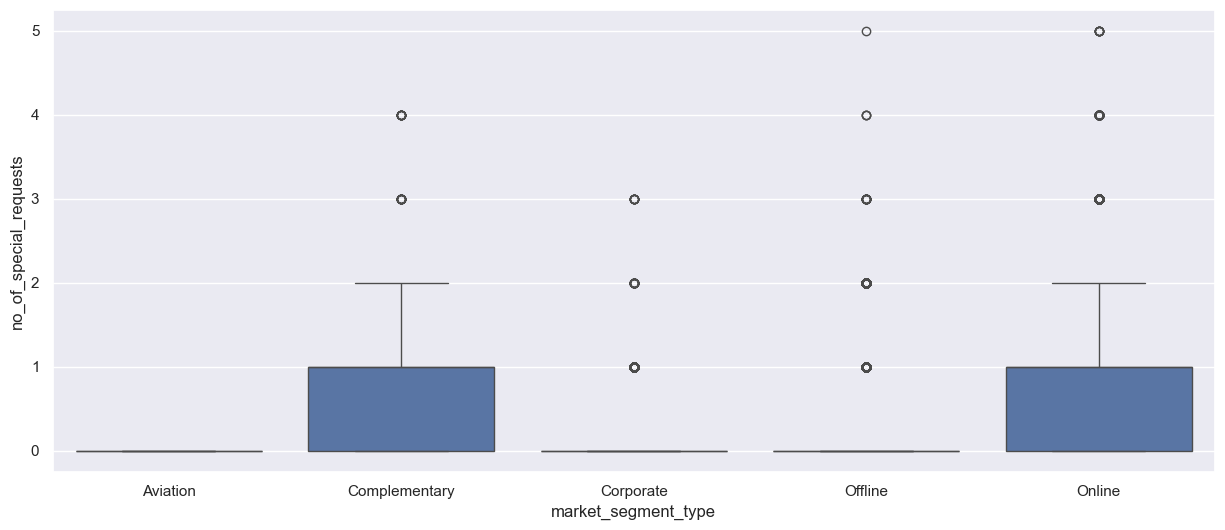

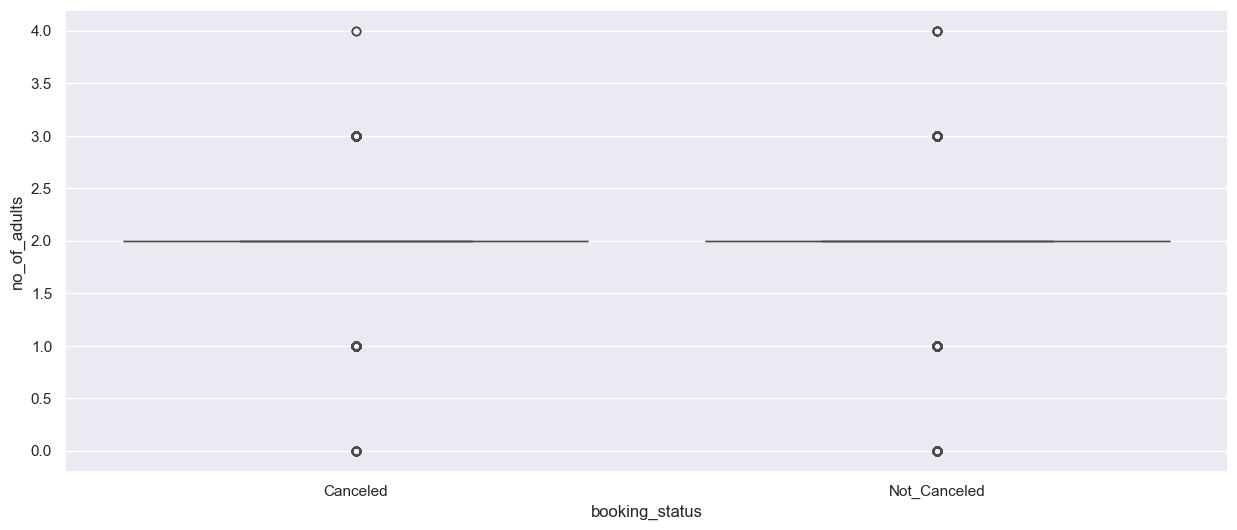

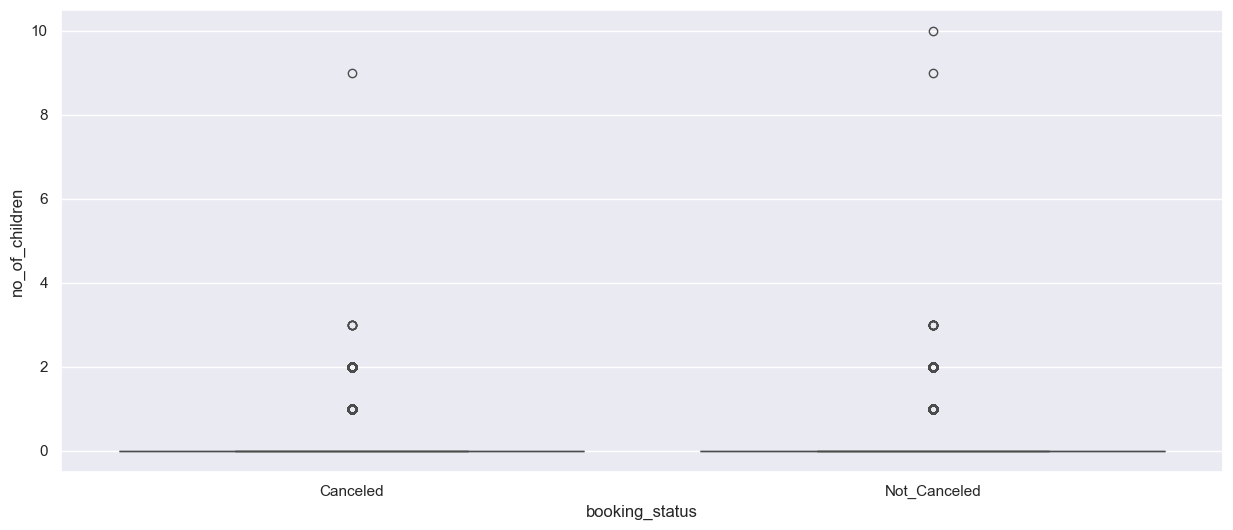

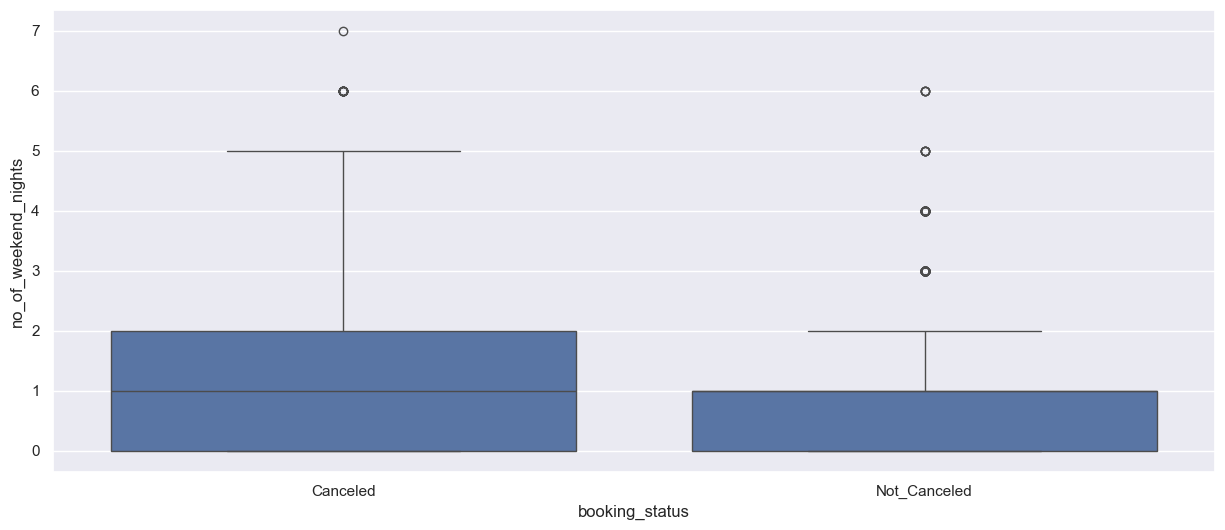

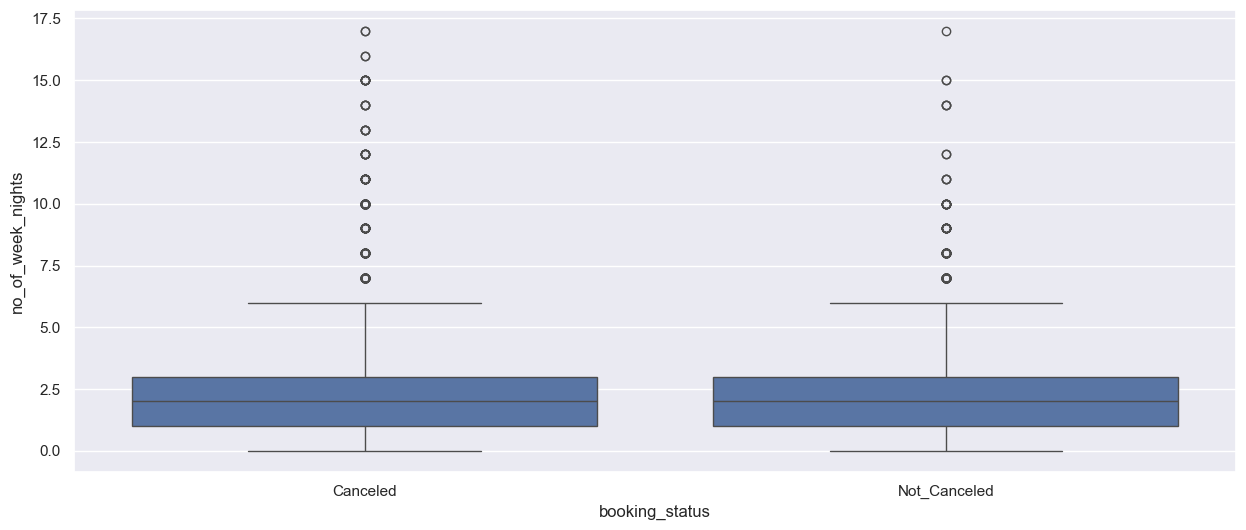

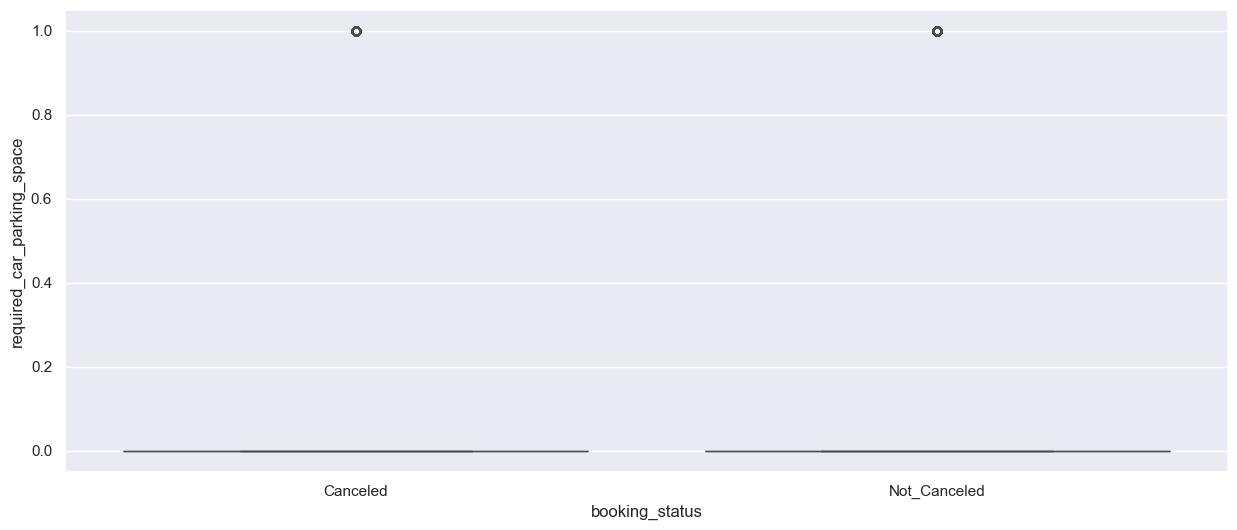

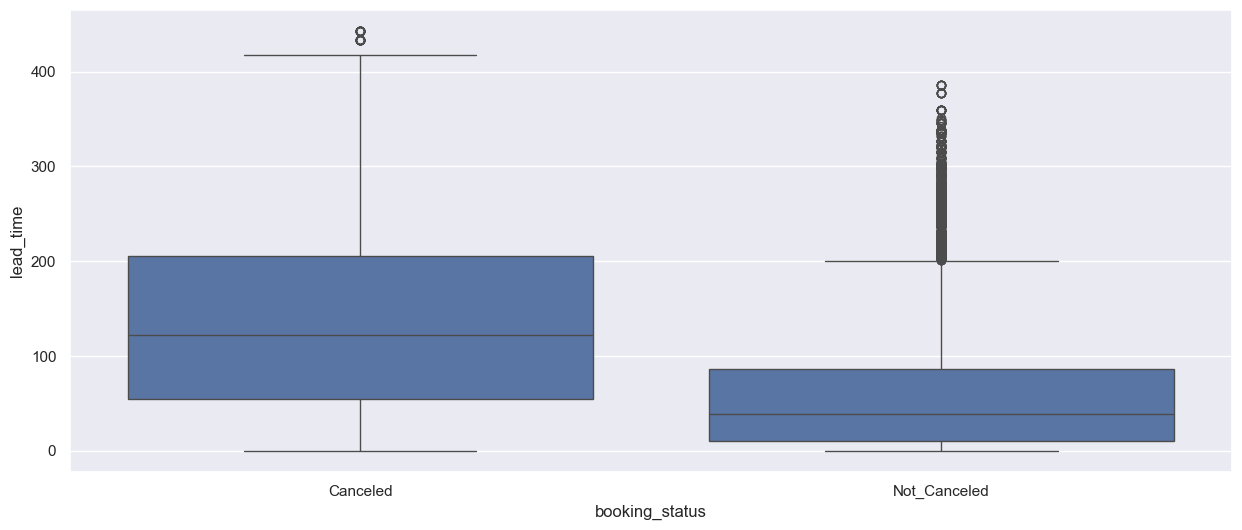

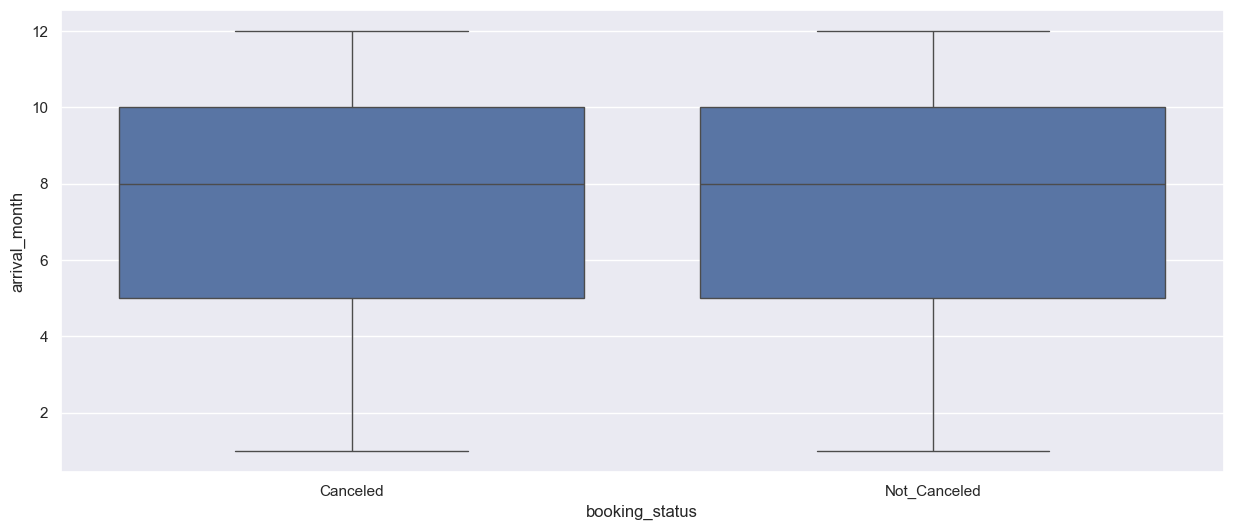

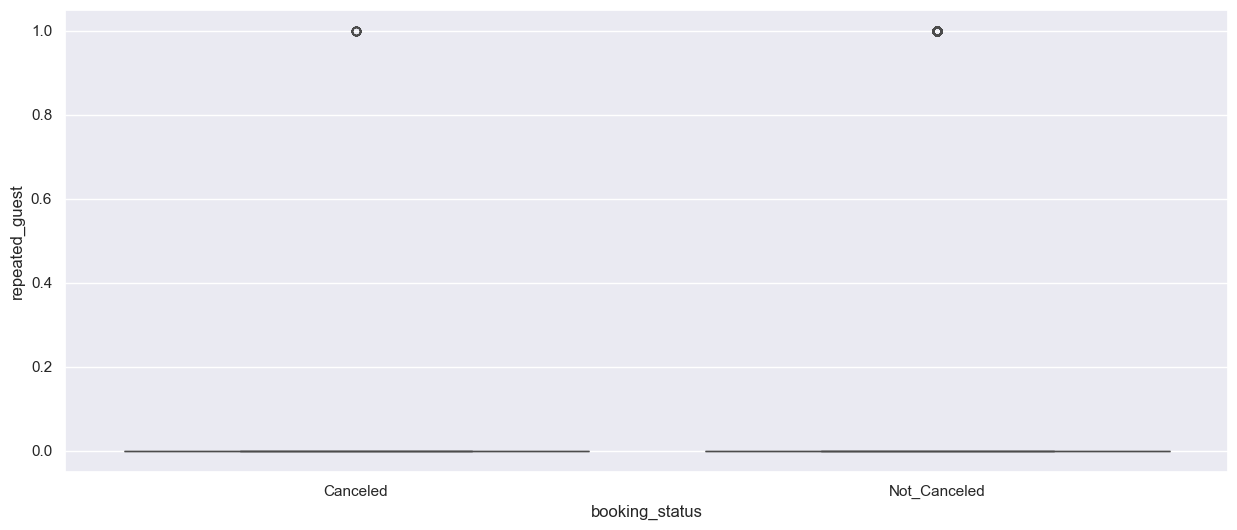

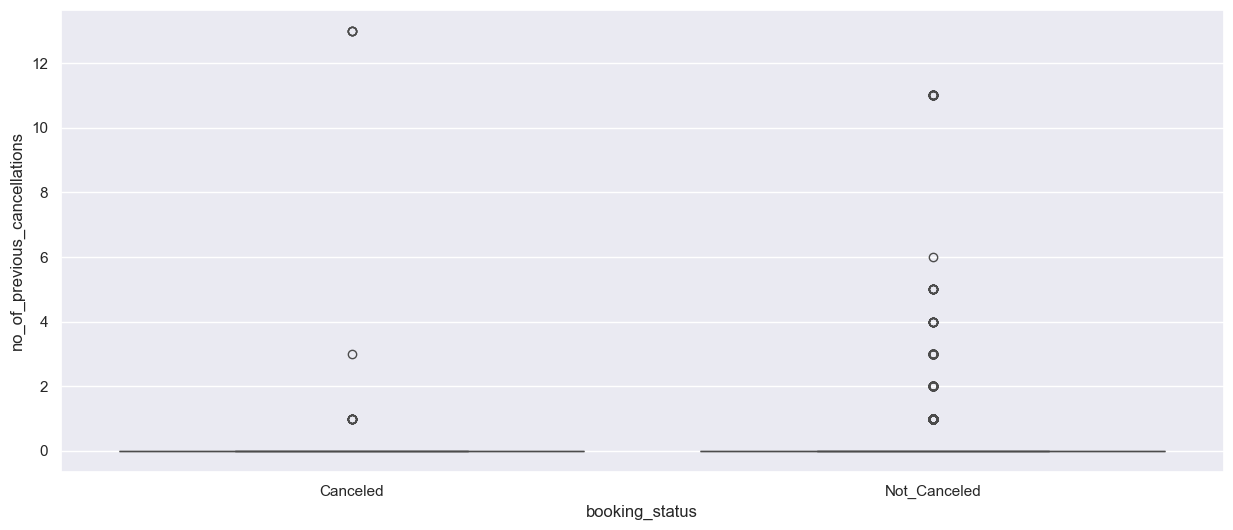

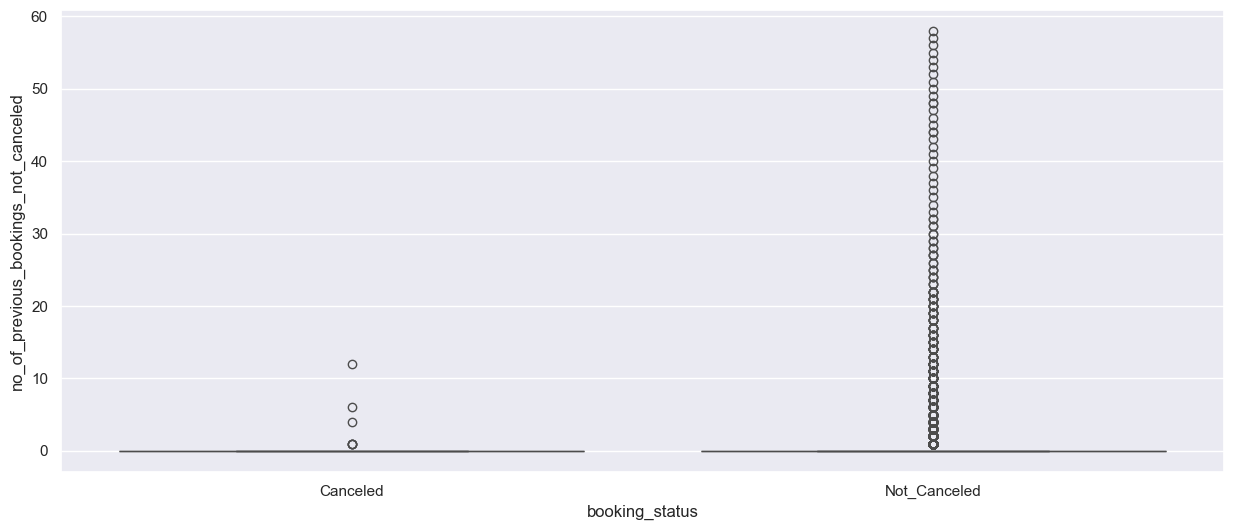

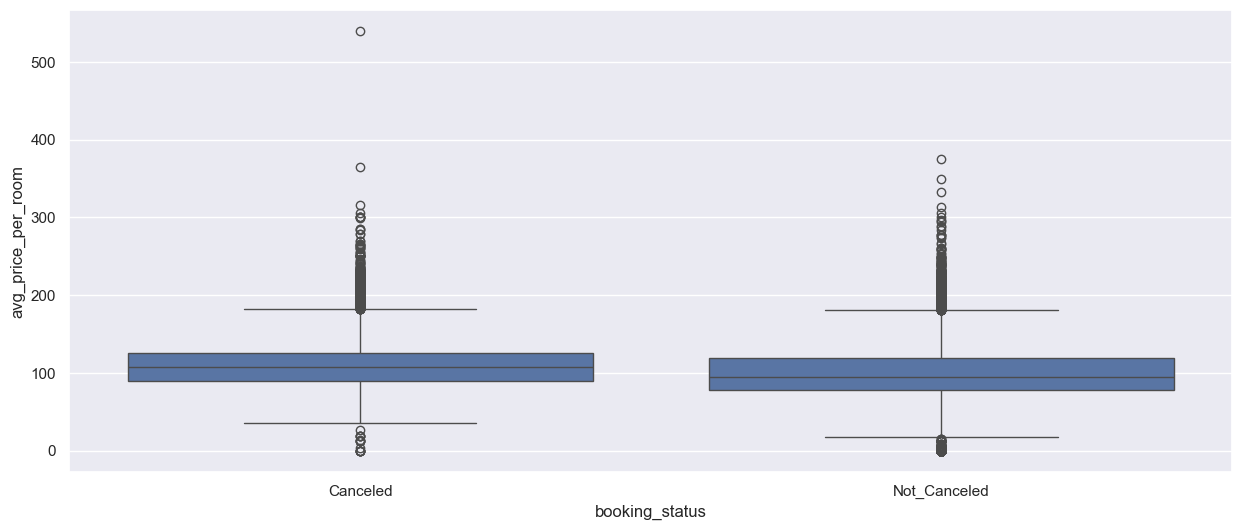

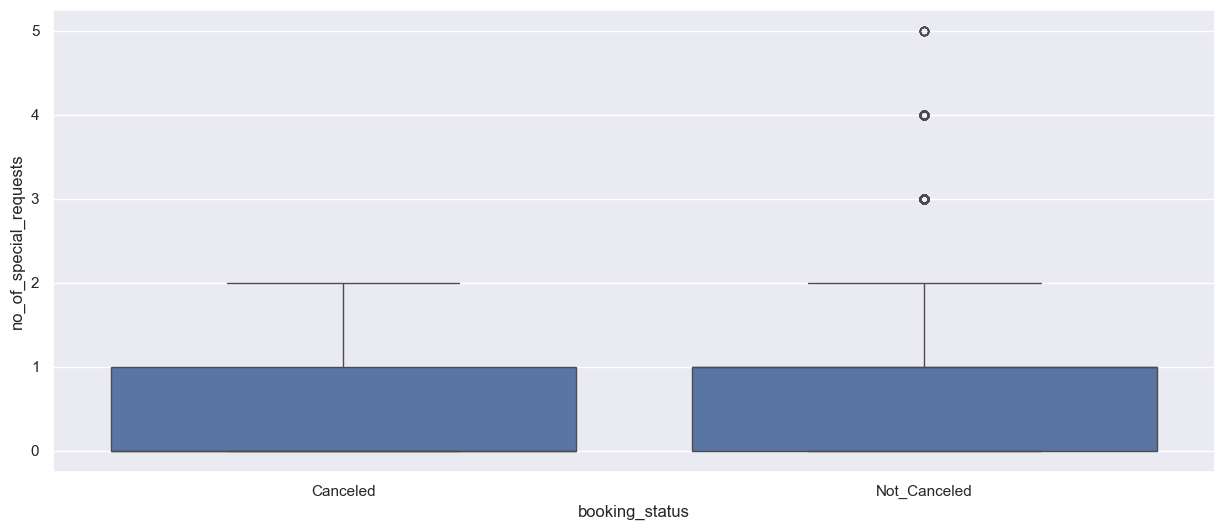

In [100]:
# lets plot with a loo

for a in all_cat_cols:
  for b in all_num_columns:
    cat_cont_bivar(eda_data, a, b)

In [101]:
# define a custom function for the bivariate between two categorical variable
from itertools import combinations

def plot_bivariate_scatterplots(df, label_column):
    """
    Plots bivariate scatterplots for all possible pairs of numerical columns,
    using the binary label column for coloring.
    
    Parameters:
    df (pd.DataFrame): The dataset containing numerical and label columns.
    label_column (str): The column name of the binary label to use for coloring.
    """
    # Extract numerical columns
    numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
    
    # Remove the label column if it is numerical (to avoid plotting it with itself)
    if label_column in numerical_columns:
        numerical_columns.remove(label_column)
    
    # Generate all possible pairs of numerical columns
    column_pairs = combinations(numerical_columns, 2)
    
    # Loop through each pair and plot
    for col1, col2 in column_pairs:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=col1, y=col2, hue=label_column, palette="coolwarm", alpha=0.7)
        
        plt.title(f'Scatterplot of {col1} vs {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.legend(title=label_column)
        
        # Show plot
        plt.show()

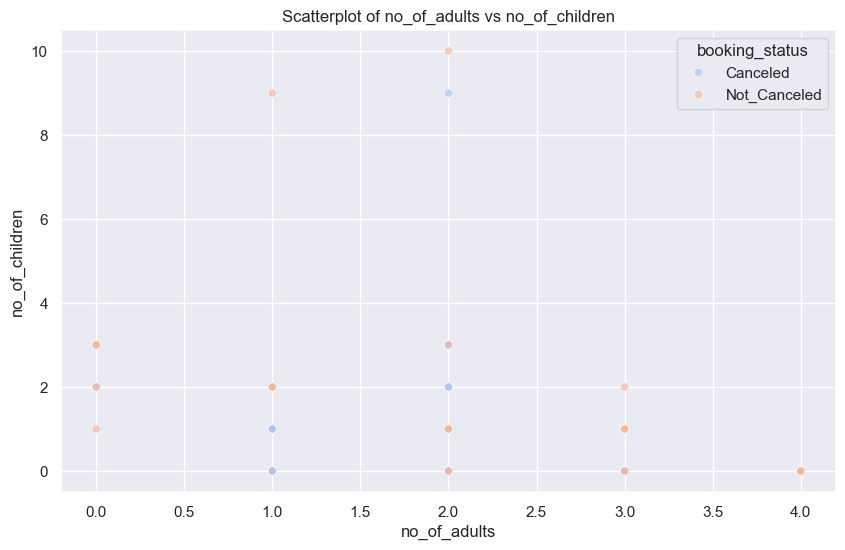

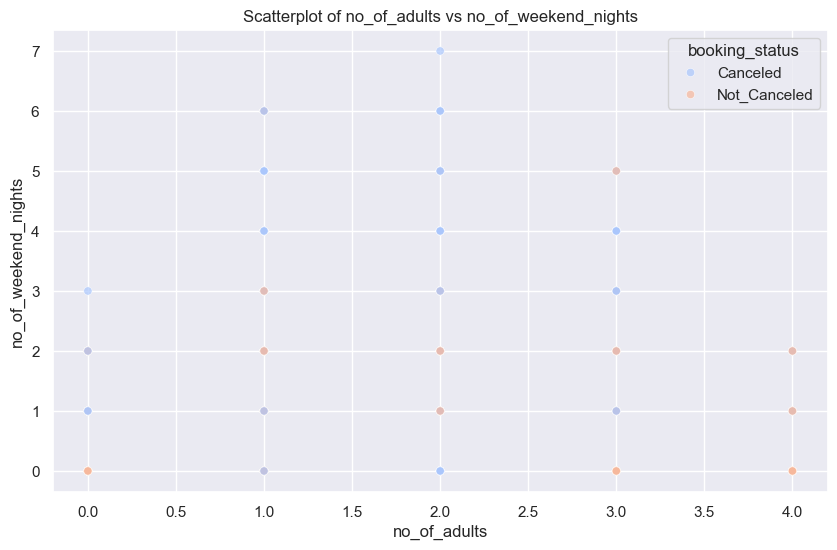

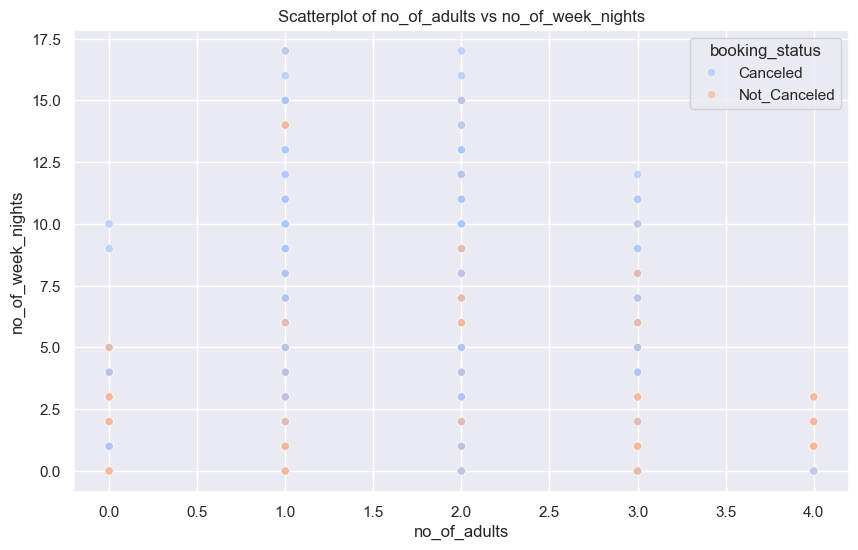

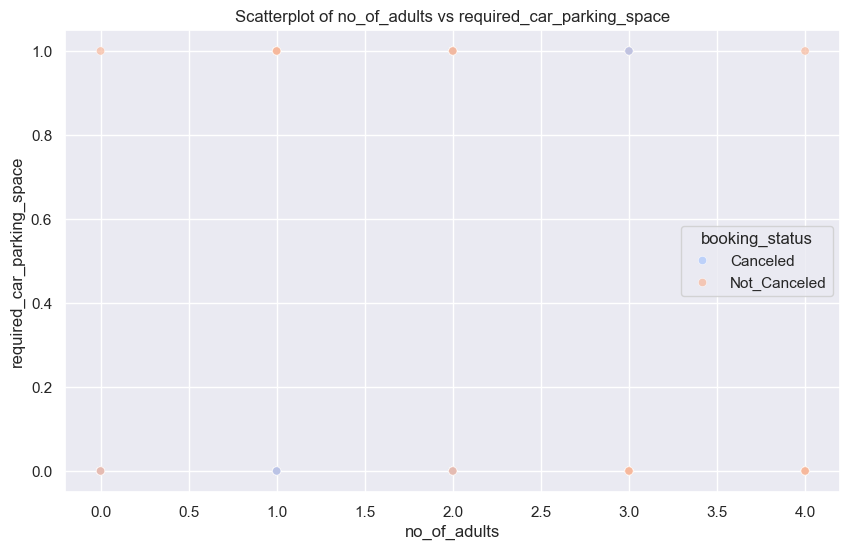

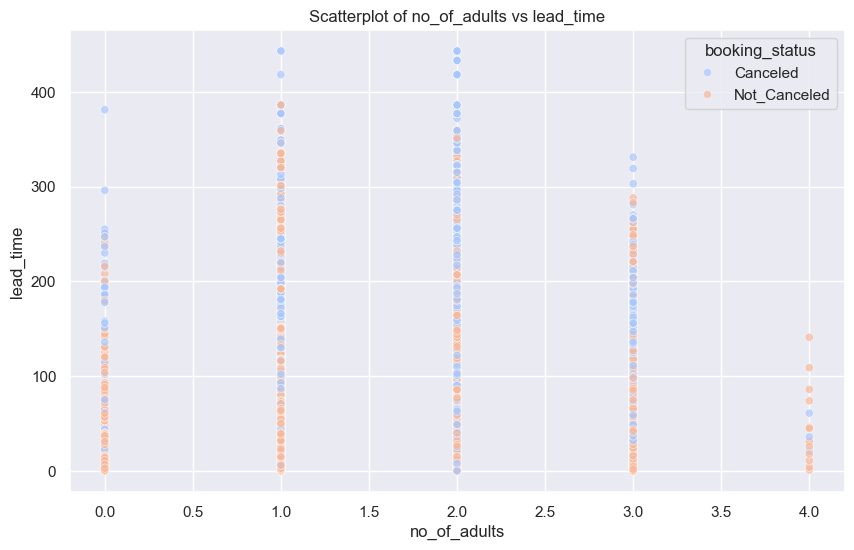

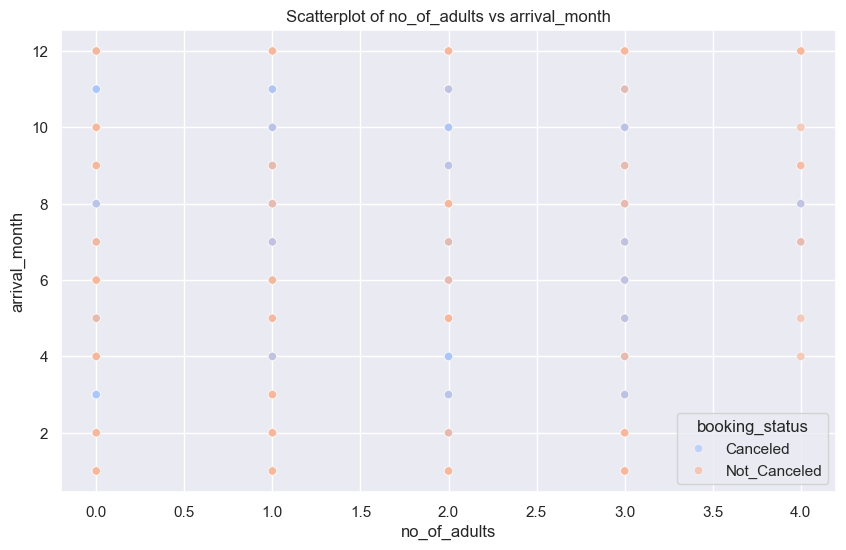

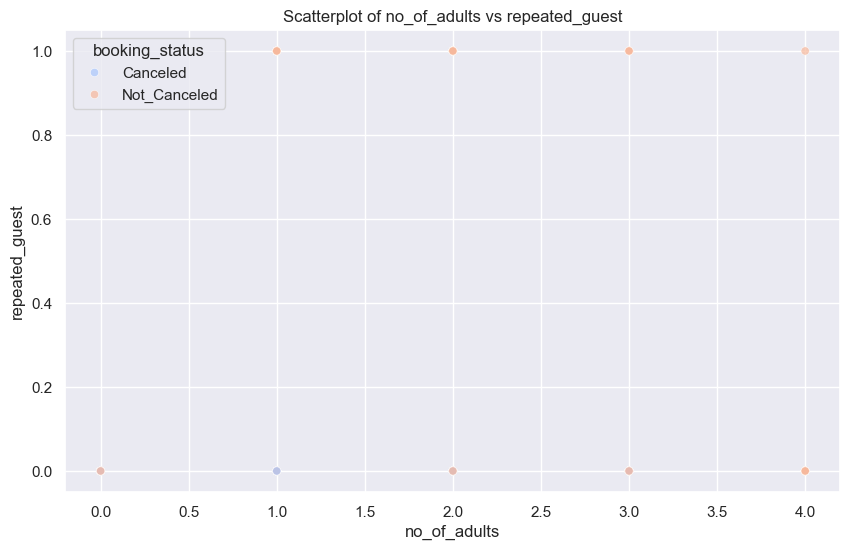

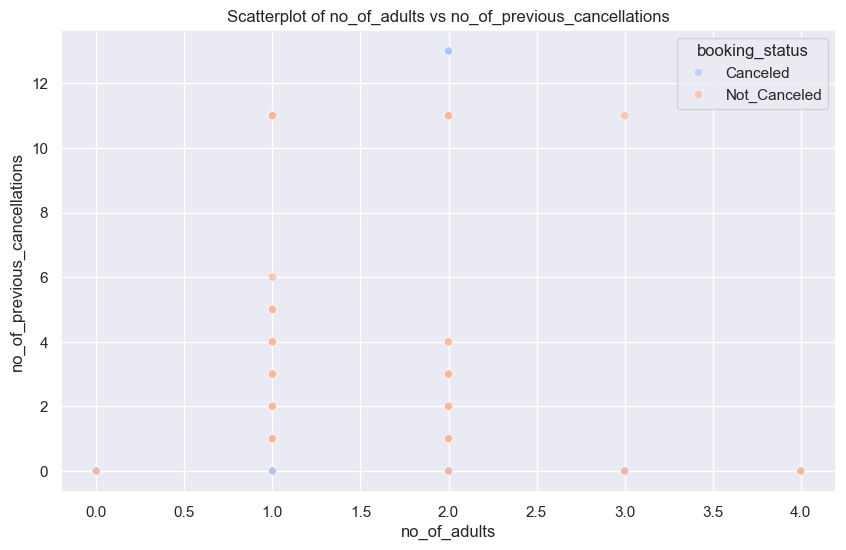

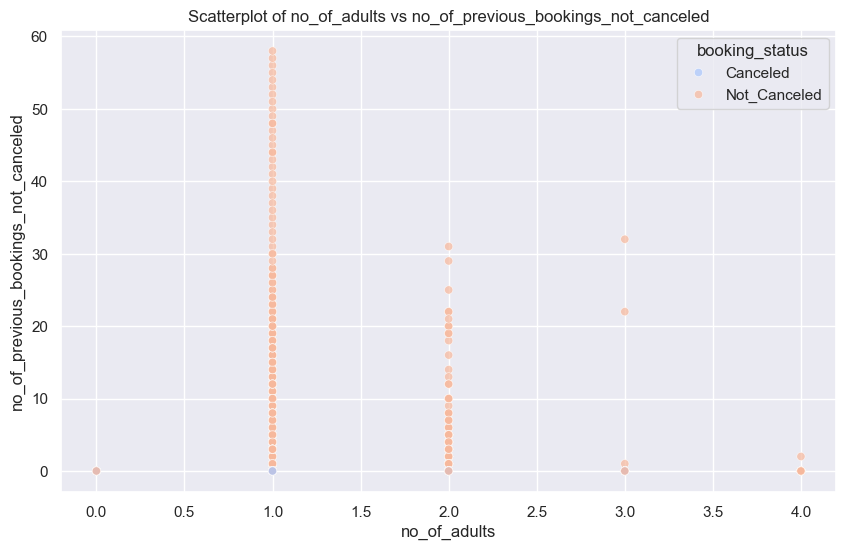

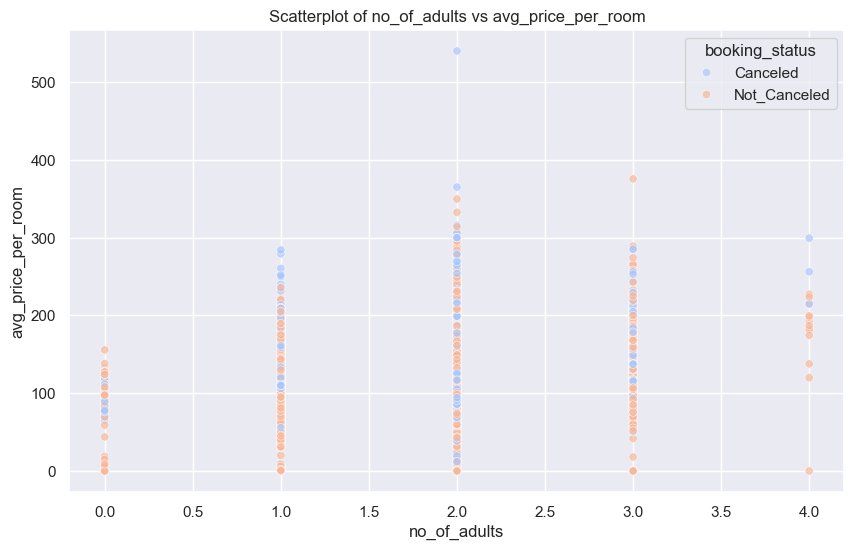

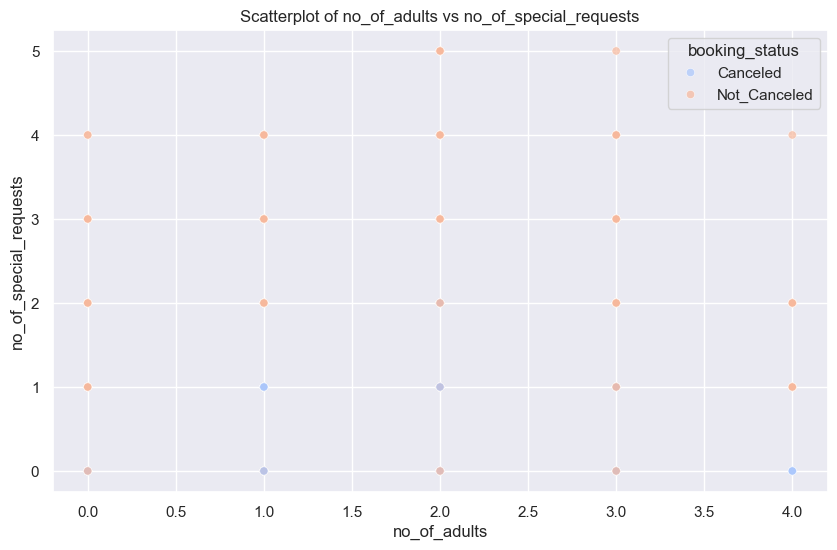

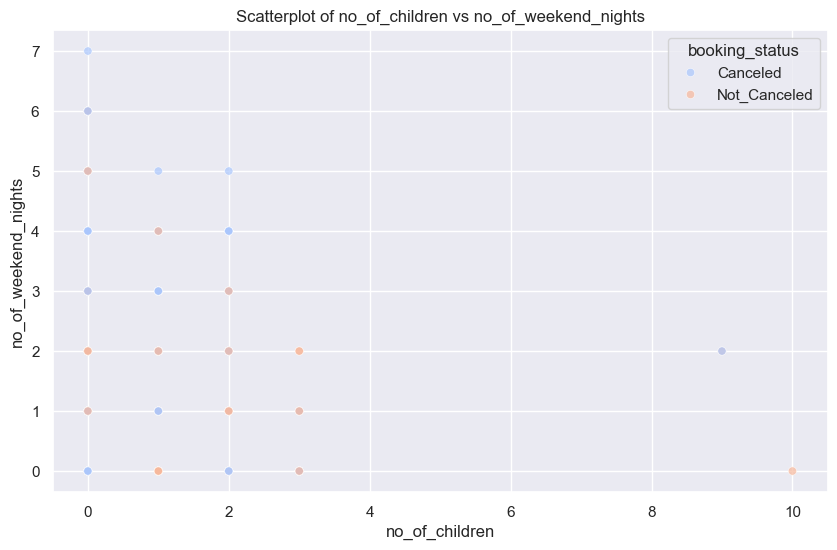

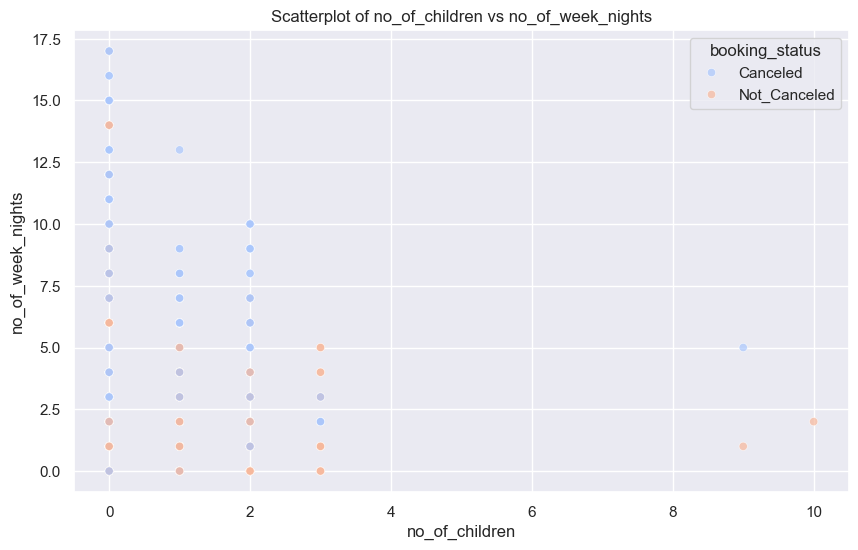

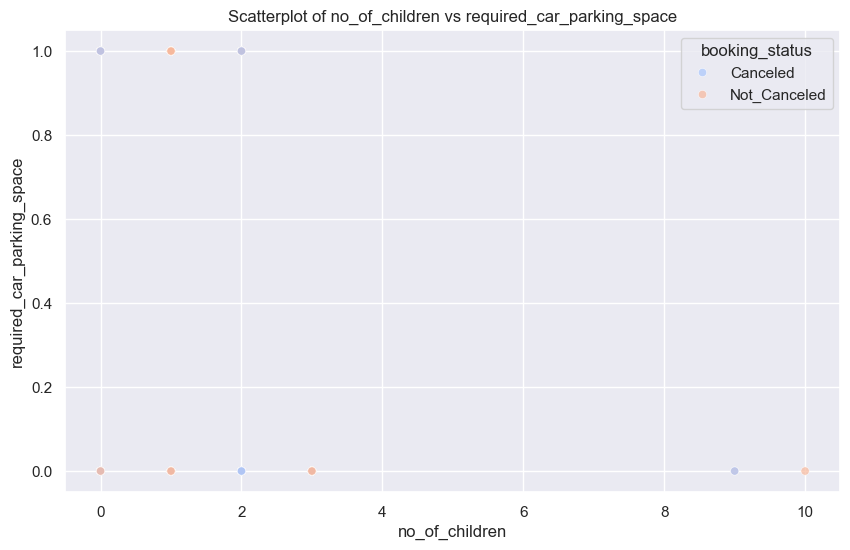

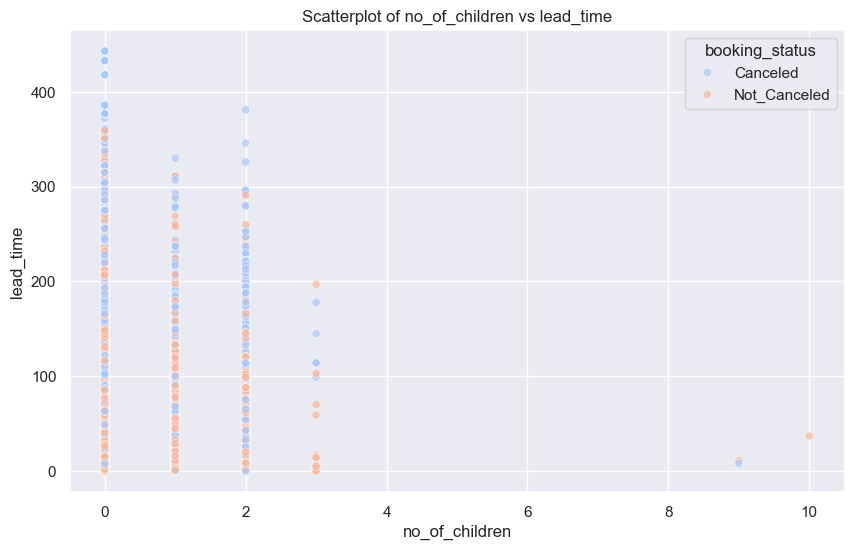

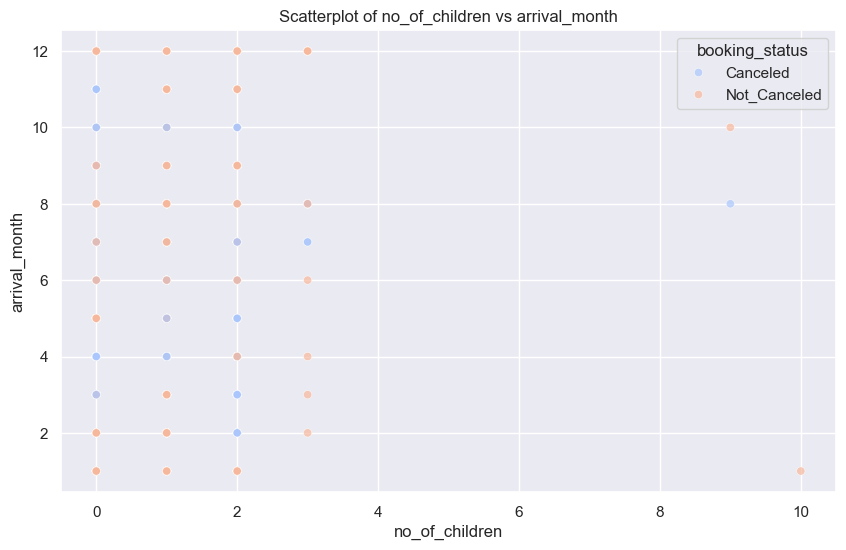

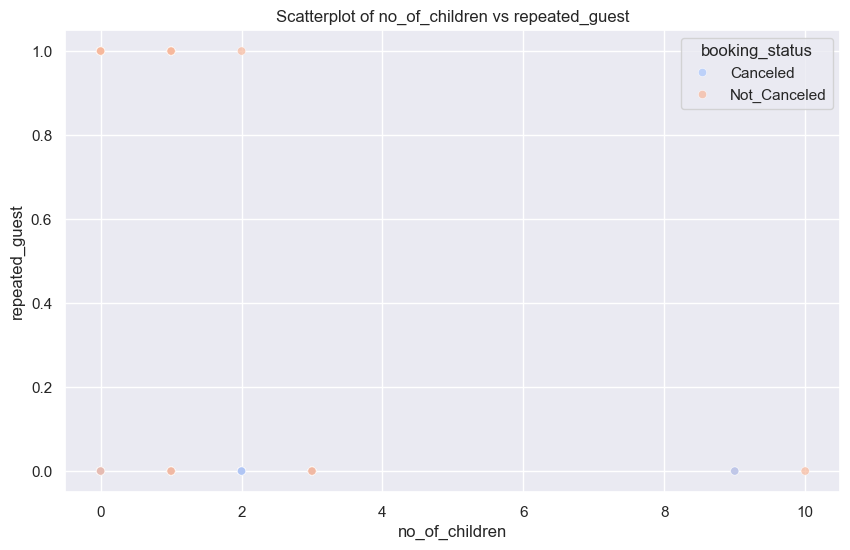

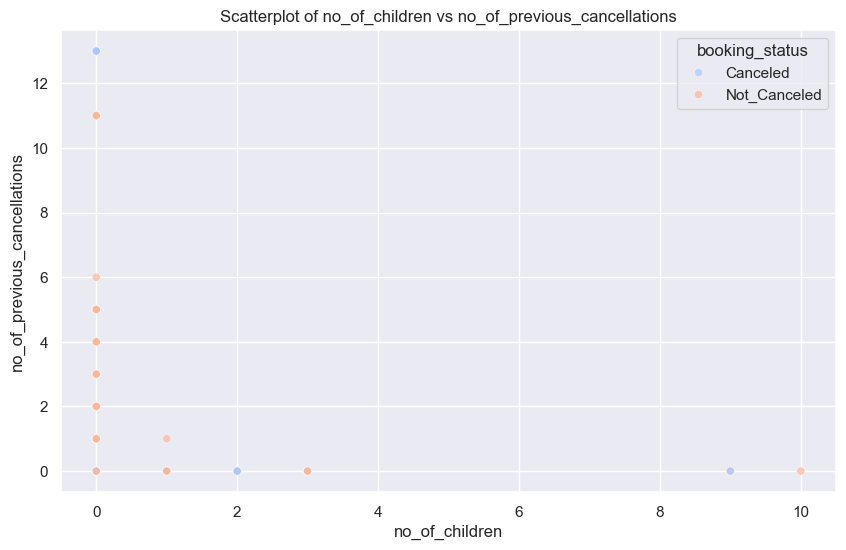

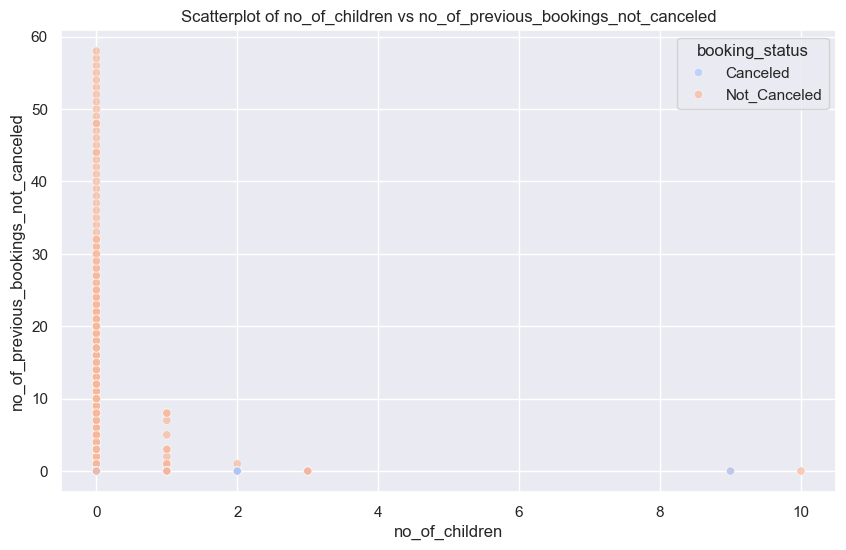

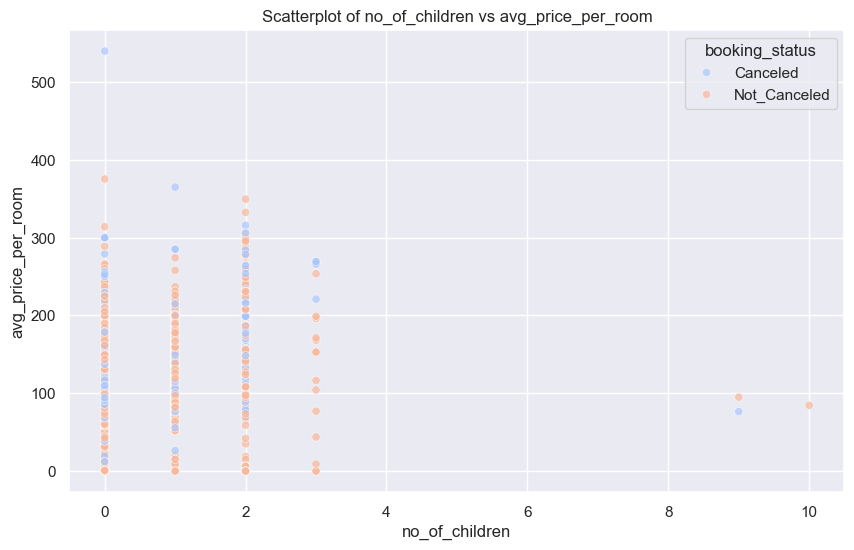

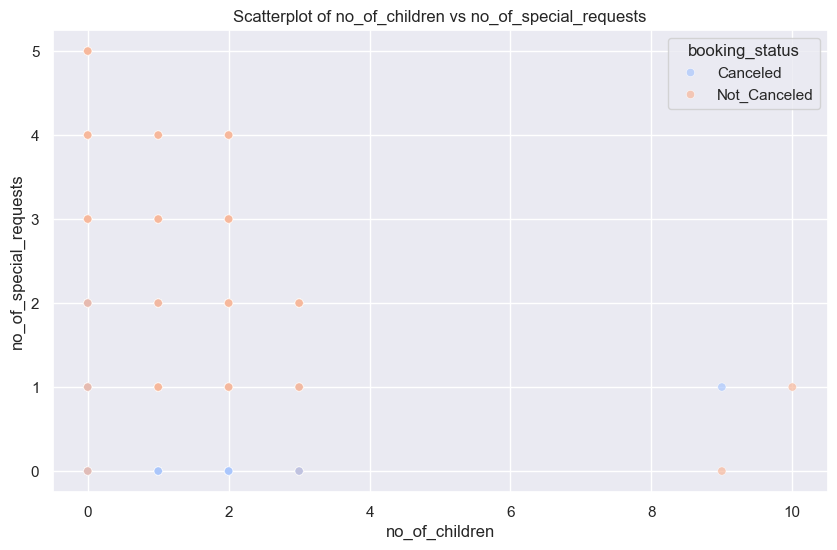

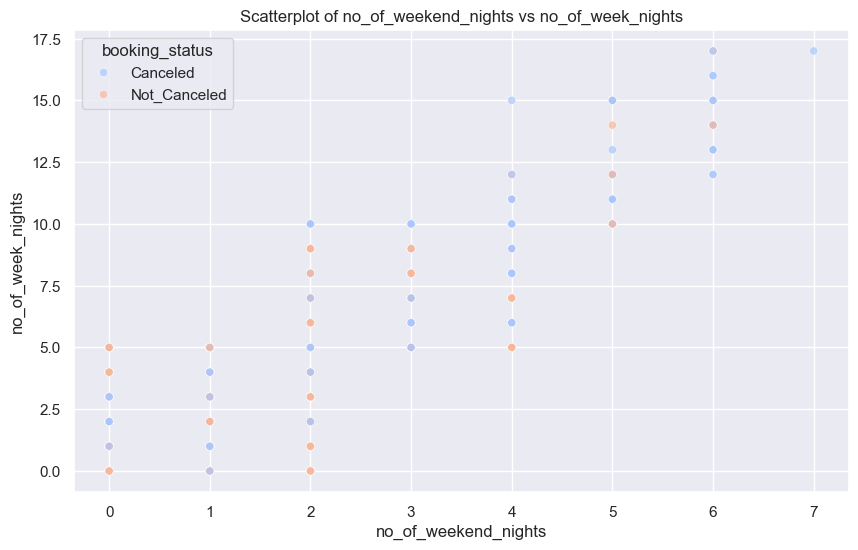

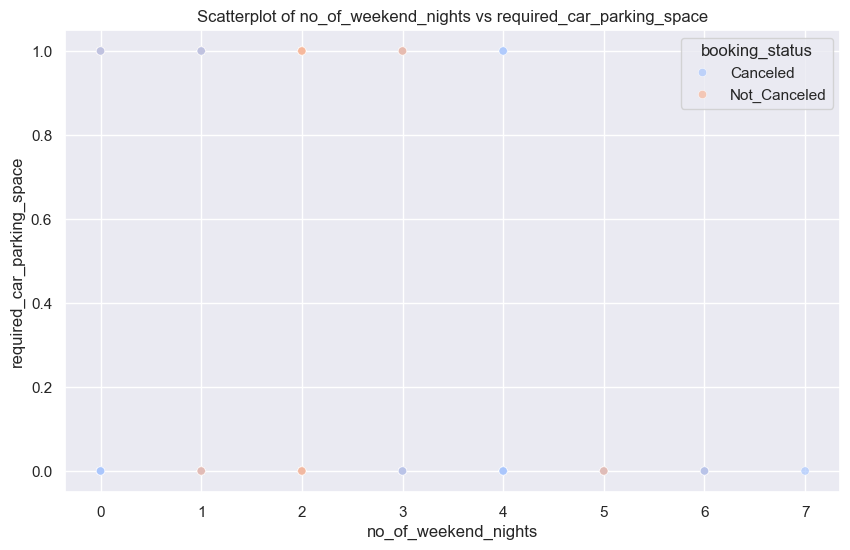

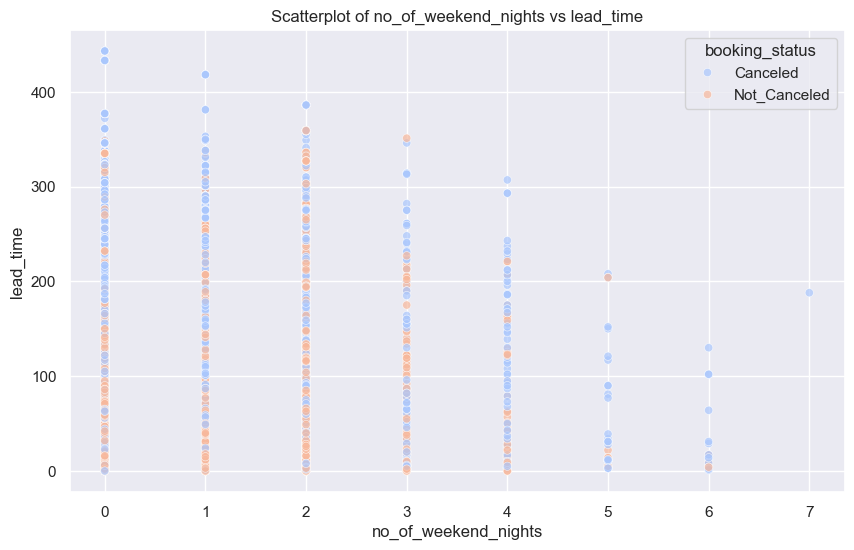

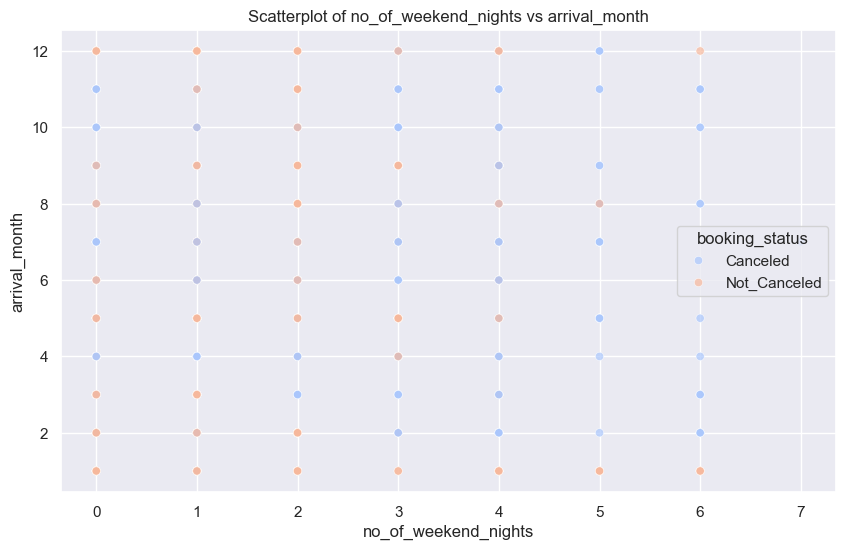

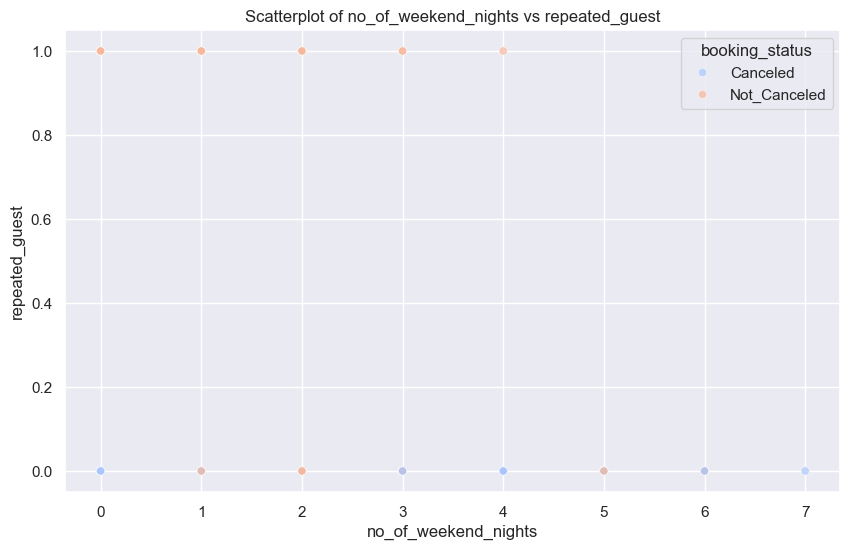

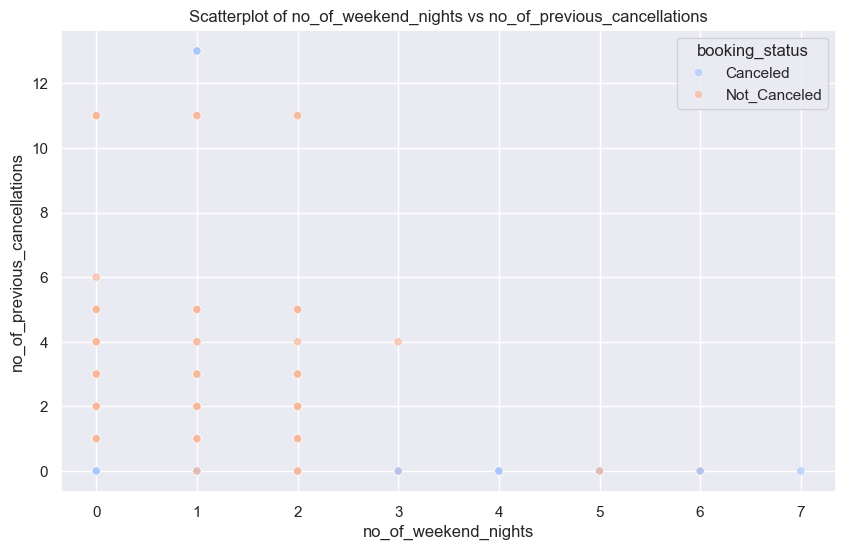

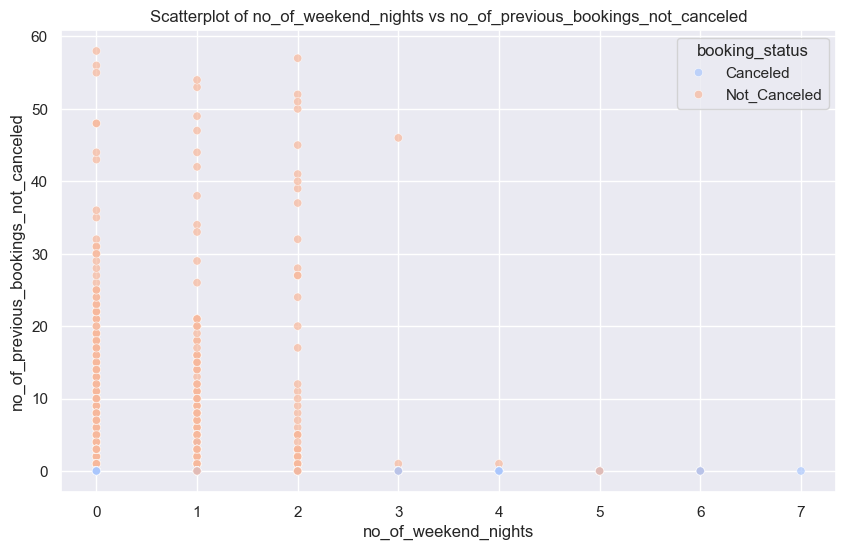

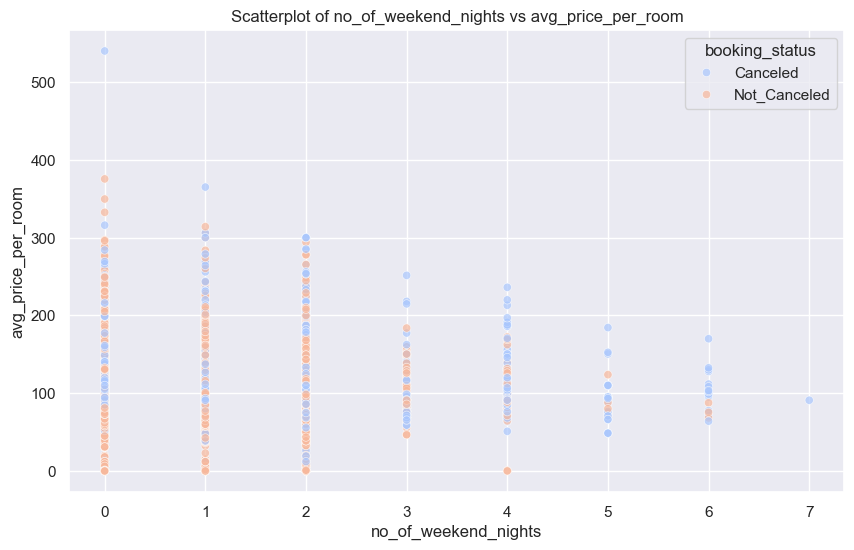

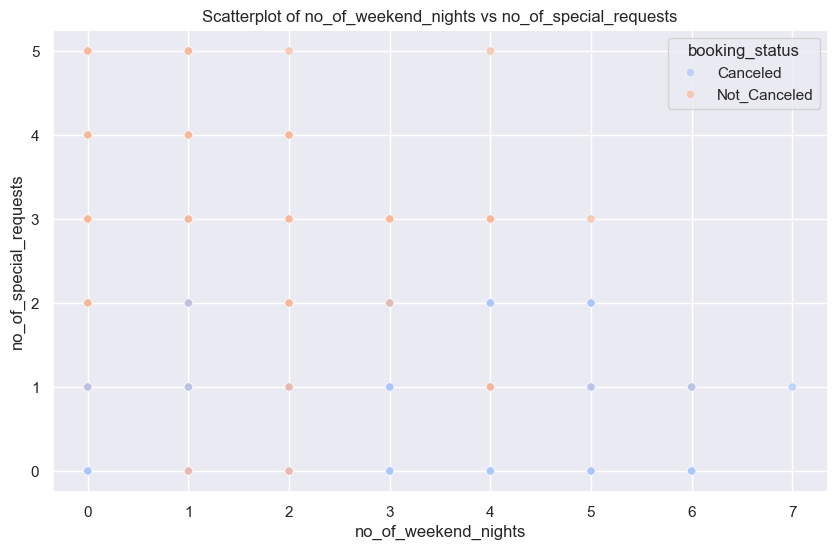

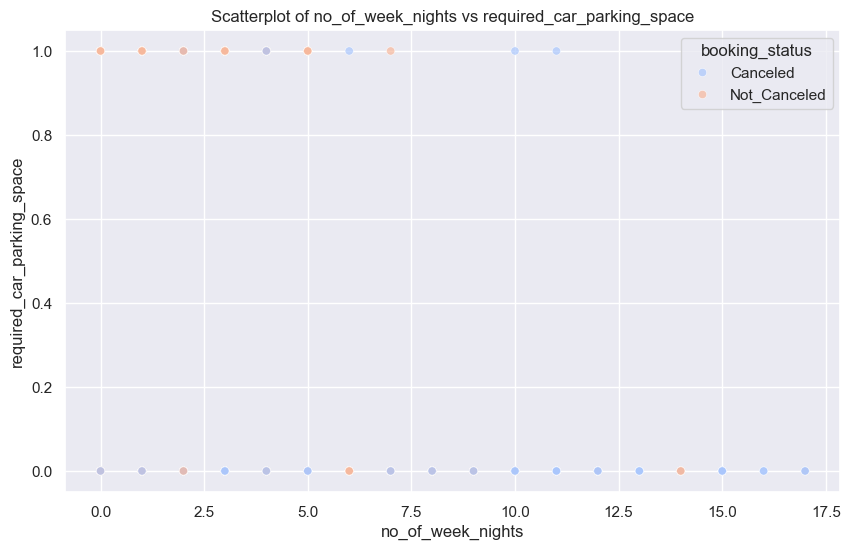

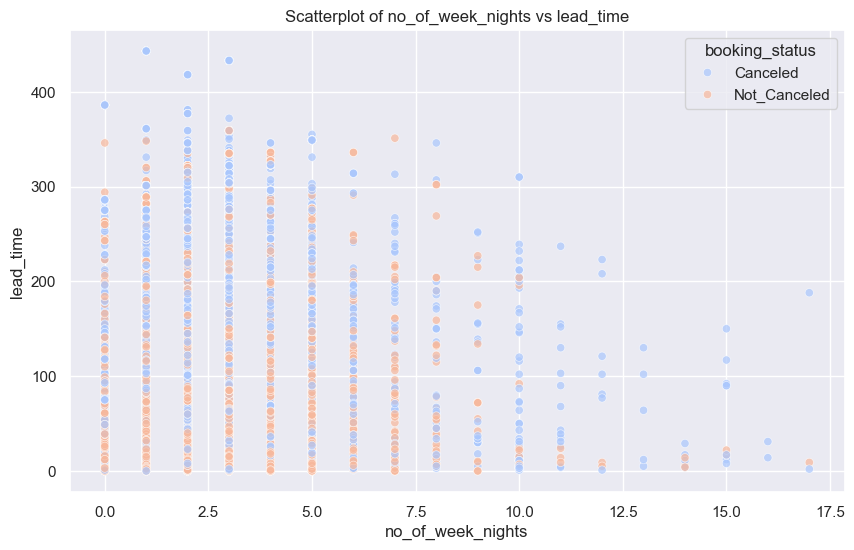

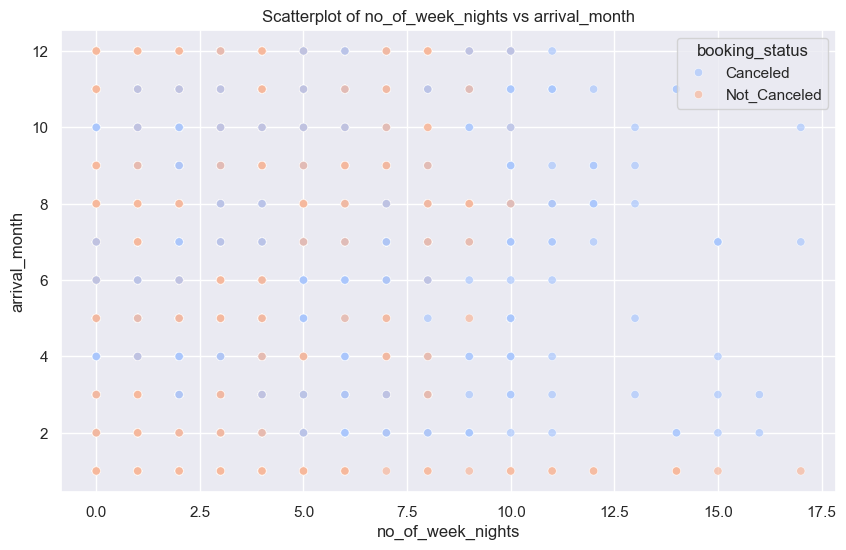

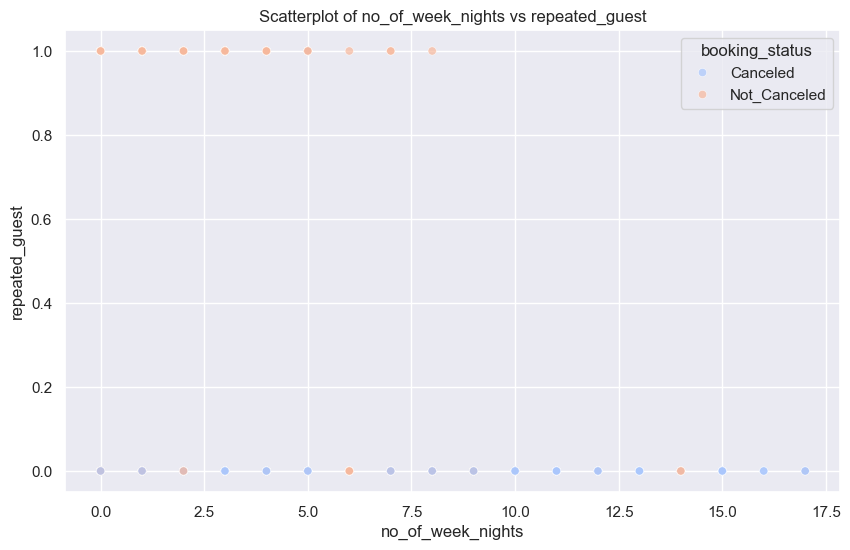

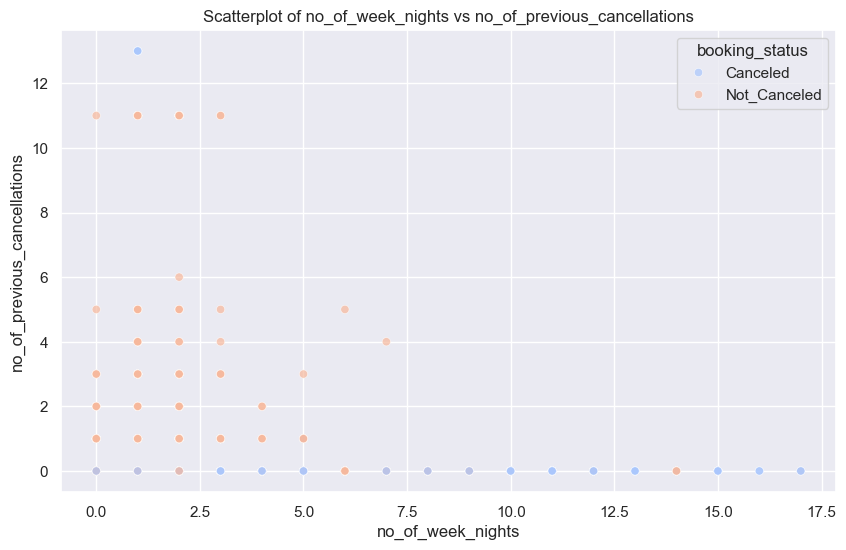

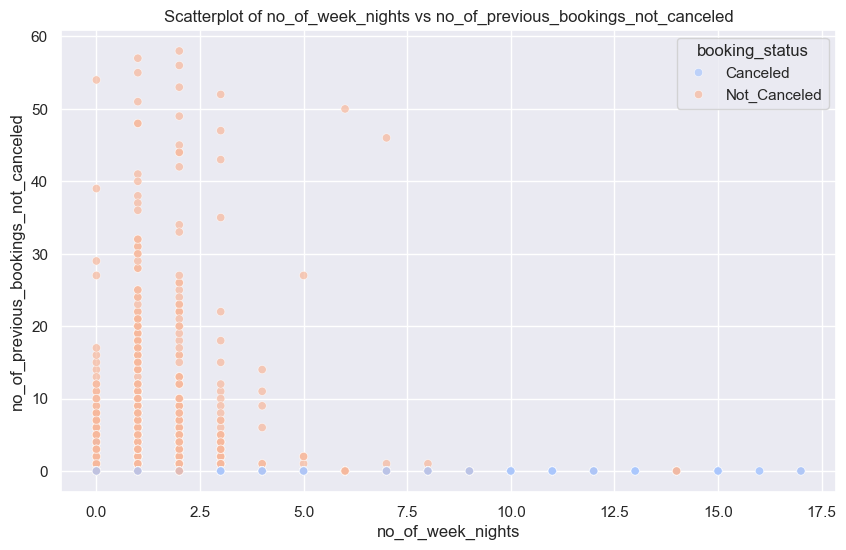

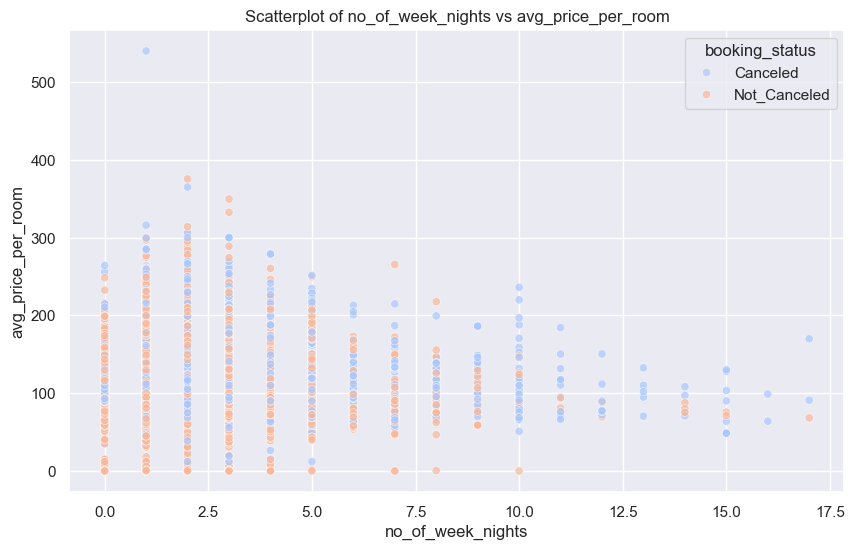

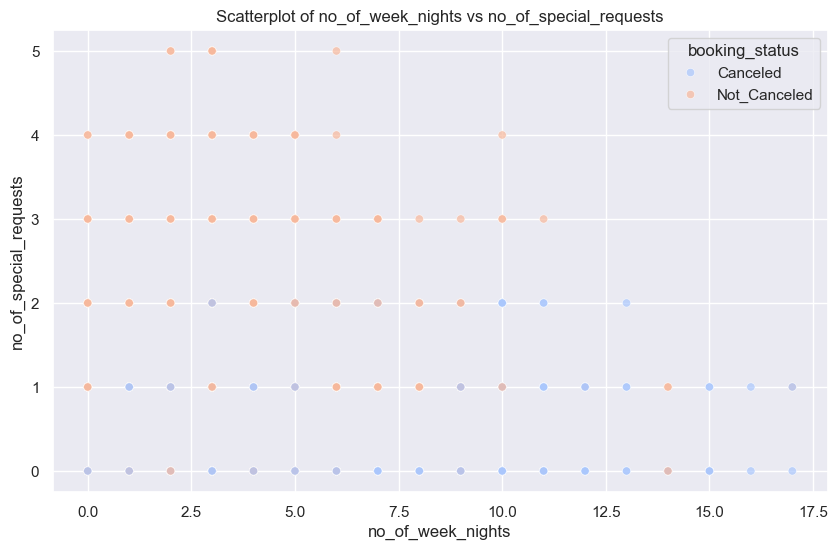

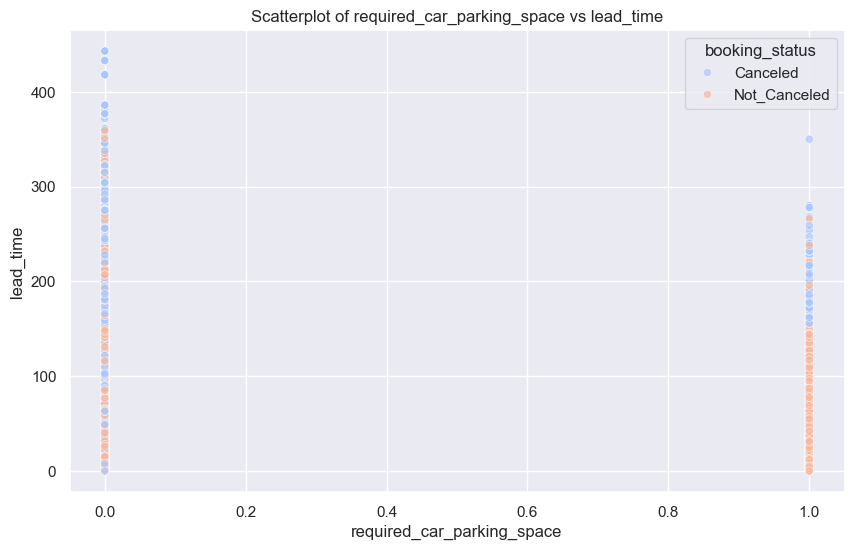

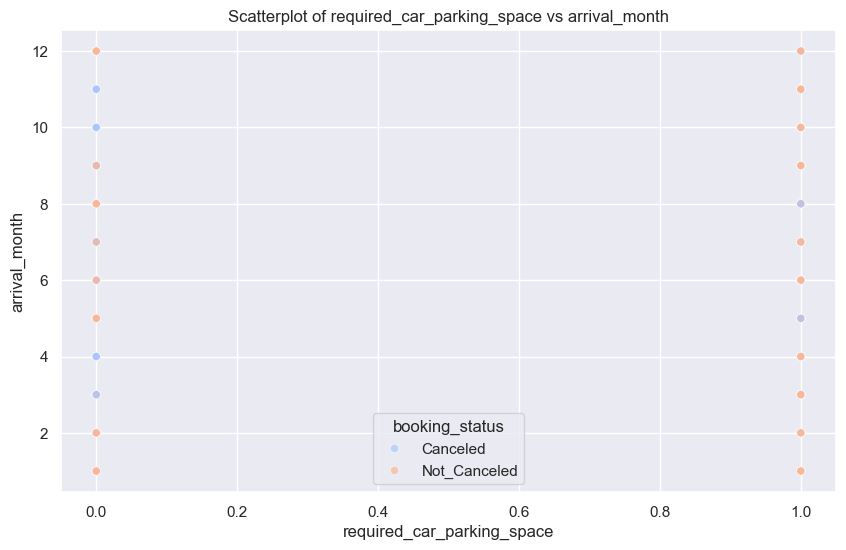

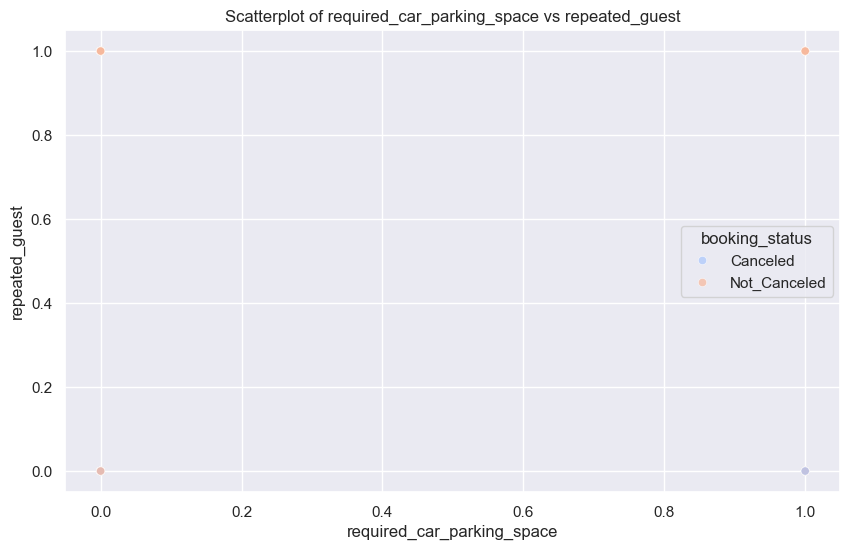

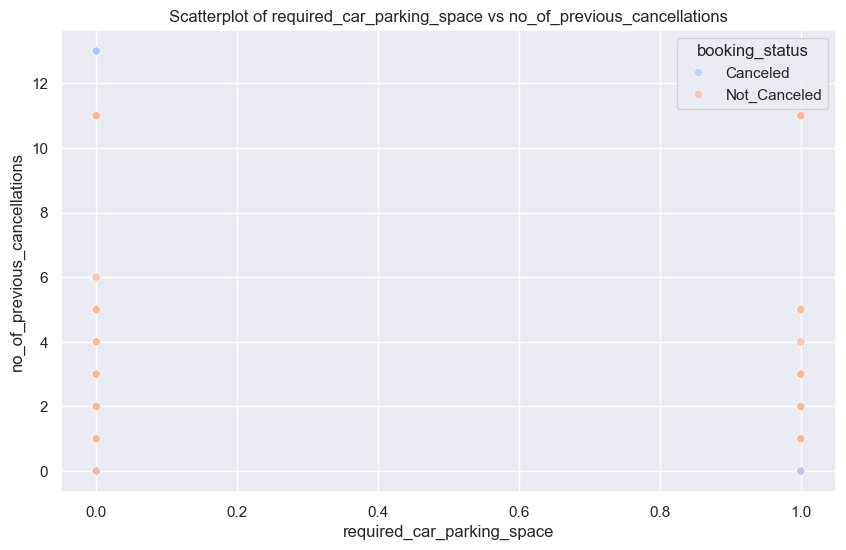

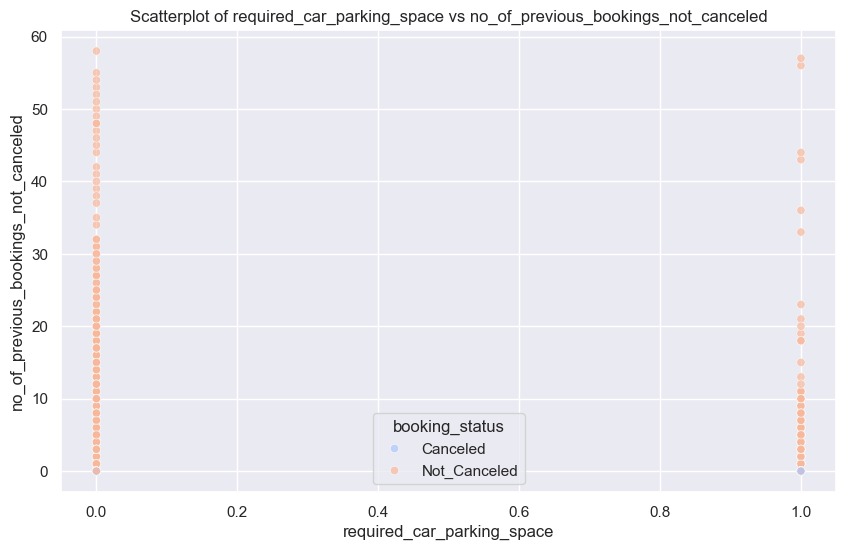

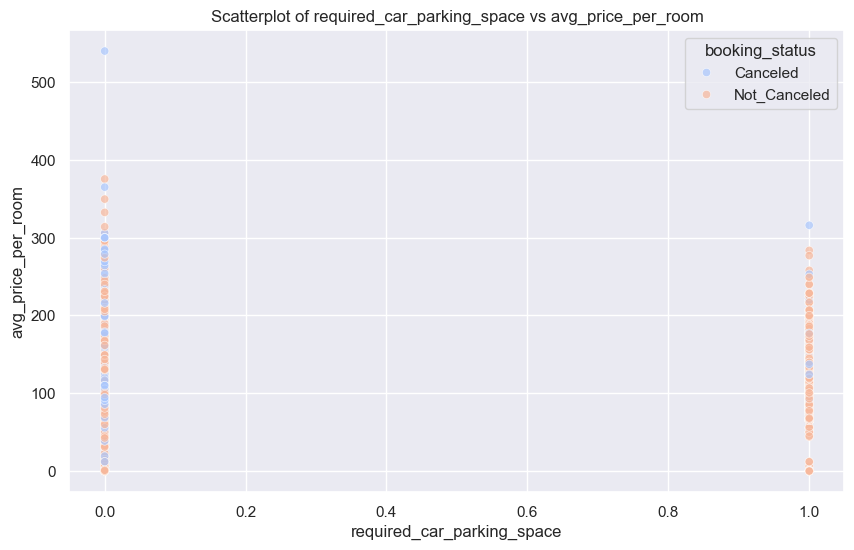

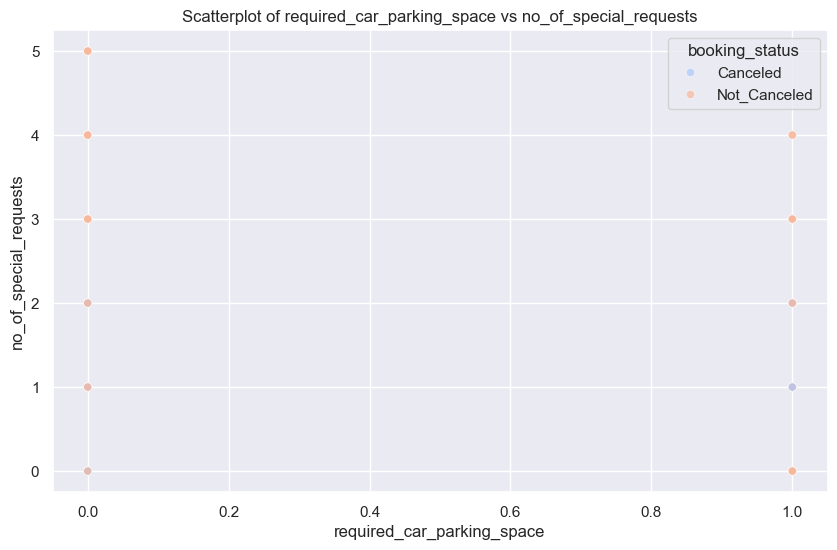

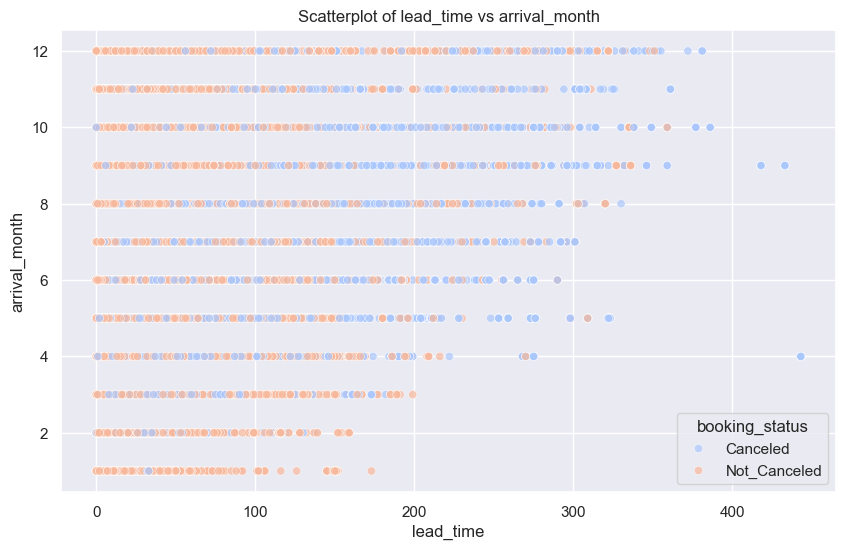

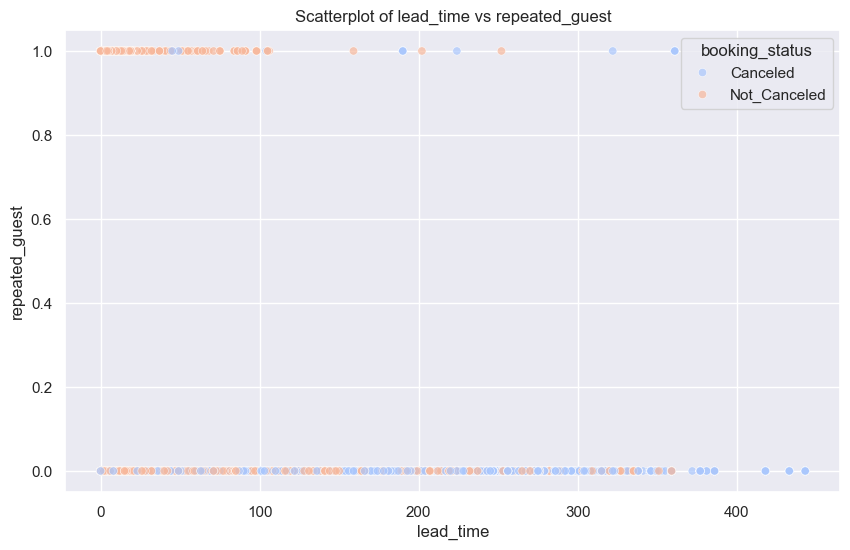

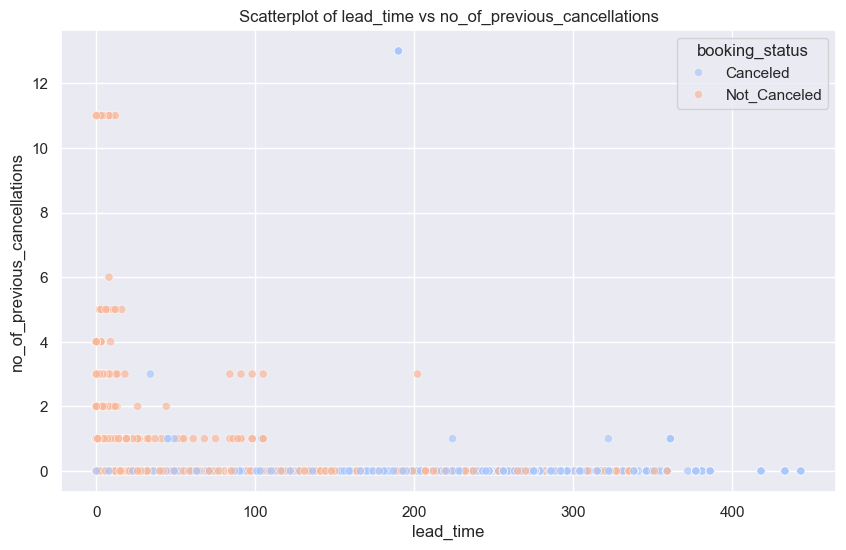

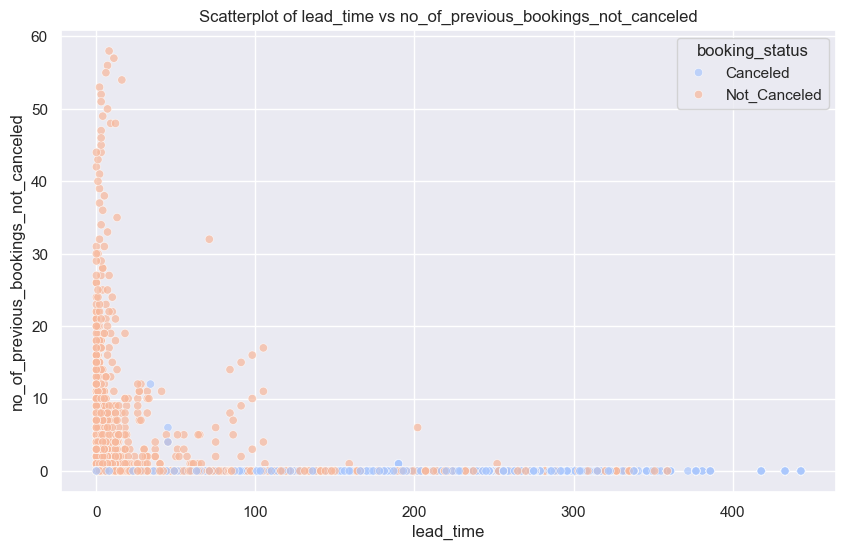

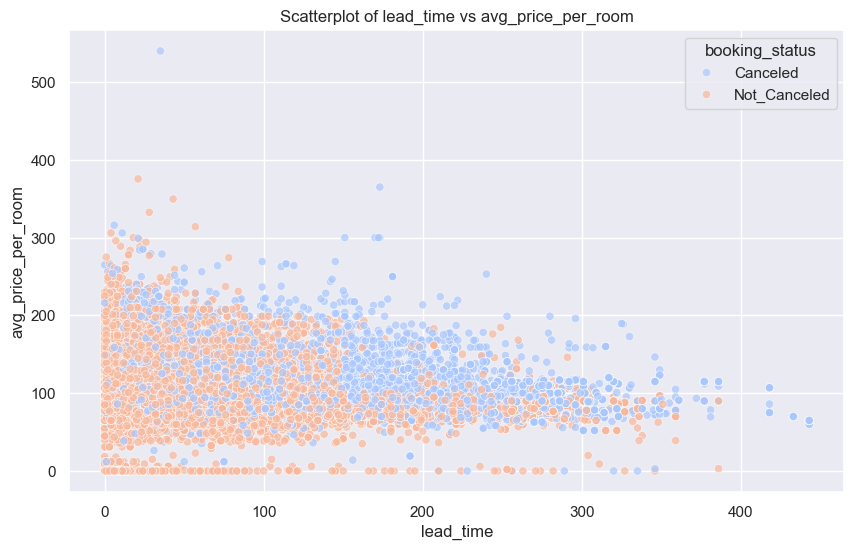

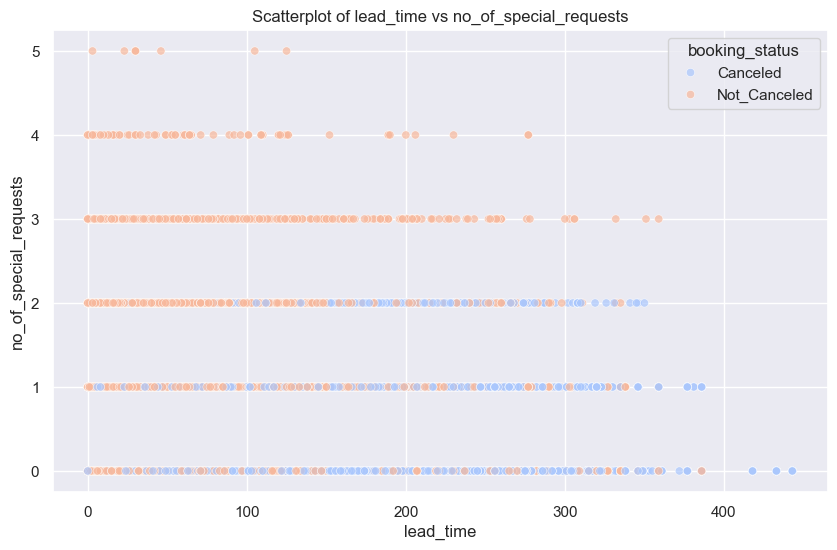

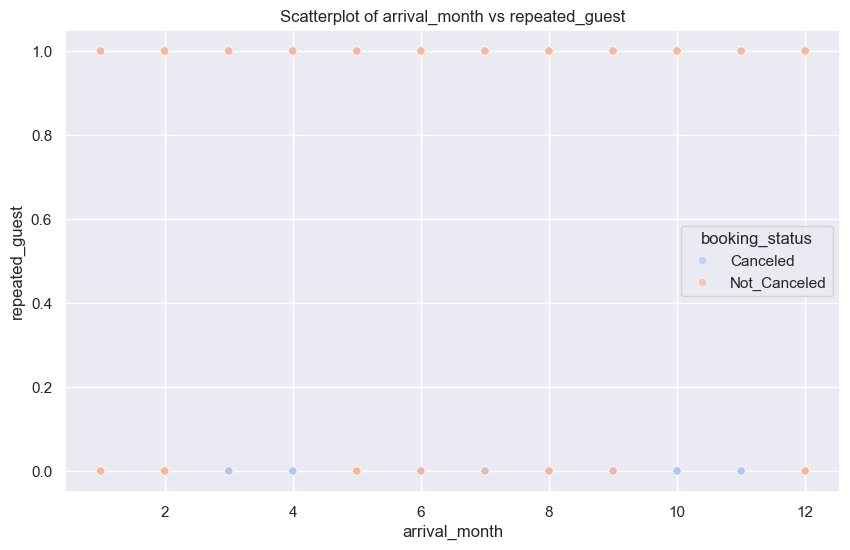

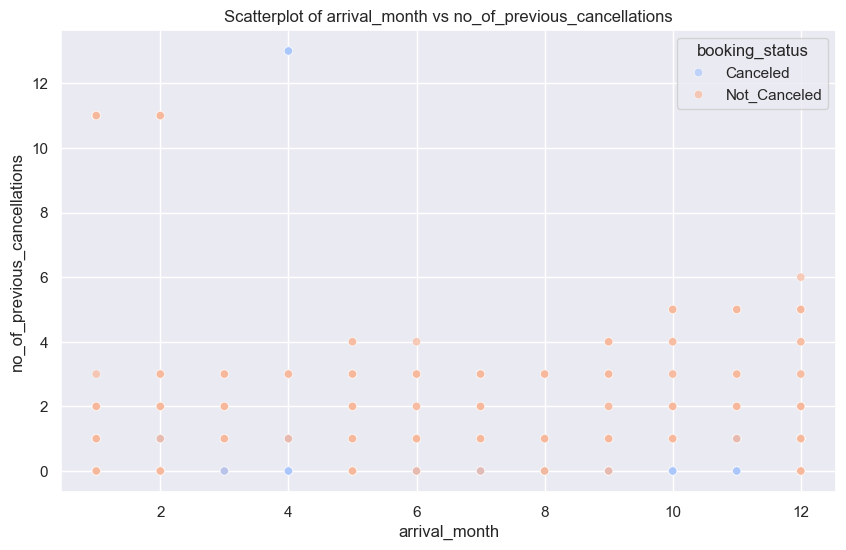

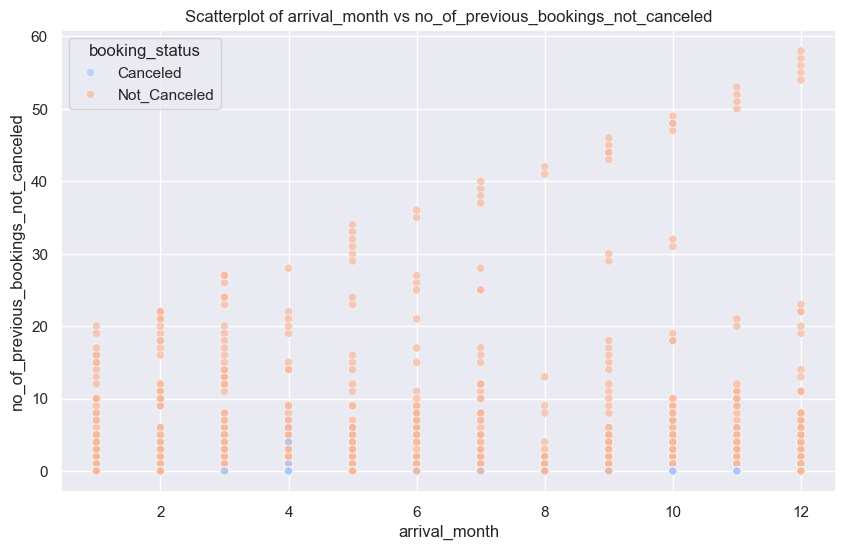

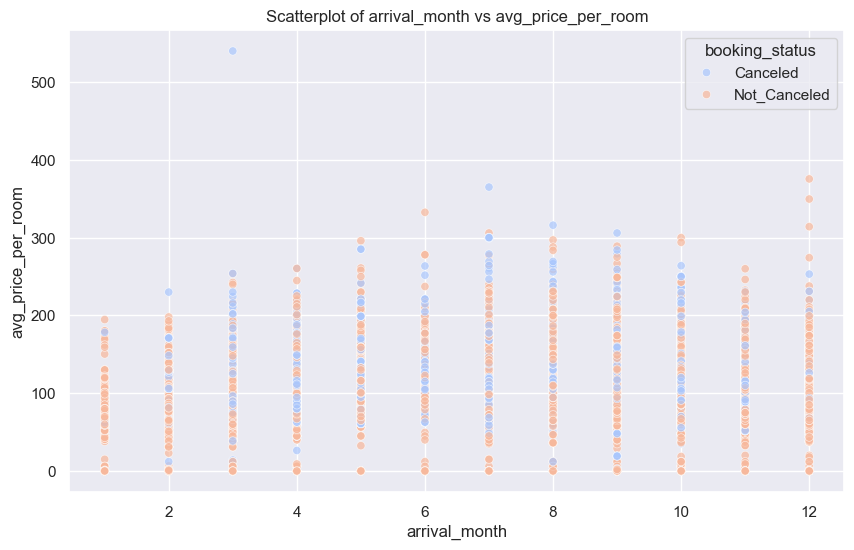

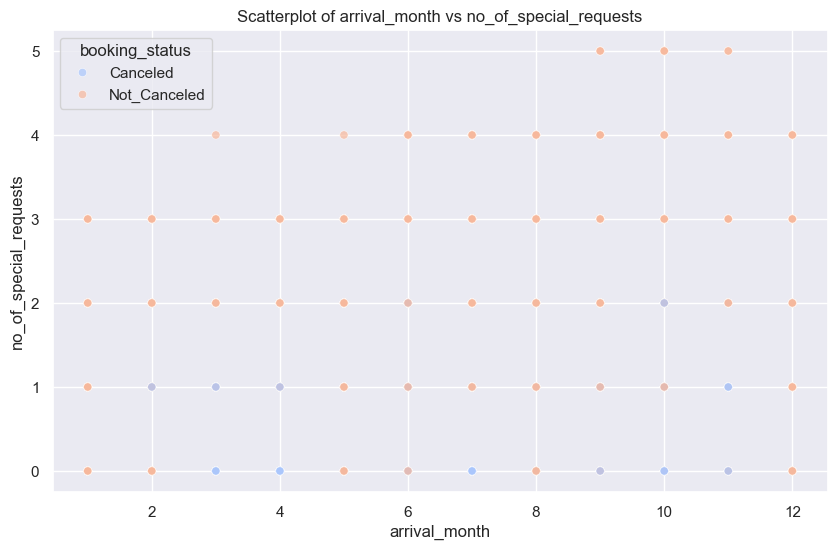

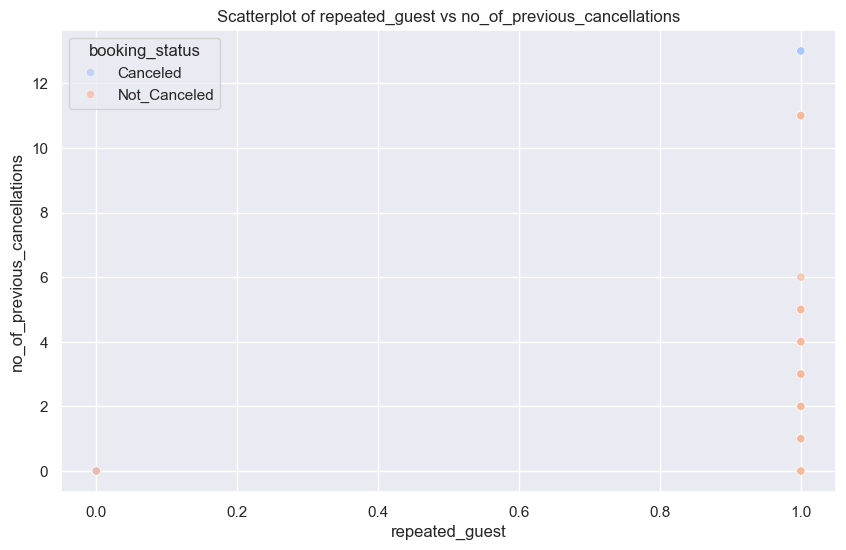

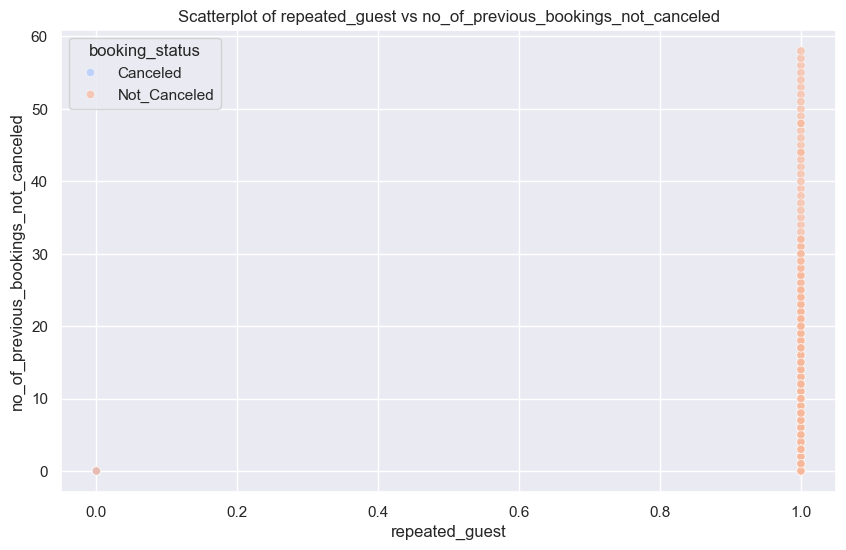

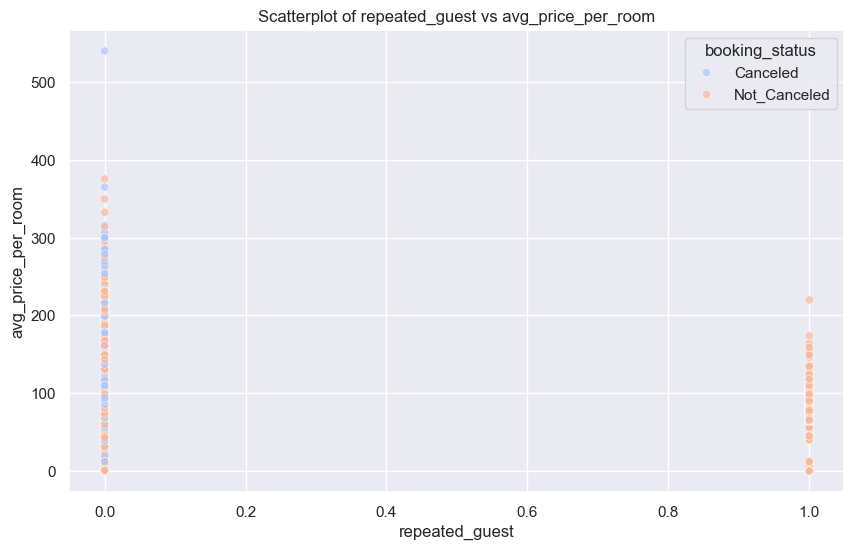

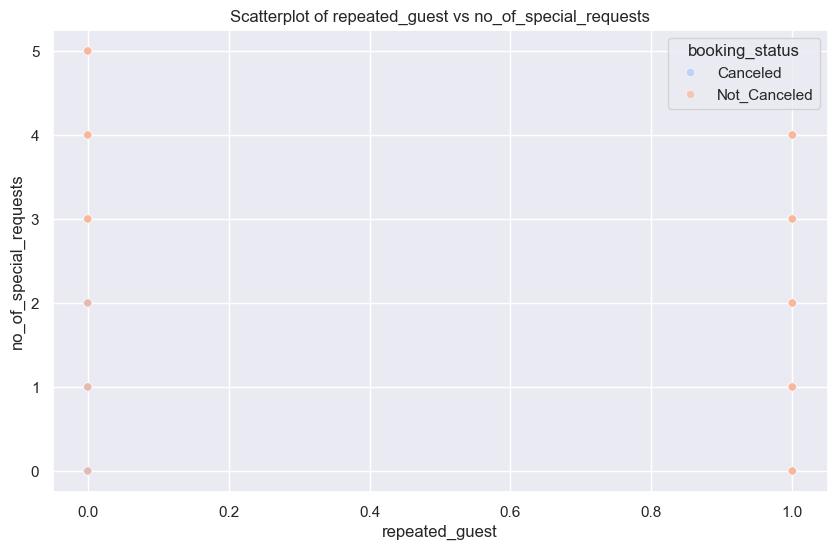

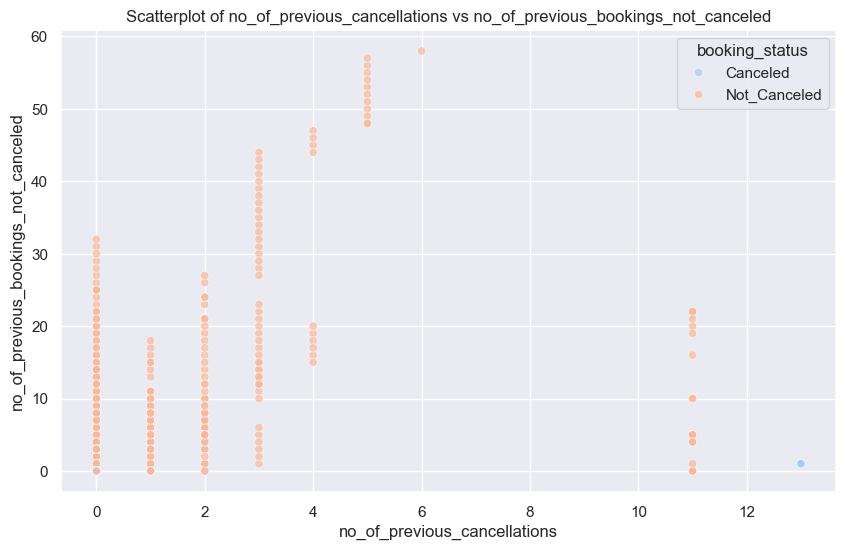

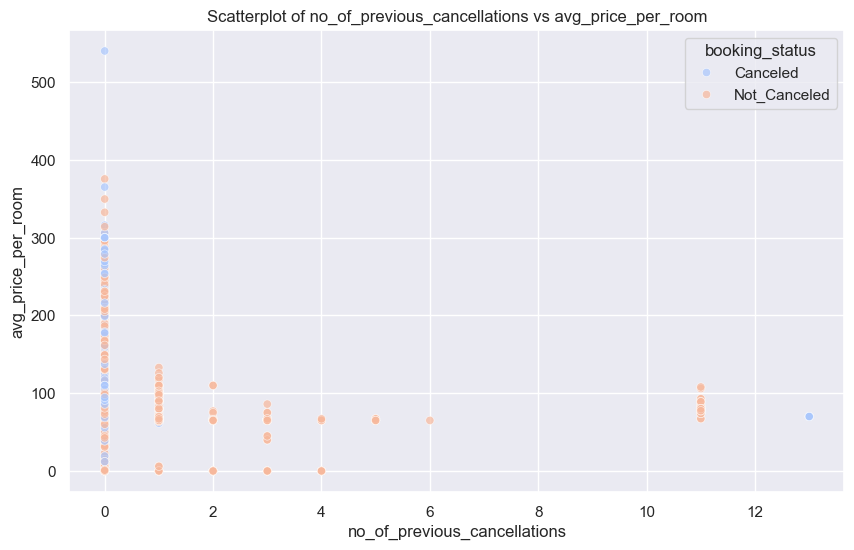

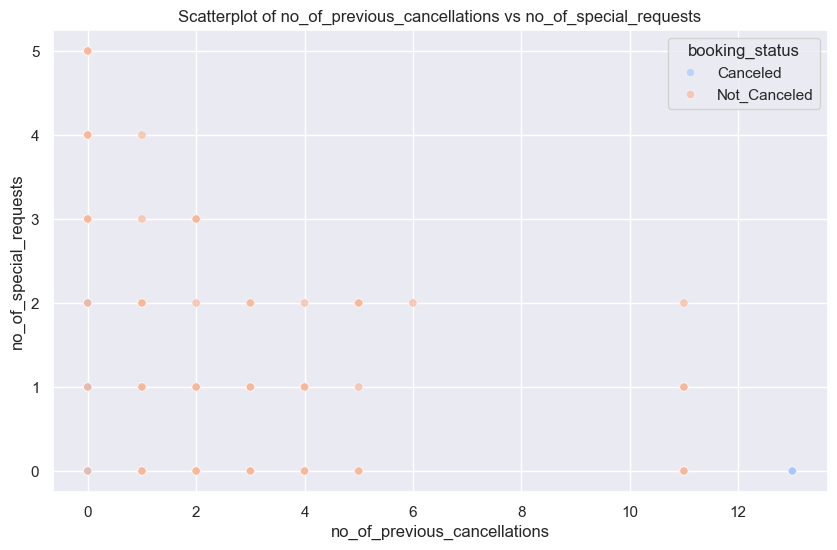

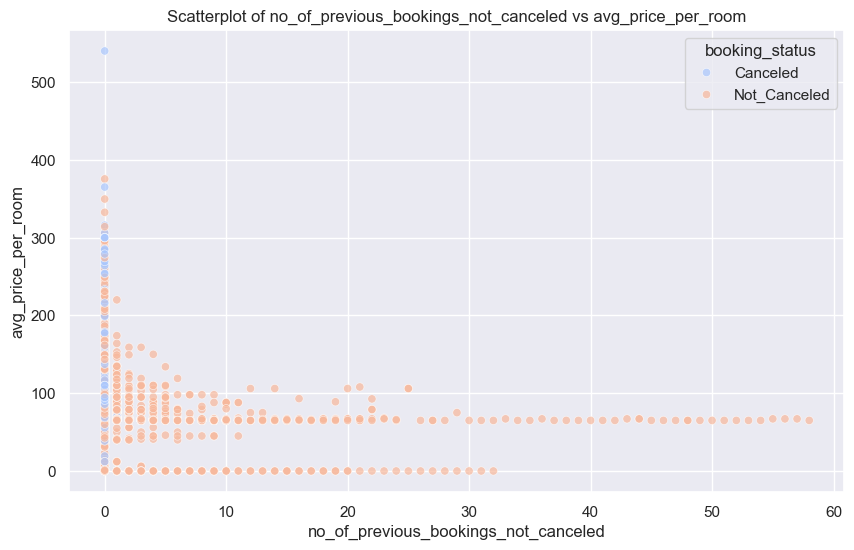

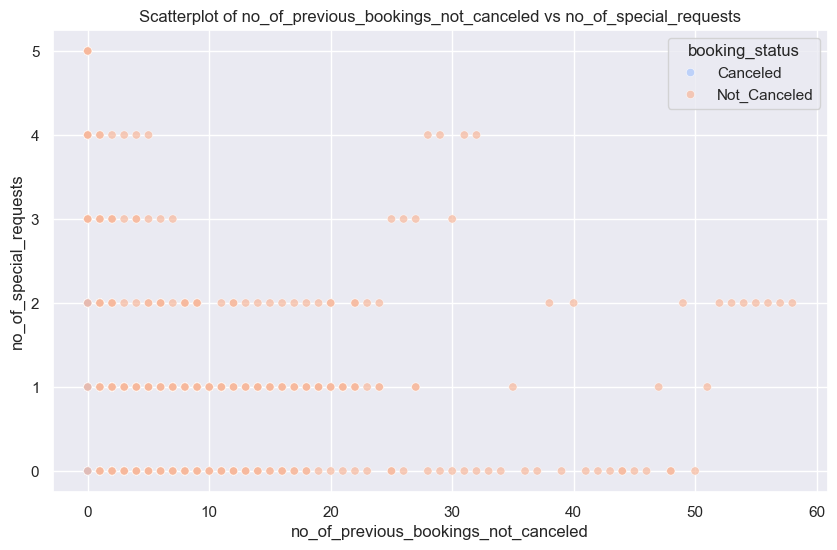

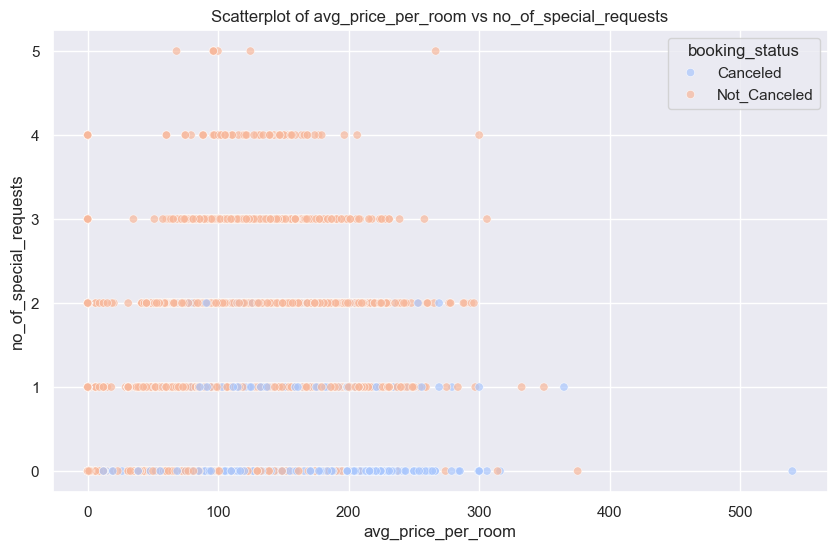

In [102]:
# let plot the bivariate of categorical
plot_bivariate_scatterplots(eda_data, 'booking_status')

In [103]:
# define a custom function for the bivariate between two categorical variable

# def cat_bivar(df, index, columns):
#   pivot_df = df[[index,columns]].reset_index()
#   p_table = pivot_df.pivot_table(index=index, columns=columns, aggfunc='count' )
#   p_table.plot.bar(stacked= True)

def cat_bivar(df, index, columns):
    # Create a pivot table with counts
    pivot_df = df[[index, columns]].reset_index()
    p_table = pivot_df.pivot_table(index=index, columns=columns, aggfunc='size', fill_value=0)
    
    # Calculate row-wise sums for normalization
    row_sums = p_table.sum(axis=1)
    
    # Calculate percentages
    p_table_percent = p_table.div(row_sums, axis=0) * 100
    
    # Plot the data
    ax = p_table_percent.plot(kind='bar', stacked=True, figsize=(10, 7))
    
    # Add percentage labels on the bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='center')
    
    # Add labels and title
    plt.ylabel('Percentage')
    plt.title(f'Stacked Bar Plot of {columns} by {index} with Percentages')
    plt.xticks(rotation=45)
    plt.show()

In [104]:
# create a list of categorical columns

cat_cols = (all_cat_cols
            .drop("booking_status", axis=1) # drop "books_status" since it's the reference
            .columns)

cat_cols 

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], dtype='object')

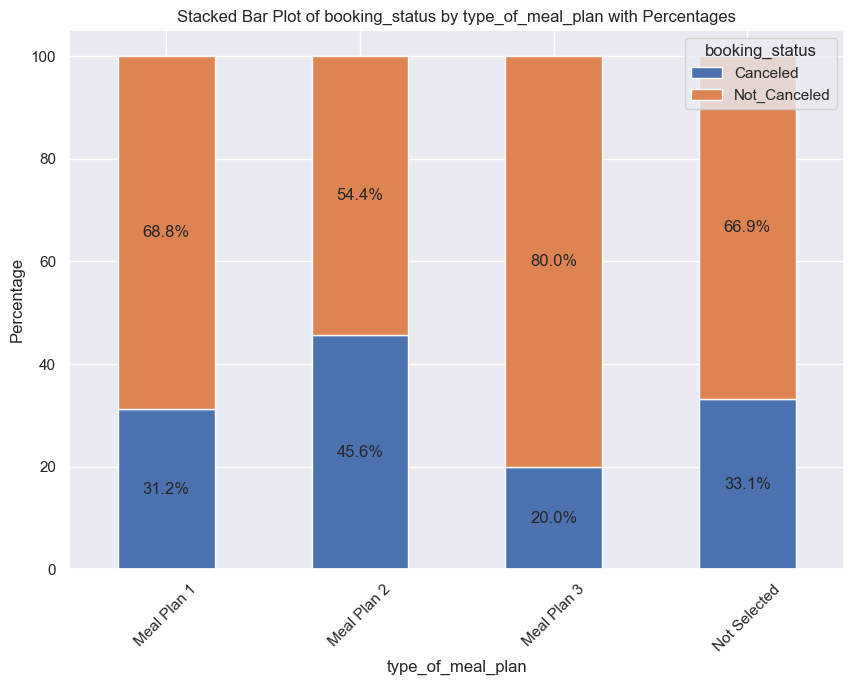

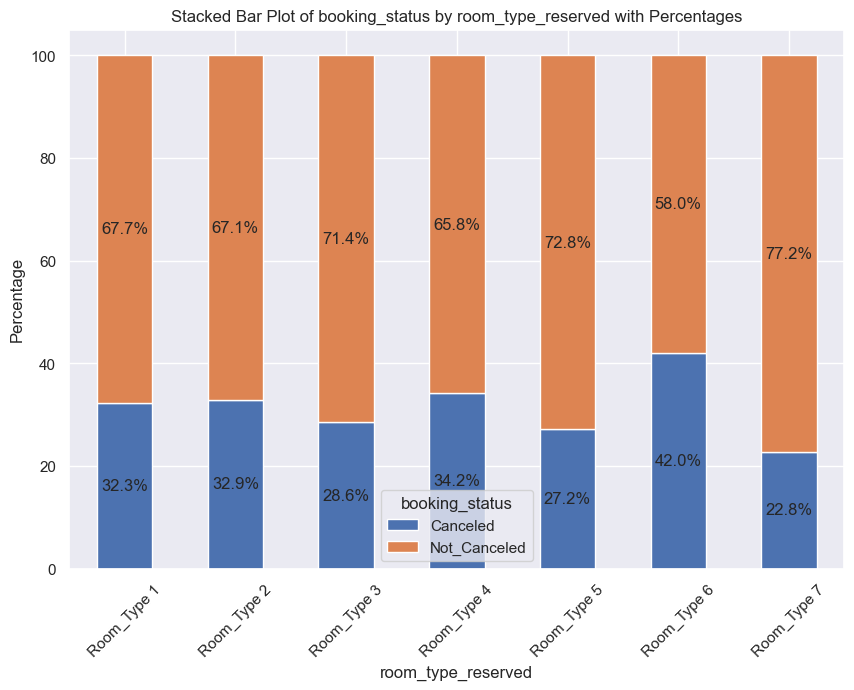

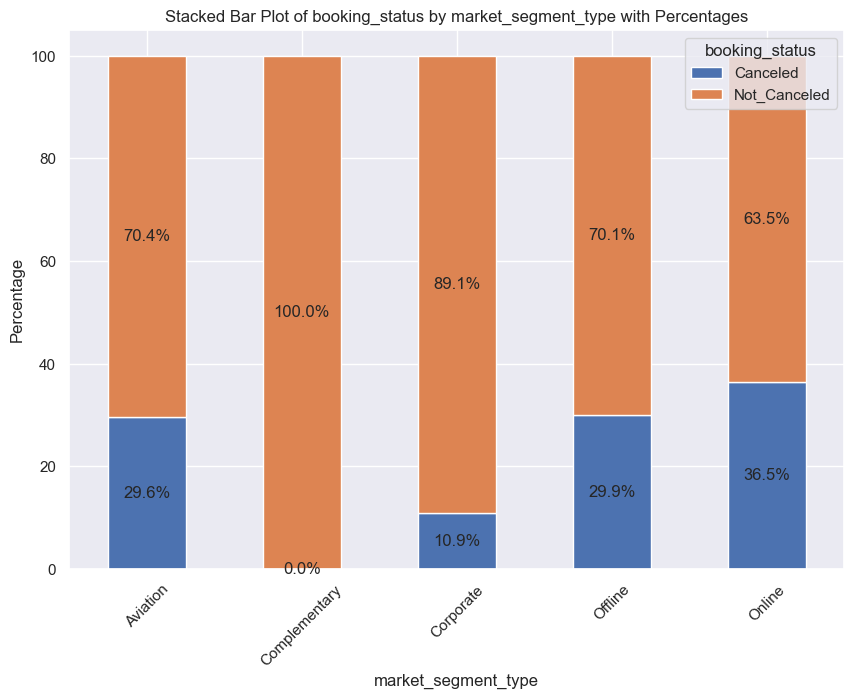

In [105]:
# let plot the bivariate of categorical

for var in cat_cols:
  cat_bivar(eda_data, var, 'booking_status')

#### Multivariate Analysis



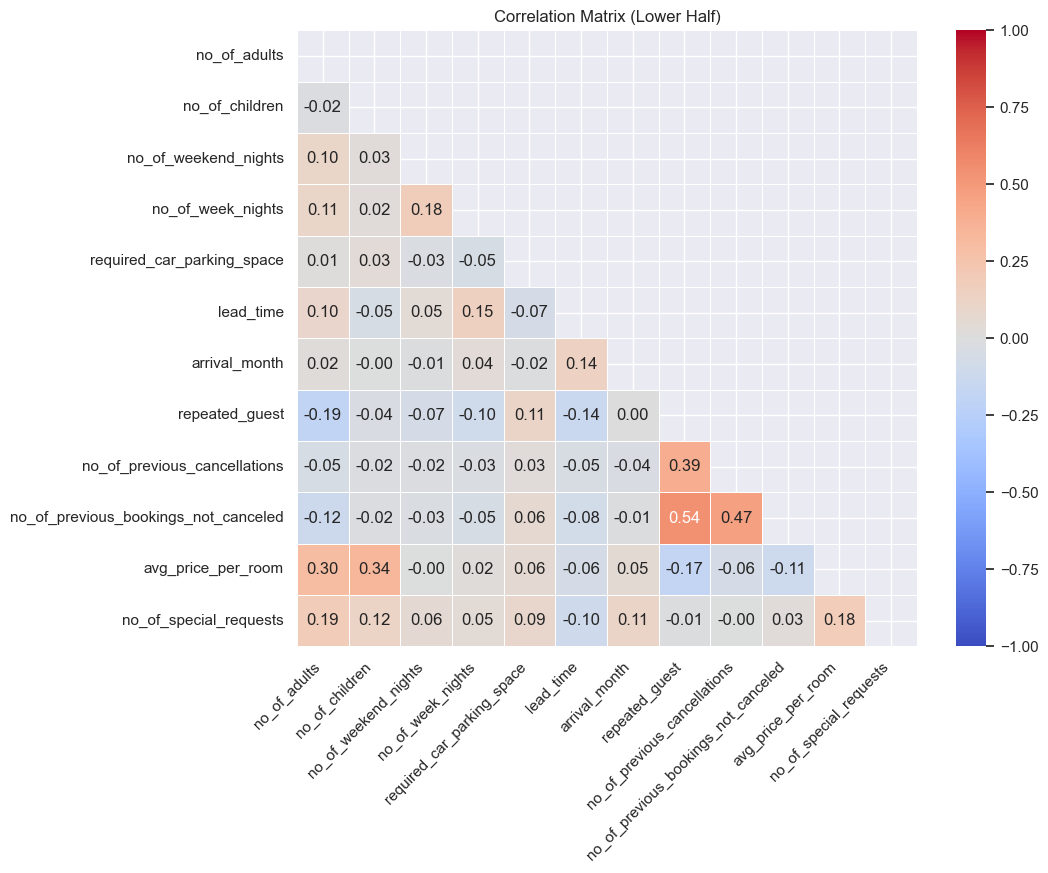

In [106]:
# Compute the correlation matrix
corr_matrix = (eda_data
               .select_dtypes(include=['int','number'])
               .corr())

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a heatmap with annotations and a mask to hide the upper triangle
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            linewidths=0.5, 
            linecolor='white', 
            cbar=True, 
            mask=mask,
            vmin=-1,  # Set the minimum correlation value to -1
            vmax=1    # Set the maximum correlation value to +1
            )

# Add title and labels
plt.title('Correlation Matrix (Lower Half)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.show()

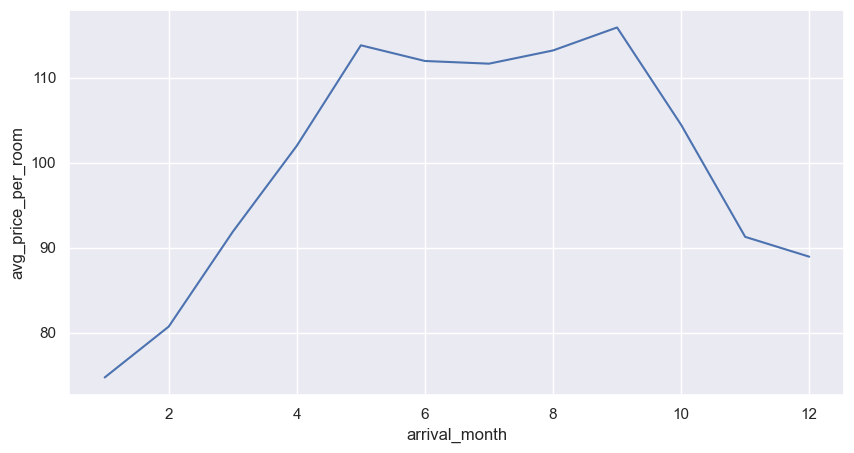

In [107]:
plt.figure(figsize=(10, 5))
sns.lineplot(y=eda_data["avg_price_per_room"], x=eda_data["arrival_month"], ci=None)
plt.show()

**Observations**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed) sdvn

## EDA

- It is a good idea to explore the data once again after manipulating it.

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

## **Data Preparation for Modeling**

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [108]:
prepd_data = eda_data.copy()

# (prep_data
# .assign(
prepd_data['booking_status'] = prepd_data['booking_status'].apply(lambda x: 1 if x == 'Not_Canceled' else 0)
  # )
# )
prepd_data


no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 1               0                     2                  1   
3                 2               0                     0                  2   
4                 2               0                     1                  1   
...             ...             ...                   ...                ...   
36270             3               0                     2                  6   
36271             2               0                     1                  3   
36272             2               0                     2                  6   
36273             2               0                     0                  3   
36274             2               0                     1                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
0           Meal Plan 1                           0        Room_Type 1   
1          Not Selected                           0        Room_Type 1   
2           Meal Plan 1                           0        Room_Type 1   
3           Meal Plan 1                           0        Room_Type 1   
4          Not Selected                           0        Room_Type 1   
...                 ...                         ...                ...   
36270       Meal Plan 1                           0        Room_Type 4   
36271       Meal Plan 1                           0        Room_Type 1   
36272       Meal Plan 1                           0        Room_Type 1   
36273      Not Selected                           0        Room_Type 1   
36274       Meal Plan 1                           0        Room_Type 1   

       lead_time  arrival_month market_segment_type  repeated_guest  \
0            224             10             Offline               0   
1              5             11              Online               0   
2              1              2              Online               0   
3            211              5              Online               0   
4             48              4              Online               0   
...          ...            ...                 ...             ...   
36270         85              8              Online               0   
36271        228             10              Online               0   
36272        148              7              Online               0   
36273         63              4              Online               0   
36274        207             12             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                                 0                                     0   
1                                 0                                     0   
2                                 0                                     0   
3                                 0                                     0   
4                                 0                                     0   
...                             ...                                   ...   
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
0                   65.00                       0              1  
1                  106.68                       1              1  
2                   60.00                       0              0  
3                  100.00                       0              0  
4                   94.50                   

In [109]:
# **Separating the independent variables (X) and the dependent variable (Y)**
X = prepd_data.drop(["booking_status"], axis=1)
Y = prepd_data["booking_status"]

X = pd.get_dummies(X, drop_first=True) # Encoding the Categorical features

**Splitting the data into a 75% train and 25% test set**

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples or vice-versa. In such cases it is recommended to use the **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [110]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,stratify=Y, random_state=1)

print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (27206, 25)
Shape of test set :  (9069, 25)
Percentage of classes in training set:
booking_status
1    0.672352
0    0.327648
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
1    0.6724
0    0.3276
Name: proportion, dtype: float64


## **Model Evaluation Criterion**

#### **Model can make wrong predictions as:**

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

#### **Which case is more important?** 

Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage brand equity. 



#### **How to reduce the losses?**

* The hotel would want the `F1 Score` to be maximized, the greater the F1  score, the higher the chances of minimizing False Negatives and False Positives. 

In [111]:
# Creating custome reusable metric function  to calculate and print the classification report and confusion matrix
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Cancelled', 'Cancelled'], yticklabels=['Not Cancelled', 'Cancelled'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## **Building the model**

We will be building 2 different models:

- **Logistic Regression**
- **Decision Tree**

## Building a Logistic Regression model

In [112]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

## Model performance evaluation

              precision    recall  f1-score   support

           0       0.73      0.62      0.67      8914
           1       0.83      0.89      0.86     18292

    accuracy                           0.80     27206
   macro avg       0.78      0.75      0.76     27206
weighted avg       0.80      0.80      0.80     27206



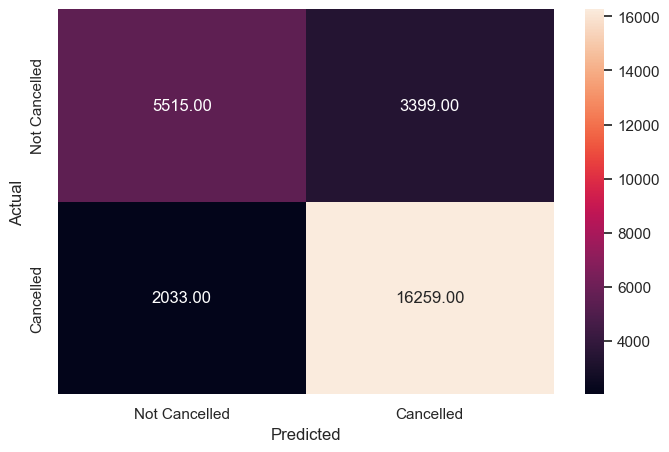

In [113]:
## **Check the performance of the model on train and test data**

y_pred_train = lg.predict(X_train)
metrics_score(y_train, y_pred_train)

#### Observation
- The model has an recall score of --%


              precision    recall  f1-score   support

           0       0.73      0.62      0.67      2971
           1       0.83      0.89      0.86      6098

    accuracy                           0.80      9069
   macro avg       0.78      0.75      0.76      9069
weighted avg       0.79      0.80      0.79      9069



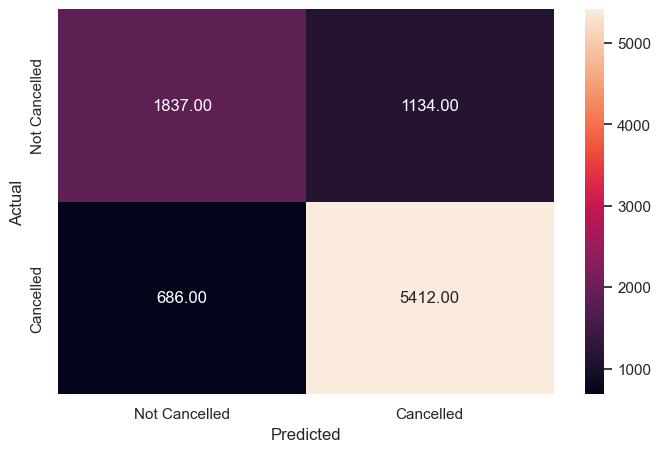

In [114]:
# Let's check the performance on the test set

y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)

#### Observation
- The model has an recall score of --%



#### **Find the optimal threshold for the model using the Precision-Recall Curve.**

Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.




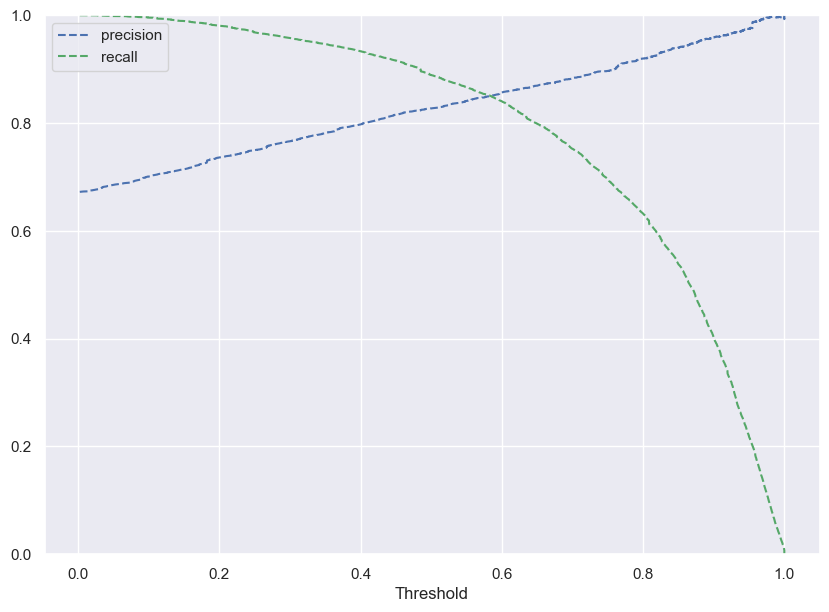

In [115]:
# Let's use the Precision-Recall curve and see if we can find a **better threshold.**


y_scores_lg = lg.predict_proba(X_train)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(
    y_train, y_scores_lg[:, 1]
)

plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

* We want to choose a threshold that has a high recall while also having a small drop in precision. High recall is necessary, simultaneously we also need to be careful not to lose precision too much. So the threshold value of 0.40 should be sufficient because it has good recall and does not cause a significant drop in precision.

**Note:** We are attempting to maximise recall because that is our metric of interest. Consider the F1 score as the metric of interest then we must find the threshold that provides balanced precision and recall values. In that case, the theshold value will be ---.

In [116]:
# Setting the optimal threshold
optimal_threshold = 0.40

              precision    recall  f1-score   support

           0       0.79      0.51      0.62      8914
           1       0.80      0.93      0.86     18292

    accuracy                           0.80     27206
   macro avg       0.79      0.72      0.74     27206
weighted avg       0.79      0.80      0.78     27206



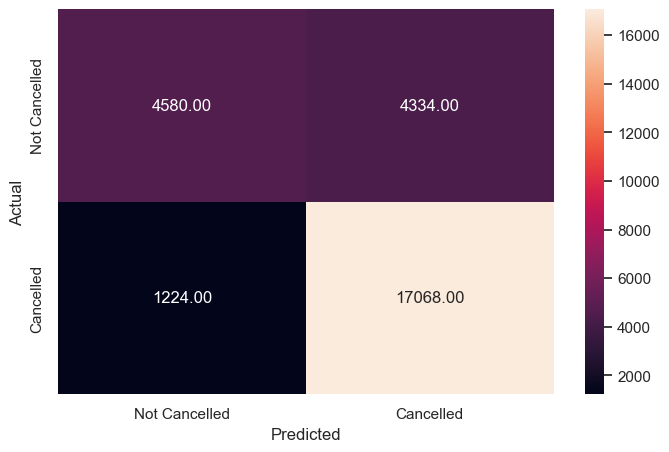

In [117]:
# **Check the performance of the model on train and test data using the optimal threshold.**

y_pred_train = lg.predict_proba(X_train)
metrics_score(y_train, y_pred_train[:, 1] > optimal_threshold)

#### Observation
* The model performance has improved by selecting the optimal threshold of 0.40.
* The model performance has improved as compared to our initial model.The recall has increased by 9%.


              precision    recall  f1-score   support

           0       0.78      0.52      0.62      2971
           1       0.80      0.93      0.86      6098

    accuracy                           0.79      9069
   macro avg       0.79      0.72      0.74      9069
weighted avg       0.79      0.79      0.78      9069



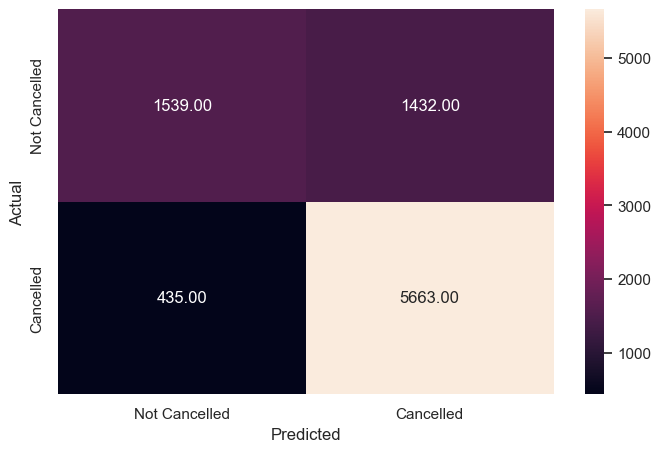

In [118]:
# Let's check the performance on the test set

y_pred_test = lg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold)


#### Observation
* The model performance has improved by selecting the optimal threshold of 0.40.
* The model performance has improved as compared to our initial model.The recall has increased by 9%.


## Final Model Summary

## Building a Decision Tree model

In [119]:
# **Build a Decision Tree Model**

model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train, y_train)



DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8914
           1       1.00      1.00      1.00     18292

    accuracy                           0.99     27206
   macro avg       0.99      0.99      0.99     27206
weighted avg       0.99      0.99      0.99     27206



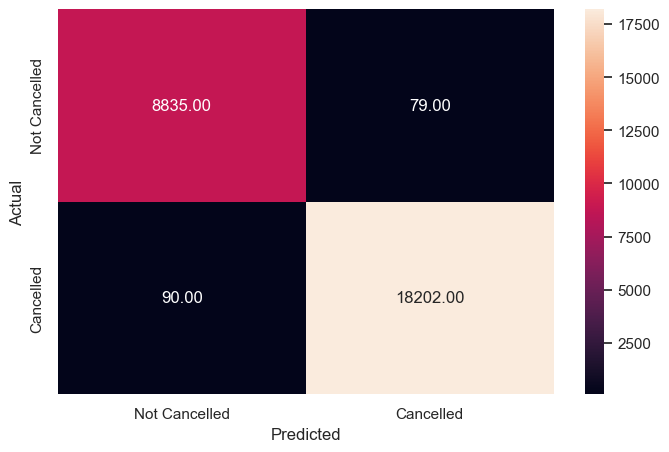

In [120]:
# **Check the performance of the model on train data**
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

#### Observation

* Almost 0 errors on the training set, each sample has been classified correctly.
* Model's performance has been very good in training set.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* Let's check the performance on test data to see if the model is overfitting.

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8914
           1       1.00      1.00      1.00     18292

    accuracy                           0.99     27206
   macro avg       0.99      0.99      0.99     27206
weighted avg       0.99      0.99      0.99     27206



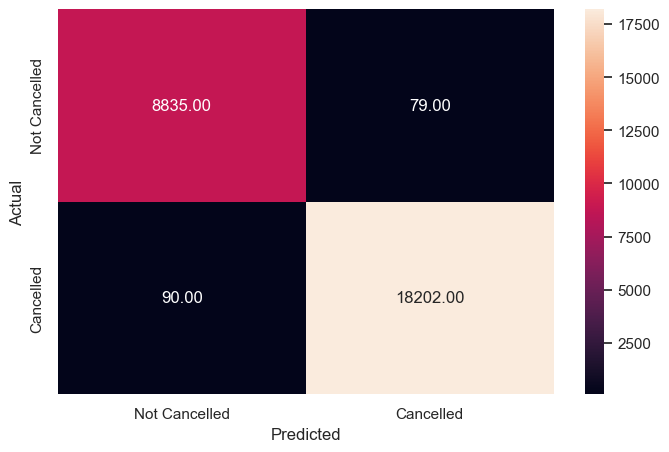

In [121]:
# **Check the performance of the model on test data**
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

#### Observation

* Looks like the decision tree model is overfitting.
* We will have to tune the decision tree to reduce the overfitting.


## Do we need to prune the tree?

 #### Given that the decision tree model is overfitting, Hence there is a need to perform hyperparameter tuning (also known as) for the decision tree model using GridSearch CV**

In [122]:
estimator = DecisionTreeClassifier(random_state=1)

parameters = {
    "max_depth": np.arange(2, 9, 2),
    "max_leaf_nodes": [50, 75, 100, 125],
    "min_samples_split": [10, 30, 50, 70],
}


grid_obj = GridSearchCV(estimator, parameters, cv=5, scoring="recall", n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

estimator = grid_obj.best_estimator_

estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=50, min_samples_split=70,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.81      0.70      0.75      8914
           1       0.86      0.92      0.89     18292

    accuracy                           0.85     27206
   macro avg       0.84      0.81      0.82     27206
weighted avg       0.85      0.85      0.84     27206



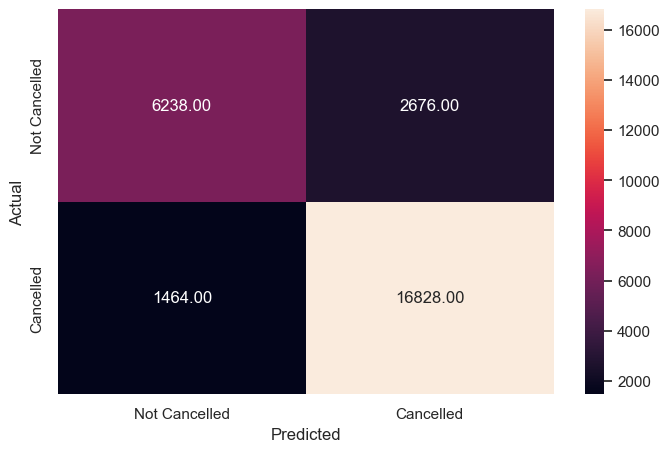

In [123]:
# Checking performance on the training set 
dt_tuned = estimator.predict(X_train)
metrics_score(y_train, dt_tuned)

              precision    recall  f1-score   support

           0       0.79      0.69      0.74      2971
           1       0.86      0.91      0.88      6098

    accuracy                           0.84      9069
   macro avg       0.83      0.80      0.81      9069
weighted avg       0.84      0.84      0.84      9069



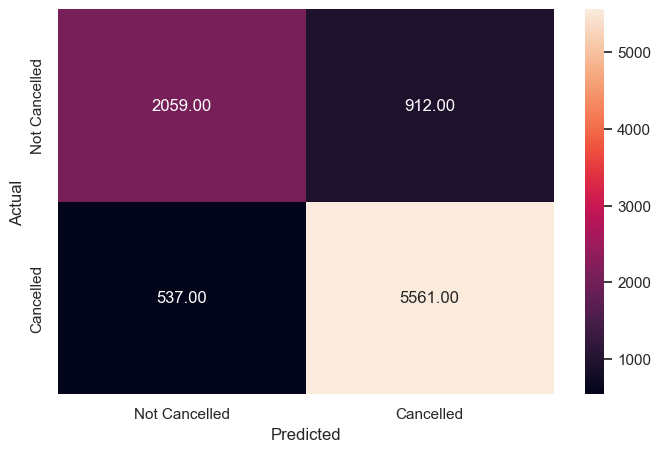

In [124]:
## try if it's still overfitting or not on the test data.

y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test, y_pred_tuned)

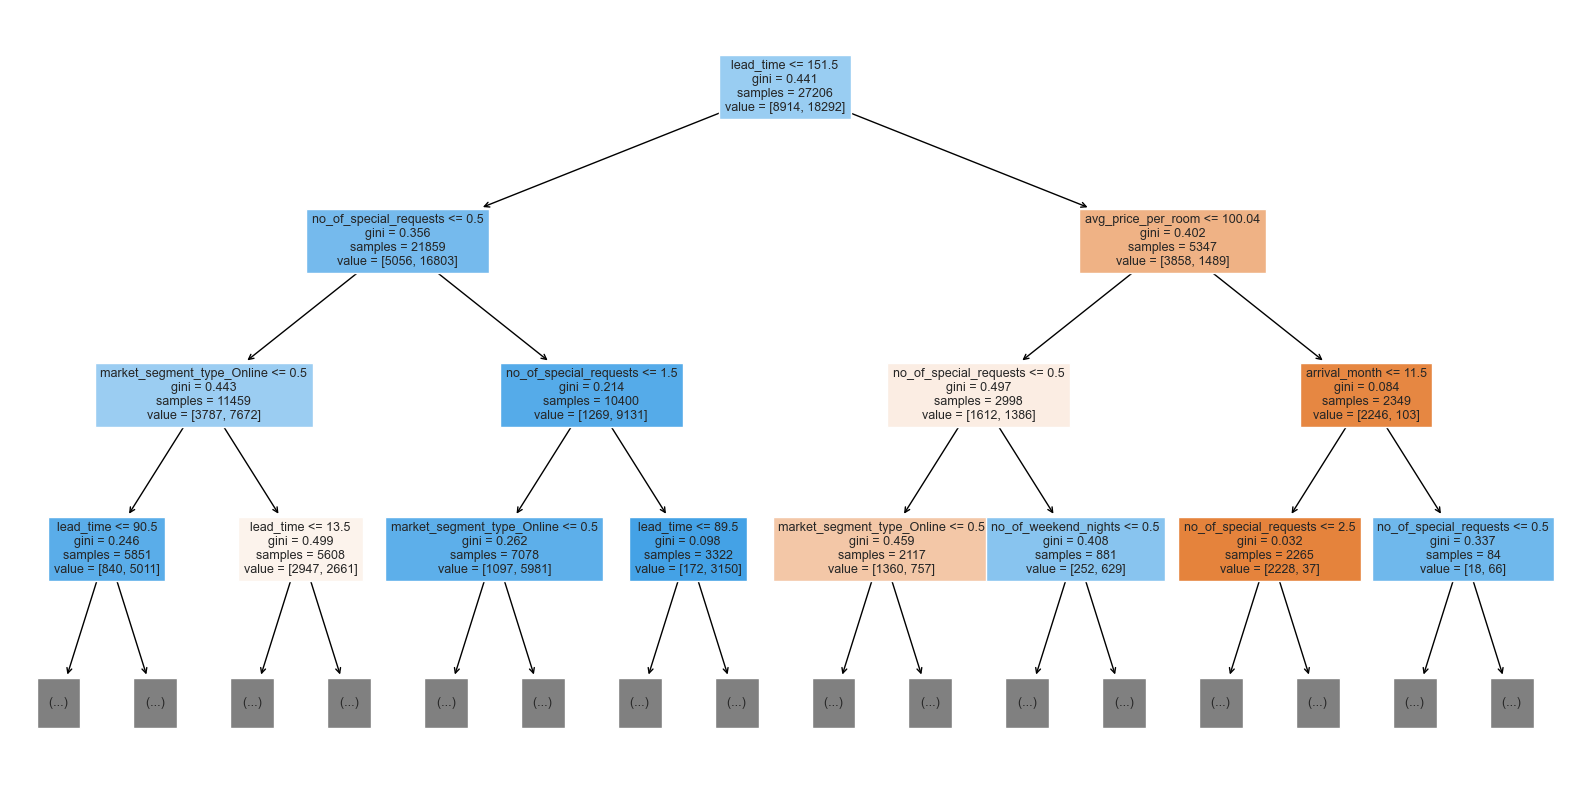

In [127]:
# **Visualizing the Decision Tree**


feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,max_depth=3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

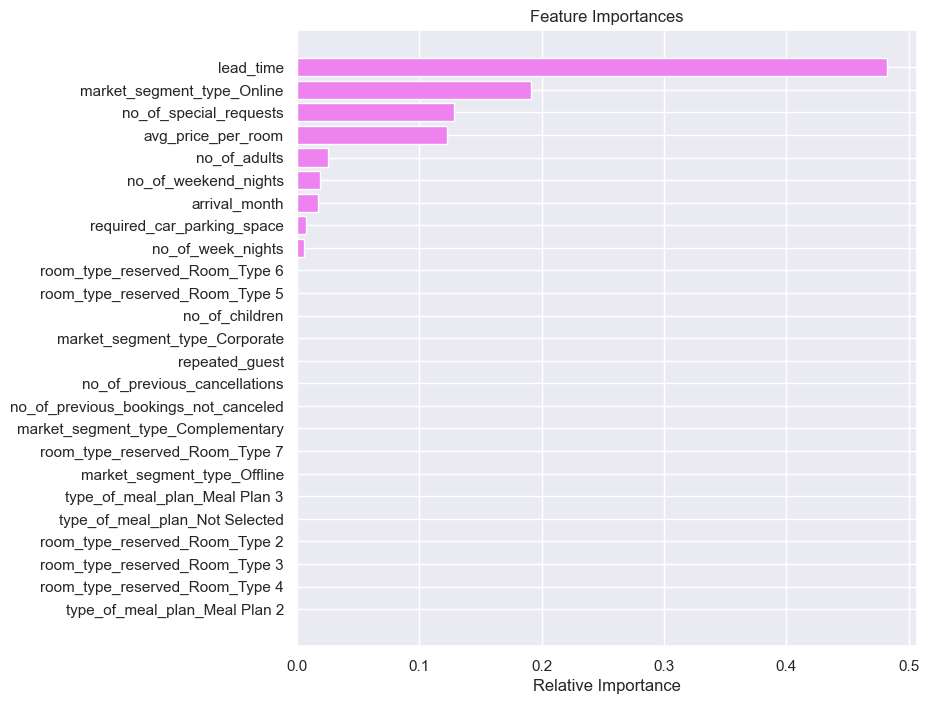

In [128]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- We can see that the tree has become simpler and the rules of the trees are readable.
- The model performance of the model has been generalized.

- We observe that the most important features are:
    - lead_time
    - market_segment_type_Online
    - no_of_special_requests
    - av_price_per_room

#### Observation
- The model performance has been deceasing from the previous decisiontree
- Decision tree model with default parameters is overfitting the training data and is not able to generalize well.
- Tuning the model has provided a generalised performance with balanced precision and recall values.
- However, there is still some overfitting, and model performance on test data has signifficantly improved.

## Model Performance Comparison and Conclusions

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?